# LENDING CLUB CASE STUDY#

**Authors: Sreenath S, N S Chirag**

# Business Understanding

This case study is based on the requirement from a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

1. If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

2. If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

 
The data given below contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

When a person applies for a loan, there are two types of decisions that could be taken by the company:

1. Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:

    a. Fully paid: Applicant has fully paid the loan (the principal and the interest rate)

    b. Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

    c. Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 


2. Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

# Business Objectives

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from datetime import datetime
import warnings
warnings.filterwarnings('ignore')


pd.options.display.float_format = '{:.2f}'.format

sns.set(style = 'whitegrid');

In [2]:
import scipy.stats as ss

# Data Understanding

Dataset contains the complete loan data for all loans issued through the time period 2007 t0 2011.
Let's load the data onto dataframe and perform some basic analysis.

In [3]:
#Assumption: loan.csv is present in the same folder as that of this notebook
Loan_Data = pd.read_csv("loan.csv", engine = 'python')
Loan_Data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000          4975.00   36 months   
1  1077430    1314167       2500         2500          2500.00   60 months   
2  1077175    1313524       2400         2400          2400.00   36 months   
3  1076863    1277178      10000        10000         10000.00   36 months   
4  1075358    1311748       3000         3000          3000.00   60 months   

  int_rate  installment grade sub_grade            ...              \
0   10.65%       162.87     B        B2            ...               
1   15.27%        59.83     C        C4            ...               
2   15.96%        84.33     C        C5            ...               
3   13.49%       339.31     C        C1            ...               
4   12.69%        67.79     B        B5            ...               

  num_tl_90g_dpd_24m num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75  \
0                nan                nan            nan               nan   
1                nan                nan            nan               nan   
2                nan                nan            nan               nan   
3                nan                nan            nan               nan   
4                nan                nan            nan               nan   

  pub_rec_bankruptcies tax_liens tot_hi_cred_lim total_bal_ex_mort  \
0                 0.00      0.00             nan               nan   
1                 0.00      0.00             nan               nan   
2                 0.00      0.00             nan               nan   
3                 0.00      0.00             nan               nan   
4                 0.00      0.00             nan               nan   

  total_bc_limit total_il_high_credit_limit  
0            nan                        nan  
1            nan                        nan  
2            nan                        nan  
3            nan                        nan  
4            nan                        nan  

[5 rows x 111 columns]

In [4]:
Loan_Data.shape

(39717, 111)

In [5]:
Loan_Data.describe()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
count   39717.00   39717.00   39717.00     39717.00         39717.00   
mean   683131.91  850463.56   11219.44     10947.71         10397.45   
std    210694.13  265678.31    7456.67      7187.24          7128.45   
min     54734.00   70699.00     500.00       500.00             0.00   
25%    516221.00  666780.00    5500.00      5400.00          5000.00   
50%    665665.00  850812.00   10000.00      9600.00          8975.00   
75%    837755.00 1047339.00   15000.00     15000.00         14400.00   
max   1077501.00 1314167.00   35000.00     35000.00         35000.00   

       installment  annual_inc      dti  delinq_2yrs  inq_last_6mths  \
count     39717.00    39717.00 39717.00     39717.00        39717.00   
mean        324.56    68968.93    13.32         0.15            0.87   
std         208.87    63793.77     6.68         0.49            1.07   
min          15.69     4000.00     0.00         0.00            0.00   
25%         167.02    40404.00     8.17         0.00            0.00   
50%         280.22    59000.00    13.40         0.00            1.00   
75%         430.78    82300.00    18.60         0.00            1.00   
max        1305.19  6000000.00    29.99        11.00            8.00   

                  ...              num_tl_90g_dpd_24m  num_tl_op_past_12m  \
count             ...                            0.00                0.00   
mean              ...                             nan                 nan   
std               ...                             nan                 nan   
min               ...                             nan                 nan   
25%               ...                             nan                 nan   
50%               ...                             nan                 nan   
75%               ...                             nan                 nan   
max               ...                             nan                 nan   

       pct_tl_nvr_dlq  percent_bc_gt_75  pub_rec_bankruptcies  tax_liens  \
count            0.00              0.00              39020.00   39678.00   
mean              nan               nan                  0.04       0.00   
std               nan               nan                  0.20       0.00   
min               nan               nan                  0.00       0.00   
25%               nan               nan                  0.00       0.00   
50%               nan               nan                  0.00       0.00   
75%               nan               nan                  0.00       0.00   
max               nan               nan                  2.00       0.00   

       tot_hi_cred_lim  total_bal_ex_mort  total_bc_limit  \
count             0.00               0.00            0.00   
mean               nan                nan             nan   
std                nan                nan             nan   
min                nan                nan             nan   
25%                nan                nan             nan   
50%                nan                nan             nan   
75%                nan                nan             nan   
max                nan                nan             nan   

       total_il_high_credit_limit  
count                        0.00  
mean                          nan  
std                           nan  
min                           nan  
25%                           nan  
50%                           nan  
75%                           nan  
max                           nan  

[8 rows x 87 columns]

In [6]:
Loan_Data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
id                                39717 non-null int64
member_id                         39717 non-null int64
loan_amnt                         39717 non-null int64
funded_amnt                       39717 non-null int64
funded_amnt_inv                   39717 non-null float64
term                              39717 non-null object
int_rate                          39717 non-null object
installment                       39717 non-null float64
grade                             39717 non-null object
sub_grade                         39717 non-null object
emp_title                         37258 non-null object
emp_length                        38642 non-null object
home_ownership                    39717 non-null object
annual_inc                        39717 non-null float64
verification_status               39717 non-null object
issue_d                           39717 non-null ob

Print the percentage of missing values, in each columns

In [7]:
Loan_data_info = round(((Loan_Data.isnull().sum())/len(Loan_Data))*100, 2)
Loan_data_info

id                                 0.00
member_id                          0.00
loan_amnt                          0.00
funded_amnt                        0.00
funded_amnt_inv                    0.00
term                               0.00
int_rate                           0.00
installment                        0.00
grade                              0.00
sub_grade                          0.00
emp_title                          6.19
emp_length                         2.71
home_ownership                     0.00
annual_inc                         0.00
verification_status                0.00
issue_d                            0.00
loan_status                        0.00
pymnt_plan                         0.00
url                                0.00
desc                              32.58
purpose                            0.00
title                              0.03
zip_code                           0.00
addr_state                         0.00
dti                                0.00


There are many columns with 100% missing values, lets get those column details and remove it from data frame.

In [8]:
missing_value = Loan_data_info.index[Loan_data_info.values == 100]
print("Number of columns with empty data: ", len(missing_value))
print("Columns that has no values in it: ");
print(missing_value)

Number of columns with empty data:  54
Columns that has no values in it: 
Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl

# Data Cleaning

Let's remove those columns which are completely empty

In [9]:
Loan_Data = Loan_Data.drop(columns = missing_value)

Let's see disc feature. These are some details provided by user.

In [10]:
Loan_Data.desc.head()

0      Borrower added on 12/22/11 > I need to upgra...
1      Borrower added on 12/22/11 > I plan to use t...
2                                                  NaN
3      Borrower added on 12/21/11 > to pay for prop...
4      Borrower added on 12/21/11 > I plan on combi...
Name: desc, dtype: object

Not much info can be deduced from this field, so let us drop it. Also after visual inspection it is observed that other columns such as id, member_id, url, zip_code, title won't be useful in differentiating the loan borrowers. So we will drop those columns too.

In [11]:
Loan_Data = Loan_Data.drop(columns = ['id', 'member_id', 'url', 'zip_code', 'desc', 'title'])

**Removing the loans with status 'current' as this EDA is all about finding the most important features which help the lendersome insights on whether the loan borrower will be able to fully pay the loan or not.**

In [12]:
Loan_Data.loan_status = Loan_Data.loan_status.str.lower()
Loan_Data = Loan_Data[Loan_Data.loan_status != 'current']

Print unique values present in each column

In [13]:
Loan_Data_unique = Loan_Data.nunique()

In [14]:
Loan_Data_unique

loan_amnt                       870
funded_amnt                    1019
funded_amnt_inv                8050
term                              2
int_rate                        370
installment                   15022
grade                             7
sub_grade                        35
emp_title                     28027
emp_length                       11
home_ownership                    5
annual_inc                     5215
verification_status               3
issue_d                          55
loan_status                       2
pymnt_plan                        1
purpose                          14
addr_state                       50
dti                            2853
delinq_2yrs                      11
earliest_cr_line                524
inq_last_6mths                    9
mths_since_last_delinq           95
mths_since_last_record          111
open_acc                         40
pub_rec                           5
revol_bal                     21275
revol_util                  

Drop those columns which has got only one unique value.

In [15]:
Loan_Data = Loan_Data.drop(columns = Loan_Data_unique[Loan_Data_unique == 1].index)

In [16]:
Loan_Data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

Let us look at some columns for which data will be available only after the loan been approved:
1.  funded_amnt - The total amount committed to that loan at that point in time.
2.  funded_amnt_inv - The total amount committed by investors for that loan at that point in time. 
3.  total_pymnt - Payments received to date for total amount funded 
4.  total_pymnt_inv - Payments received to date for portion of total amount funded by investors 
5.  total_rec_prncp - Principal received to date  
6.  total_rec_int - Interest received to date
7.  total_rec_late_fee - Late fees received to date 
8.  recoveries - post charge off gross recovery 
9.  collection_recovery_fee - post charge off collection fee
10. last_pymnt_d - Last month payment was received 
11. last_pymnt_amnt - Last total payment amount received
12. last_credit_pull_d - The most recent month LC pulled credit for this loan 
13. next_pymnt_d - Next scheduled payment date

Since these data are available only after loan is approved we can removed these columns from our analysis.

In [17]:
Loan_Data = Loan_Data.drop(columns = ['funded_amnt', 'funded_amnt_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int','total_rec_late_fee', 'recoveries', 'collection_recovery_fee','last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d','next_pymnt_d'])

In [18]:
Loan_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 27 columns):
loan_amnt                 38577 non-null int64
term                      38577 non-null object
int_rate                  38577 non-null object
installment               38577 non-null float64
grade                     38577 non-null object
sub_grade                 38577 non-null object
emp_title                 36191 non-null object
emp_length                37544 non-null object
home_ownership            38577 non-null object
annual_inc                38577 non-null float64
verification_status       38577 non-null object
issue_d                   38577 non-null object
loan_status               38577 non-null object
purpose                   38577 non-null object
addr_state                38577 non-null object
dti                       38577 non-null float64
delinq_2yrs               38577 non-null int64
earliest_cr_line          38577 non-null object
inq_last_6mths            

Let's print the columns with missing values, we will handle these columns and missing data as we progress

In [19]:
Loan_data_info = round(((Loan_Data.isnull().sum())/len(Loan_Data))*100, 2)
Loan_data_info = Loan_data_info[Loan_data_info > 0 ]
Loan_data_info

emp_title                 6.19
emp_length                2.68
mths_since_last_delinq   64.56
mths_since_last_record   92.90
revol_util                0.13
pub_rec_bankruptcies      1.81
dtype: float64

Though 'mths_since_last_delinq', 'mths_since_last_record' more than 60% and 90% missing values respectively, let's analyse before removing them. For example there are other related columns for these. These two features from the credit report file of the borrower which is prepared by credit agencies. Let's say if a borrower has no delinquincy accounts in the credit file then mths_since_last_delinq can be NA. Similarly if borrower has no public derogatory record in his/her credit file then mths_since_last_record can be NA. We will confirm if this is the case or not. If this is the case Missing values are valid records.

In [20]:
Loan_Data.shape

(38577, 27)

In [21]:
Loan_Data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

**Let's go through each column and see whether any further data cleaning is required**

**1. loan_amnt** - The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

In [22]:
Loan_Data.loan_amnt.unique()
Loan_Data.loan_amnt

0         5000
1         2500
2         2400
3        10000
5         5000
6         7000
7         3000
8         5600
9         5375
10        6500
11       12000
12        9000
13        3000
14       10000
15        1000
16       10000
17        3600
18        6000
19        9200
20       20250
21       21000
22       10000
23       10000
24        6000
25       15000
26       15000
27        5000
28        4000
29        8500
30        4375
         ...  
39687    12000
39688    20000
39689     1200
39690    12250
39691     2700
39692     5000
39693     3500
39694     5000
39695     5000
39696    25000
39697    10000
39698     5000
39699     5100
39700     5400
39701     5300
39702     5000
39703     3000
39704     3000
39705     5000
39706     5000
39707     5000
39708     5000
39709     5000
39710     5000
39711     5000
39712     2500
39713     8500
39714     5000
39715     5000
39716     7500
Name: loan_amnt, Length: 38577, dtype: int64

Since the loan_amount dtype is int64, and through visual inspection we can confirm there is no bad data in this column. This is continuous variable, we can convert it to categorical for analysis through binning.

**2. term** - The number of payments on the loan. Values are in months and can be either 36 or 60.

In [23]:
Loan_Data.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

There is no missing data in this column, also it is clearly a categorial data with 2 categories.

**3. int_rate** - Interest Rate on the loan

In [24]:
Loan_Data.int_rate.unique()

array(['10.65%', '15.27%', '15.96%', '13.49%', '7.90%', '18.64%',
       '21.28%', '12.69%', '14.65%', '9.91%', '16.29%', '6.03%', '11.71%',
       '12.42%', '14.27%', '16.77%', '7.51%', '8.90%', '18.25%', '6.62%',
       '19.91%', '17.27%', '17.58%', '21.67%', '19.42%', '20.89%',
       '20.30%', '23.91%', '19.03%', '23.13%', '22.74%', '22.35%',
       '22.06%', '24.11%', '6.00%', '23.52%', '22.11%', '7.49%', '11.99%',
       '5.99%', '10.99%', '9.99%', '18.79%', '11.49%', '8.49%', '15.99%',
       '16.49%', '6.99%', '12.99%', '15.23%', '14.79%', '5.42%', '10.59%',
       '17.49%', '15.62%', '19.29%', '13.99%', '18.39%', '16.89%',
       '17.99%', '20.99%', '22.85%', '19.69%', '20.62%', '20.25%',
       '21.36%', '23.22%', '21.74%', '22.48%', '23.59%', '12.62%',
       '18.07%', '11.63%', '7.91%', '7.42%', '11.14%', '20.20%', '12.12%',
       '19.39%', '16.11%', '17.54%', '22.64%', '13.84%', '16.59%',
       '17.19%', '12.87%', '20.69%', '9.67%', '21.82%', '19.79%',
       '18.49%', '

It is clear that this column need some treatment since it has % value in it. Let's remove the % from values and get neumerical data

In [25]:
Loan_Data.int_rate = Loan_Data.int_rate.str.strip('%')
Loan_Data.int_rate  = Loan_Data.int_rate.astype(float)

**4. installment** - The monthly payment owed by the borrower if the loan originates.

In [26]:
Loan_Data.installment.describe()

count   38577.00
mean      322.47
std       208.64
min        15.69
25%       165.74
50%       277.86
75%       425.55
max      1305.19
Name: installment, dtype: float64

Since the data is float 64 its clear no more clean up needed and this is continuous variable we can convert it to category through binning as needed.

**5. grade** - LC assigned loan grade

In [27]:
Loan_Data.grade.unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

This is clearly categorical feature, no more cleaning needed.

**6. sub_grade** - LC assigned loan subgrade

In [28]:
Loan_Data.sub_grade.unique()

array(['B2', 'C4', 'C5', 'C1', 'A4', 'E1', 'F2', 'B5', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F1', 'E5', 'G4', 'E2', 'G2', 'G1', 'F5', 'F4',
       'G5', 'G3'], dtype=object)

sub_grade is clearly categorical feature, no more cleaning needed.

**7. emp_title** - The job title supplied by the Borrower when applying for the loan.*

In [29]:
Loan_Data.emp_title.unique()

array([nan, 'Ryder', 'AIR RESOURCES BOARD', ..., 'FiSite Research',
       'Squarewave Solutions, Ltd.', 'Evergreen Center'], dtype=object)

In [30]:
Loan_Data.emp_title.nunique()

28027

In [31]:
Loan_Data.emp_title = Loan_Data.emp_title.str.lower()

let's impute the missing values with 'other'

In [32]:
Loan_Data.emp_title = Loan_Data.emp_title.fillna('other')

In [33]:
Loan_Data.emp_title.nunique()

26703

Observation: Since the categorical variable is having 26703 unique value and the data set is only 38000+, hence not considering this field for further analysis.

In [34]:
Loan_Data = Loan_Data.drop(columns = ['emp_title'])

**8. emp_length** - Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 

Since this feature has missing values, lets try to impute it. From column description its clear that, feature is ordered categorial spanning from 0 to 10. Imputing with mean or median or max value will skew our data. Hence bucketing it to a new category -1. 

Prefer to categorize with -1 instead of removing, rest of the rows has valid values.

In [35]:
Loan_Data.emp_length.unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years',
       nan], dtype=object)

In [36]:
Loan_Data.emp_length = Loan_Data.emp_length.fillna('-1 years')

In [37]:
Loan_Data.emp_length = Loan_Data.emp_length.str.strip(' years')

In [38]:
Loan_Data.emp_length.unique()

array(['10+', '< 1', '3', '8', '9', '4', '5', '1', '6', '2', '7', '-1'],
      dtype=object)

In [39]:
def create_emp_len_category(emp_len):
    category = -1
    if emp_len == '10+':
        category = 10
    elif emp_len == '< 1':
        category = 0
    else:
        category = int(emp_len)
    return category       

In [40]:
Loan_Data.emp_length = Loan_Data.emp_length.apply(create_emp_len_category)

In [41]:
Loan_Data.emp_length.unique()

array([10,  0,  3,  8,  9,  4,  5,  1,  6,  2,  7, -1], dtype=int64)

**9. home_ownership**-The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.

In [42]:
Loan_Data.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

As per description only values are RENT, OWN, MORTGAGE, OTHER. So lets convert NONE also to OTHER

In [43]:
Loan_Data.home_ownership = Loan_Data.home_ownership.apply(lambda x: x if x!= 'NONE' else 'OTHER')

In [44]:
Loan_Data.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

**10. annual_inc**-The self-reported annual income provided by the borrower during registration.

In [45]:
Loan_Data.annual_inc.describe()

count     38577.00
mean      68777.97
std       64218.68
min        4000.00
25%       40000.00
50%       58868.00
75%       82000.00
max     6000000.00
Name: annual_inc, dtype: float64

In [46]:
Loan_Data.annual_inc.nunique()

5215

**11. verification_status** - Indicates if income was verified by LC, not verified, or if the income source was verified

In [47]:
Loan_Data.verification_status.unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

**12. issue_d**-The month which the loan was funded

In [48]:
Loan_Data['issue_d'] = Loan_Data['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [49]:
Loan_Data['issue_d']

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
5       2011-12-01
6       2011-12-01
7       2011-12-01
8       2011-12-01
9       2011-12-01
10      2011-12-01
11      2011-12-01
12      2011-12-01
13      2011-12-01
14      2011-12-01
15      2011-12-01
16      2011-12-01
17      2011-12-01
18      2011-12-01
19      2011-12-01
20      2011-12-01
21      2011-12-01
22      2011-12-01
23      2011-12-01
24      2011-12-01
25      2011-12-01
26      2011-12-01
27      2011-12-01
28      2011-12-01
29      2011-12-01
30      2011-12-01
           ...    
39687   2007-08-01
39688   2007-08-01
39689   2007-07-01
39690   2007-07-01
39691   2007-07-01
39692   2007-07-01
39693   2007-07-01
39694   2007-07-01
39695   2007-07-01
39696   2007-07-01
39697   2007-07-01
39698   2007-07-01
39699   2007-07-01
39700   2007-07-01
39701   2007-07-01
39702   2007-07-01
39703   2007-07-01
39704   2007-07-01
39705   2007-07-01
39706   2007-07-01
39707   2007-07-01
39708   2007

NOTE: This feature can be omitted as it is not going to contribute towards analysing the risk associated with new loans

In [50]:
Loan_Data = Loan_Data.drop(columns = ['issue_d'])

**13. loan_status** - Current status of the loan

Since the EDA is all about finding the driving features behind whether a potential customer may default or not, we have removed all the loans with status as 'current'

In [51]:
Loan_Data.loan_status.unique()

array(['fully paid', 'charged off'], dtype=object)

**14. purpose**-A category provided by the borrower for the loan request. 

In [52]:
Loan_Data.purpose.unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

**15. revol_bal** - Total credit revolving balance

In [53]:
Loan_Data.revol_bal.describe()

count    38577.00
mean     13289.49
std      15866.49
min          0.00
25%       3650.00
50%       8762.00
75%      16912.00
max     149588.00
Name: revol_bal, dtype: float64

**16. revol_util** - Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

We have already observed that this column has missing values. Let's print the missing values in this column along with the revol_bal data. Since both are closely related we may be able to infer on the best imputation for missing value based on data in revol_bal.

In [54]:
Loan_Data_rev_util = Loan_Data[Loan_Data.revol_util.isnull()][['revol_bal','revol_util']]
Loan_Data_rev_util

revol_bal revol_util
3565           0        NaN
4714           0        NaN
4943           0        NaN
11282          0        NaN
12042          0        NaN
12147          0        NaN
13891          0        NaN
17985          0        NaN
18184          0        NaN
21604          0        NaN
24663          0        NaN
24738          0        NaN
24984          0        NaN
25261          0        NaN
25977          0        NaN
26649          0        NaN
26724          0        NaN
26813          0        NaN
28170          0        NaN
28685          0        NaN
28938          0        NaN
28986          0        NaN
29236          0        NaN
29248          0        NaN
31862          0        NaN
31939          0        NaN
32715          0        NaN
33078          0        NaN
33490          0        NaN
33534          0        NaN
34268          0        NaN
34849          0        NaN
35851          0        NaN
36209          0        NaN
36473          0        NaN
36859          0        NaN
37042          0        NaN
37268          0        NaN
37540      49238        NaN
37709          0        NaN
37757          0        NaN
37778          0        NaN
37911          0        NaN
38201          0        NaN
38457          0        NaN
38524          0        NaN
38899          0        NaN
38917          0        NaN
38949          0        NaN
38970          0        NaN

As we can see except for one loan, the revol_bal is 0. So we can impute all these NAN values with 0 (which is minimum value also)

In [55]:
Loan_Data.revol_util = Loan_Data.revol_util.fillna('0%')

In [56]:
Loan_Data.revol_util = Loan_Data.revol_util.str.strip('%')
Loan_Data.revol_util = Loan_Data.revol_util.astype(float)
Loan_Data.revol_util.describe()

count   38577.00
mean       48.64
std        28.40
min         0.00
25%        25.10
50%        49.00
75%        72.20
max        99.90
Name: revol_util, dtype: float64

**17. addr_state** - The state provided by the borrower in the loan application

In [57]:
Loan_Data.addr_state.unique()

array(['AZ', 'GA', 'IL', 'CA', 'NC', 'TX', 'VA', 'MO', 'CT', 'UT', 'FL',
       'NY', 'PA', 'MN', 'NJ', 'OR', 'KY', 'OH', 'SC', 'RI', 'LA', 'MA',
       'WA', 'WI', 'AL', 'NV', 'AK', 'CO', 'MD', 'WV', 'VT', 'MI', 'DC',
       'SD', 'NH', 'AR', 'NM', 'KS', 'HI', 'OK', 'MT', 'WY', 'DE', 'MS',
       'TN', 'IA', 'NE', 'ID', 'IN', 'ME'], dtype=object)

**18. dti** - A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

In [58]:
Loan_Data.dti.describe()

count   38577.00
mean       13.27
std         6.67
min         0.00
25%         8.13
50%        13.37
75%        18.56
max        29.99
Name: dti, dtype: float64

In [59]:
Loan_Data.dti.unique()

array([27.65,  1.  ,  8.72, ...,  1.79,  0.12, 25.43])

**19. delinq_2yrs** - The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years

In [60]:
Loan_Data.delinq_2yrs.describe()

count   38577.00
mean        0.15
std         0.49
min         0.00
25%         0.00
50%         0.00
75%         0.00
max        11.00
Name: delinq_2yrs, dtype: float64

In [61]:
Loan_Data.delinq_2yrs.unique()

array([ 0,  2,  3,  1,  4,  6,  5,  8,  7,  9, 11], dtype=int64)

**20. earliest_cr_line** - The month the borrower's earliest reported credit line was opened

In [62]:
Loan_Data.earliest_cr_line.head()

0    Jan-85
1    Apr-99
2    Nov-01
3    Feb-96
5    Nov-04
Name: earliest_cr_line, dtype: object

In [63]:
Loan_Data['earliest_cr_line'] = Loan_Data['earliest_cr_line'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [64]:
Loan_Data['earliest_cr_line'].dt.year.unique()

array([1985, 1999, 2001, 1996, 2004, 2005, 2007, 1998, 1989, 2003, 1991,
       1993, 1997, 1983, 2002, 1984, 2006, 1987, 1981, 2000, 1994, 1995,
       1992, 1986, 1990, 1988, 1980, 2008, 1979, 1978, 1971, 1972, 1970,
       1969, 1975, 1982, 1976, 1977, 2062, 1973, 2068, 1974, 2067, 2065,
       2063, 2054, 2066, 2064, 2059, 2056, 2046, 2050, 2061], dtype=int64)

**21. inq_last_6mths** - The number of inquiries in past 6 months (excluding auto and mortgage inquiries)

In [65]:
Loan_Data.inq_last_6mths.describe()

count   38577.00
mean        0.87
std         1.07
min         0.00
25%         0.00
50%         1.00
75%         1.00
max         8.00
Name: inq_last_6mths, dtype: float64

In [66]:
Loan_Data.inq_last_6mths.unique()

array([1, 5, 2, 3, 0, 4, 6, 7, 8], dtype=int64)

**22. open_acc** - The number of open credit lines in the borrower's credit file.

In [67]:
Loan_Data.open_acc.describe()

count   38577.00
mean        9.28
std         4.40
min         2.00
25%         6.00
50%         9.00
75%        12.00
max        44.00
Name: open_acc, dtype: float64

In [68]:
Loan_Data.open_acc.unique()

array([ 3,  2, 10,  9,  7,  4, 11, 14, 12, 20,  8,  6, 15, 17,  5, 13, 16,
       30, 21, 18, 19, 27, 23, 34, 25, 22, 24, 26, 32, 28, 29, 33, 31, 39,
       35, 36, 38, 44, 41, 42], dtype=int64)

**23. pub_rec** - Number of derogatory public records

In [69]:
Loan_Data.pub_rec.unique()

array([0, 1, 2, 3, 4], dtype=int64)

**24. total_ac** - Number of public record bankruptcies

In [70]:
Loan_Data.total_acc.unique()

array([ 9,  4, 10, 37, 12, 11, 13,  3, 23, 34, 29, 28, 42, 14, 22, 38, 21,
       17,  7, 31, 44, 26, 16,  6, 18, 27, 25, 40, 35, 24,  8, 20, 15, 19,
       36, 51, 32, 30, 33, 46,  5, 61, 56, 50, 41, 79, 62, 43, 47, 53, 45,
       60, 55, 39, 52, 58, 54, 57, 49, 63, 48, 59, 77, 87, 75, 72, 64, 67,
       78, 76, 74, 66, 81, 90, 80, 71, 69, 73, 70, 68, 65,  2],
      dtype=int64)

**25. pub_rec_bankruptcies** - Number of public record bankruptcies

In [71]:
Loan_Data.pub_rec_bankruptcies.unique()

array([ 0.,  1.,  2., nan])

In [72]:
Loan_Data.pub_rec_bankruptcies = Loan_Data.pub_rec_bankruptcies.fillna(0)

**26. mths_since_last_delinq**

This field stores the data reg when was the last delinq reported for the borrower on his credit file

In [73]:
print(sorted(Loan_Data.mths_since_last_delinq.unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 85.0, 86.0, 89.0, 95.0, 96.0, 97.0, 103.0, 106.0, 107.0, 115.0, 120.0]


This field has almost 65% of missing values, lets see the reason for missing value. If we cant find any lets remove the columns

In [74]:
Loan_Data[Loan_Data.mths_since_last_delinq.isnull()][['mths_since_last_delinq', 'delinq_2yrs']]

mths_since_last_delinq  delinq_2yrs
0                         nan            0
1                         nan            0
2                         nan            0
5                         nan            0
6                         nan            0
7                         nan            0
8                         nan            0
9                         nan            0
10                        nan            0
11                        nan            0
12                        nan            0
13                        nan            0
14                        nan            0
15                        nan            0
17                        nan            0
19                        nan            0
20                        nan            0
21                        nan            0
22                        nan            0
23                        nan            0
24                        nan            0
25                        nan            0
26                        nan            0
29                        nan            0
30                        nan            0
31                        nan            0
34                        nan            0
35                        nan            0
36                        nan            0
37                        nan            0
...                       ...          ...
38965                     nan            0
38966                     nan            0
38968                     nan            0
38969                     nan            0
38972                     nan            0
38974                     nan            0
38977                     nan            0
38979                     nan            0
38980                     nan            0
38981                     nan            0
38983                     nan            0
38984                     nan            0
38985                     nan            0
38986                     nan            0
38987                     nan            0
38988                     nan            0
38989                     nan            0
38992                     nan            0
38996                     nan            0
38997                     nan            0
38998                     nan            0
38999                     nan            0
39000                     nan            0
39002                     nan            0
39642                     nan            0
39650                     nan            0
39659                     nan            0
39660                     nan            0
39686                     nan            0
39688                     nan            0

[24905 rows x 2 columns]

So it is very clear that the missing value is because these many borrowers has no delinq reported.So lets impute it with a higher value so that during binning process will make sure the value will be bucketed seperately.

Since highest value is 120, lets impute with 121.

In [75]:
Loan_Data.mths_since_last_delinq = Loan_Data.mths_since_last_delinq.fillna(121)

**27. mths_since_last_record**

In [76]:
print(sorted(Loan_Data.mths_since_last_record.unique()))

[nan, 0.0, 5.0, 6.0, 7.0, 11.0, 12.0, 13.0, 14.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 129.0]


This field has more than 90% of missing values, lets see the reason for missing value. If we cant find any lets remove the columns

In [77]:
Loan_Data[Loan_Data.mths_since_last_record.isnull()][['mths_since_last_record', 'pub_rec']]

mths_since_last_record  pub_rec
0                         nan        0
1                         nan        0
2                         nan        0
3                         nan        0
5                         nan        0
6                         nan        0
7                         nan        0
8                         nan        0
9                         nan        0
10                        nan        0
11                        nan        0
12                        nan        0
13                        nan        0
14                        nan        0
15                        nan        0
16                        nan        0
17                        nan        0
18                        nan        0
19                        nan        0
20                        nan        0
21                        nan        0
22                        nan        0
23                        nan        0
24                        nan        0
25                        nan        0
26                        nan        0
27                        nan        0
28                        nan        0
29                        nan        0
30                        nan        0
...                       ...      ...
38979                     nan        0
38980                     nan        0
38981                     nan        0
38982                     nan        0
38983                     nan        0
38984                     nan        0
38985                     nan        0
38986                     nan        0
38987                     nan        0
38988                     nan        0
38990                     nan        0
38991                     nan        0
38992                     nan        0
38993                     nan        0
38994                     nan        0
38995                     nan        0
38996                     nan        0
38997                     nan        0
38998                     nan        0
38999                     nan        0
39000                     nan        0
39001                     nan        0
39002                     nan        0
39642                     nan        0
39650                     nan        0
39659                     nan        0
39660                     nan        0
39686                     nan        0
39688                     nan        0
39692                     nan        0

[35837 rows x 2 columns]

Looks like they dont have any public record in their credit file hence this field is NA. Let's impute with a value which is higher that max value in this column.

In [78]:
Loan_Data.mths_since_last_record = Loan_Data.mths_since_last_record.fillna(131)

In [79]:
Loan_Data.shape

(38577, 25)

In [80]:
Loan_Data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'pub_rec_bankruptcies'],
      dtype='object')

**Finer look at the features**

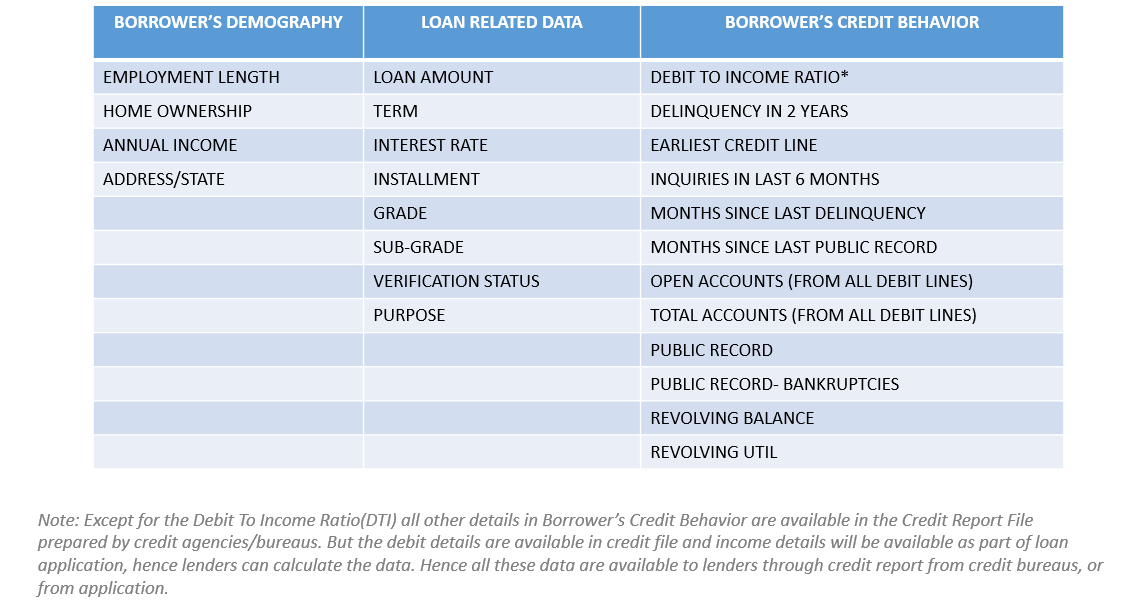

NOTE: We are not converting the parameters to categorical as we are using cross tab for statistical and plotting analysis. Which will also give same details as that of categorical. Moreover we are not building a model out of it, and the purpose is only to perform EDA.

# Utility Functions For Supporting Analysis

In [81]:
# METHOD NAME: create_cross_tab_and_plot
# INPUTS:
#       df - Dataframe for analysis
#       column_name - name of the first feature for creating cross table
#       category - name of the second feature for creating cross table. Defaulted to 'loan_status' which is the dependent variable
#
# DESCRIPTION: This method computes cross tab between the columns passed in. 
# Method will display both univariate and bivariate matrices. Also plots the graph for univariate as well as 
# multivariate analysis.
         
def create_cross_tab_and_plot(df, column_name, category = 'loan_status'):
    # Create cross tab this is not passing normalize parameter hence this we will use for 
    # count analysis
    df_ct = pd.crosstab(df[column_name], df[category])
    df_ct_cpy = df_ct.copy();
    df_ct['Count'] = df_ct.sum(axis = 1)
    df_ct['Percentage'] = (round((df_ct['Count']/len(df))*100, 2))

    #Let's print univariate statistics, count and %
    print ("\nUNIVARIATE ANALYSIS FOR FEATURE '"'{}'"', FREQUENCY IN COUNT AND %".format(column_name.upper()))
    print ("------------------------------------------------------------------------------")
    print(df_ct[['Count', 'Percentage']])
    
    # If there are less than 10 rows in crosstab, then placing 2 subplot on single row is find. If the rows are more
    # or equal to 10, then will plot subplots in 2 rows. This will avoid cluttering
    if(len(df_ct) < 10):
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (24,10))
    else:
        fig, axes = plt.subplots(nrows=2, ncols=1, figsize = (24,20))
    ax1 = df_ct.Count.plot.bar(ax = axes[0])

    # Create cross tab this is with passing margin parameter hence this we will use for 
    # percentage analysis
    df_ct_pct = pd.crosstab(df[column_name],df[category], normalize='index').round(4)*100
    ax2 = df_ct_pct.plot.bar(ax = axes[1], stacked=True)

    # Lets create a new cross tab by merging the two, so that we can display count as well as % for bivariate analysis
    # in a single table
    df_ct_pct_cpy = df_ct_pct.copy()
    df_ct_pct_cpy.columns = [x+" %" for x in df_ct_pct_cpy.columns]
    combined_df = df_ct_cpy.merge(df_ct_pct_cpy, how = 'inner', on = column_name)
      
    print ("\n\nBIVARIATE ANALYSIS FOR FEATURE '"'{}'"' WITH RESPECT TO '"'{}'"' IN COUNT AND %".format(column_name.upper(), category.upper()))
    print ("------------------------------------------------------------------------------")
    print(combined_df)

    #We need to unstack the % column for displaying % data on the stacked plot
    co_len = len(df_ct_pct.columns)
    percentage = []
    for i in range(0, co_len):
        percentage = percentage + df_ct_pct[df_ct_pct.columns[i]].tolist()
    
    #These are the delta values kx, ky for just aligning the text
    kx=-0.15
    ky= 0.5
    ax1.set_title("UNIVARIATE GRAPH FOR FEATURE '"'{}'"'".format(column_name.upper()))
    ax1.set_ylabel("count")
    ax2.set_title("BIVARIATE: '"'{}'"' AGAINST '"'{}'"'".format(column_name.upper(), category.upper()))
    ax2.set_ylabel("percentage")
    for i,rec in enumerate(ax1.patches):
        ax1.text(rec.get_xy()[0]+rec.get_width()/2+kx,rec.get_xy()[1]+rec.get_height()+ky,str(round(df_ct.iloc[i]['Percentage'], 2))+'%',fontsize=12, color='black')
    for i,rec in enumerate(ax2.patches):
        ax2.text(rec.get_xy()[0]+rec.get_width()/2+kx,rec.get_xy()[1]+rec.get_height()/2+ky,round(percentage[i], 2),fontsize=12, color='black')
    
    #If category seelecetd is 'loan_status' let's draw a line at 14.59% which is the % charge off in current dataset after
    #removing the loans with status 'current'
    if(category == 'loan_status'):
        ax2.axhline(y = 14.59, linewidth=2, color='r')

In [82]:
# METHOD NAME: create_bin_and_plot
# INPUTS:
#       df - Dataframe for analysis
#       column_name - name of the first feature for creating cross table
#       bins - List of numbers which serves as the bin margins.
#       category - name of the second feature for creating cross table. Defaulted to 'loan_status' which is the dependent variable
#
# DESCRIPTION: This method will create a new feature from the given column using binning. And invokes create_cross_tab_and_plot
# to perform the univariate and bivariate analysis.

def create_bin_and_plot(df, column_name, bins, category = 'loan_status'):
    new_column_name = column_name+"_bin"
    df[new_column_name] = pd.cut(df[column_name], bins)
    create_cross_tab_and_plot(df, new_column_name, category)

In [83]:
# METHOD NAME: create_cross_tab_and_plot
# INPUTS:
#       df - Dataframe for analysis
#       column_name - name of the first feature for creating cross table
#       bins - List of numbers which serves as the bin margins.
#       category - name of the second feature for creating cross table. Defaulted to 'loan_status' which is the dependent variable
#
# DESCRIPTION: This method will create a new feature from the given column using binning. And invokes create_cross_tab_and_plot
# to perform the univariate and bivariate analysis.

def perform_continuous_univariate_and_plot(df, column_name):
    print("UNIVARIATE MATRICES FOR THE FEATURE '"'{}'"'". format(column_name.upper()))
    print('-----------------------------------------------------------')
    print(df[column_name].describe())
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (24,10))
    plt.subplot(1,2,1)
    sns.boxplot(y=df[column_name])
    
    plt.subplot(1,2,2)
    sns.distplot(df[column_name])
    plt.show()

In [84]:
# METHOD NAME: create_segmented_univariate_plot
# INPUTS:
#       df - Dataframe for analysis
#       column_name - name of the feature on which univariate analysis needs to be performed
#       category - Category based on which segmentation to be performed. Defaulted to 'loan_status' which is the dependent variable
#
# DESCRIPTION: This method will group the feature defined by column_name into different segments and plot its boxplot and 
# display the segmented univariate matrices.

def create_segmented_univariate_plot(df, column_name, category = 'loan_status'):
    plt.figure(figsize = (12, 10))
    print("\n\nSEGMENTED UNIVARIATE MATRICES FOR FEATURE '"'{}'"'". format(column_name.upper()))
    print('-----------------------------------------------------------')
    print(df.groupby(category)[column_name].describe().to_string())
    sns.boxplot(x=df[category], y=df[column_name])
    plt.show()

<h3> How to compute correlation of features: </h3>

As part of Bivariate analysis one of the major task is to compute the correlation between features. If we need to compute correlation between two continous variables we may use pearson correlation if it has a linear relationship, else we may use the spearman correlation (in case of logarithmic or exponential relationship)

But in our case we have target variable which is categorical with two outputs (Charged off, Fully Paid). So computing the correlation between a categorical and continuous variable we can use Point Biserial correlation method. For more information on this please see https://medium.com/@outside2SDs/an-overview-of-correlation-measures-between-categorical-and-continuous-variables-4c7f85610365, https://towardsdatascience.com/point-biserial-correlation-with-python-f7cd591bd3b1

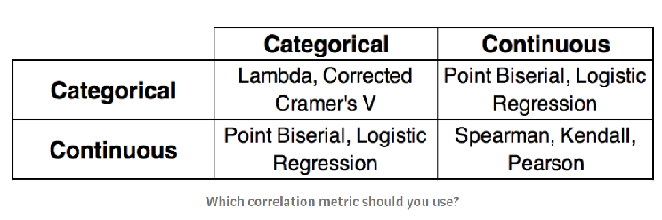

The point biserial correlation API is readily available on scipy.stats module. 

Now for finding correlation between two categorical variables we are going to use the  corrected version of Cramers V statistic. This uses correction from Bergsma and Wicher, Journal of the Korean Statistical Society 42 (2013): 323-328

For more info on implementation please see https://stackoverflow.com/questions/20892799/using-pandas-calculate-cram%C3%A9rs-coefficient-matrix and https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9

The utility function 'cramers_v' is taken from the above sites.

In [85]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

As mentioned above we are going to use Point Biserial correlation method for finding correlation between continuous and categorical.  The point biserial correlation API of scipy.stats module needs categorical variable to be coded as numerical. 

In [86]:
Loan_Data['encoded_loan_status'] = Loan_Data.loan_status.apply(lambda x: 0 if x == 'charged off' else 1)

# UNIVARIATE AND BIVARIATE ANALYSIS

Let's plot the percentages of full paid loans and charged off loans. Please note that we haven't considered the current loans for this EDA analysis.

<h3>1. LOAN_STATUS</h3>

This feature describes the Current status of the loan. We have already removed the loans with status as current.

In [87]:
grouped_data = Loan_Data.groupby(['loan_status'])['loan_status'].count()
grouped_data_pct = grouped_data/len(Loan_Data)*100
data = pd.DataFrame({'count': grouped_data,'percentage':grouped_data_pct})
data

count  percentage
loan_status                   
charged off   5627       14.59
fully paid   32950       85.41

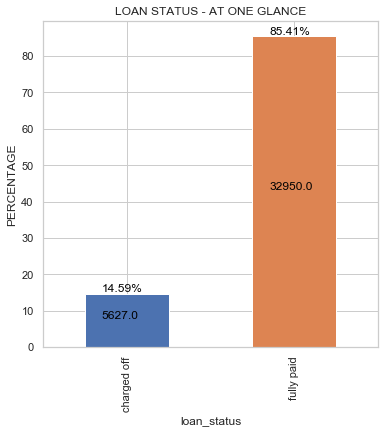

In [88]:
ax1 = data.percentage.plot.bar(figsize = (6, 6))
kx=-0.15
ky= 0.5
ax1.set_title("LOAN STATUS - AT ONE GLANCE")
plt.ylabel("PERCENTAGE")
for i,rec in enumerate(ax1.patches):
    ax1.text(rec.get_xy()[0]+rec.get_width()/2+kx,rec.get_xy()[1]+rec.get_height()+ky,str(round(data.iloc[i]['percentage'], 2))+'%',fontsize=12, color='black')
    ax1.text(rec.get_xy()[0]+rec.get_width()/2+kx,rec.get_xy()[1]+rec.get_height()/2+ky, data.iloc[i]['count'],fontsize=12, color='black')

**OBSERVATION**

So it is clear that **fully paid = 85.41%** and **charged off = 14.59%**

<h3>2. LOAN_AMOUNT</h3>

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

**Univariate Analysis**

UNIVARIATE MATRICES FOR THE FEATURE 'LOAN_AMNT'
-----------------------------------------------------------
count   38577.00
mean    11047.03
std      7348.44
min       500.00
25%      5300.00
50%      9600.00
75%     15000.00
max     35000.00
Name: loan_amnt, dtype: float64


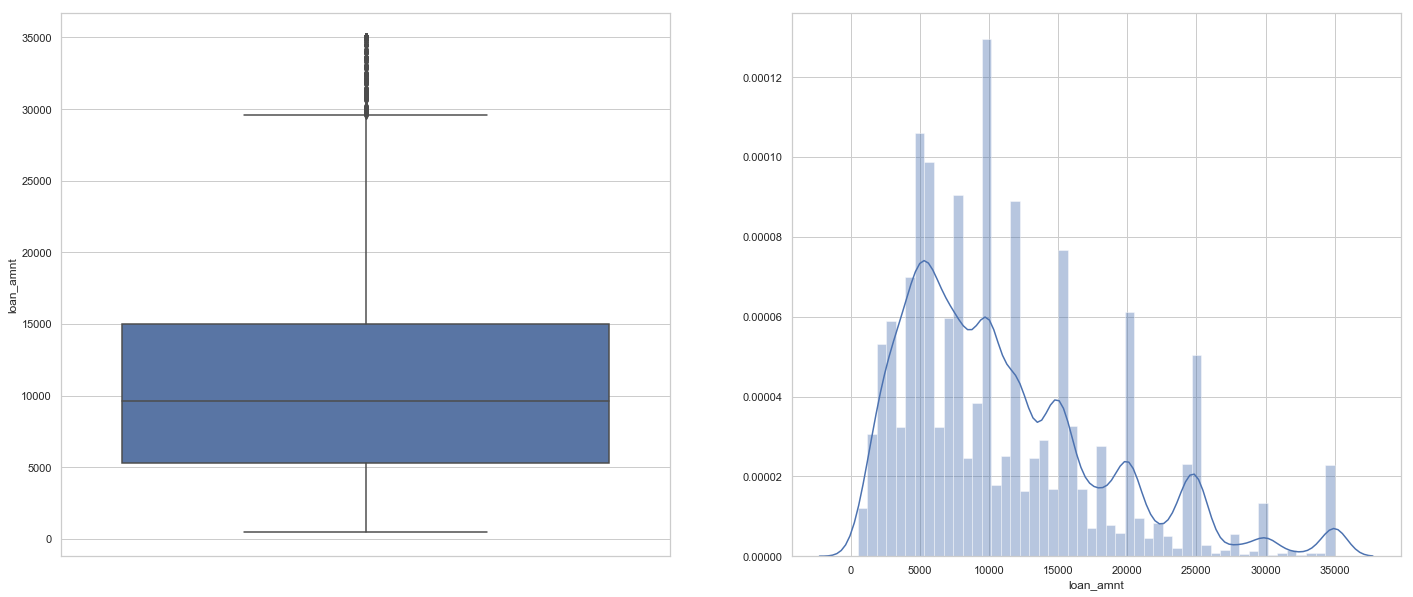

In [89]:
perform_continuous_univariate_and_plot(Loan_Data, 'loan_amnt')

**Observation**

1. As its seen in box plot 75% of the loan are within 15000. 
2. There is a significant difference between mean  = 11047.03 and median = 9600.00. This is due to outliers. Since this EDA is to find out the driving factor for loan defaulting, the oulier removal may affect the findings. We will create a new variable through binning and treat the outliers.
3. From distribution plot its clear that there is a peak at every 5000 $ intervals.

**Segmented Univariate Analysis against loan_status**



SEGMENTED UNIVARIATE MATRICES FOR FEATURE 'LOAN_AMNT'
-----------------------------------------------------------
               count     mean     std    min     25%      50%      75%      max
loan_status                                                                    
charged off  5627.00 12104.39 8085.73 900.00 5600.00 10000.00 16500.00 35000.00
fully paid  32950.00 10866.46 7199.63 500.00 5200.00  9600.00 15000.00 35000.00


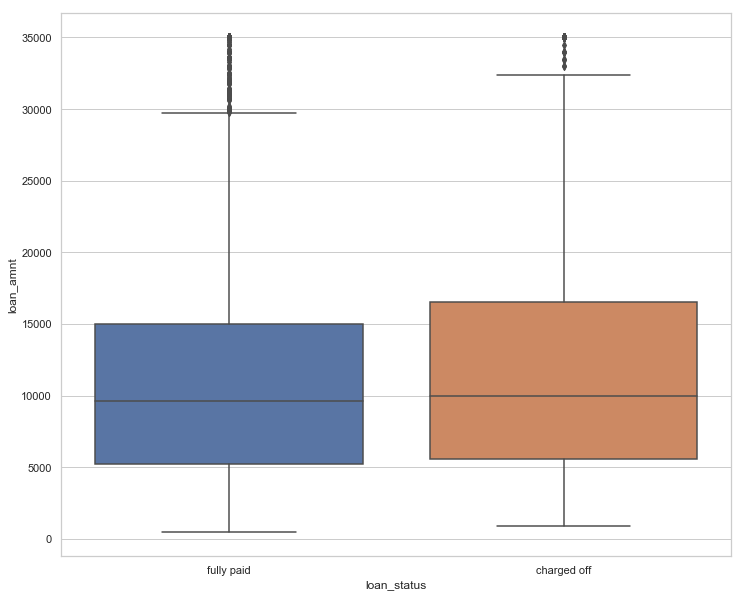

In [90]:
create_segmented_univariate_plot(Loan_Data, 'loan_amnt', 'loan_status')

**Observation**

1. As its seen in box plot min, 25%, 50%, 75% values are slightly higher for charged off loans compared to full paid ones.



SEGMENTED UNIVARIATE MATRICES FOR FEATURE 'LOAN_AMNT'
-----------------------------------------------------------
         count     mean     std     min      25%      50%      75%      max
grade                                                                      
A     10045.00  8618.76 5335.96  500.00  5000.00  7500.00 11200.00 35000.00
B     11675.00 10934.78 7078.70  500.00  5100.00 10000.00 15000.00 35000.00
C      7834.00 10815.52 7210.00  500.00  5000.00  9600.00 15000.00 35000.00
D      5085.00 12137.77 7599.71 1000.00  6000.00 10000.00 16000.00 35000.00
E      2663.00 15680.12 8956.35 1000.00  8200.00 15000.00 21600.00 35000.00
F       976.00 18095.24 9018.77 1200.00 10625.00 18000.00 25000.00 35000.00
G       299.00 20253.01 8524.32 1600.00 14100.00 20500.00 25000.00 35000.00


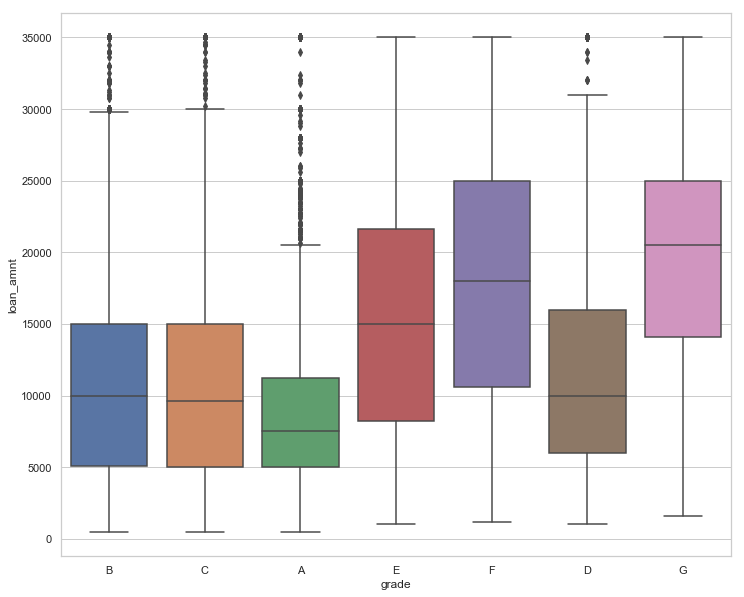

In [91]:
create_segmented_univariate_plot(Loan_Data, 'loan_amnt', 'grade')

It is very clear that as grade moves from C to GRADE D, E, F there is significant increase in loan amount at every quartiles. 

**pointbiserialr correlation**

Pointbiserial method is used to find the correlation between a continuous and a categorical variable. Here loan amount is continuous and loan status is categorical (which is the dependent variable). Pointbiserial will return a correlation between -1 to 1. Since we have encoded "fully paid" as 1 if the correlation is positive with incease in the value of this variable the dependent variable also increases. But here we are more interested on absolute value as we just wanted to know how much it is correlated.

In [92]:
pbc = ss.pointbiserialr(Loan_Data['encoded_loan_status'], Loan_Data['loan_amnt'])
pbc[0]

-0.059462596876317636

**Now let's convert it to categorical through binning pocess and create a new feature.**

Let's bin it into equal sized bins of 7000 increment


UNIVARIATE ANALYSIS FOR FEATURE 'LOAN_AMNT_BIN', FREQUENCY IN COUNT AND %
------------------------------------------------------------------------------
loan_status     Count  Percentage
loan_amnt_bin                    
(0, 7000]       14307       37.09
(7000, 14000]   13298       34.47
(14000, 21000]   7041       18.25
(21000, 28000]   2790        7.23
(28000, 35000]   1141        2.96


BIVARIATE ANALYSIS FOR FEATURE 'LOAN_AMNT_BIN' WITH RESPECT TO 'LOAN_STATUS' IN COUNT AND %
------------------------------------------------------------------------------
                charged off  fully paid  charged off %  fully paid %
loan_amnt_bin                                                       
(0, 7000]              1887       12420          13.19         86.81
(7000, 14000]          1786       11512          13.43         86.57
(14000, 21000]         1155        5886          16.40         83.60
(21000, 28000]          538        2252          19.28         80.72
(28000, 35000]       

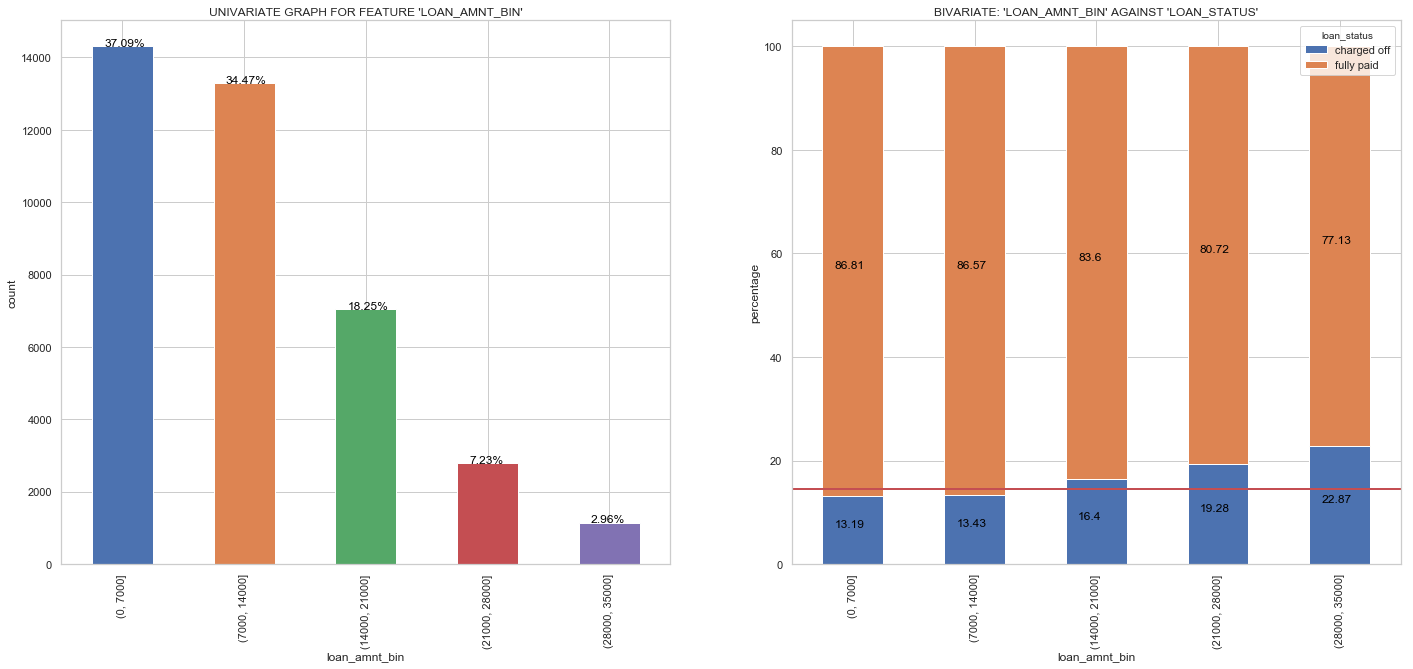

In [93]:
create_bin_and_plot(Loan_Data, 'loan_amnt', [0,7000,14000, 21000, 28000,35000])

**Observation**

It is very clear that as loan amount increases the chargeoff percentage is also increasing.

For loan amount within 28000 - 35000, the default(charge off) percentage shoots up till 22.87%. 

Let's compare how much is the jump when compared to the default rate for the dataset (14.59%) = ((22.87 - 14.59) = 8.28
8.29 is almost 56.7% of 14.59. Also the charge off rate monotonically increases with increase in loan amount.

**Hence the loan amount can be a potential driving factor.**


**Let's plot the loan_amnt against 'grade' and see how it is correlated**


UNIVARIATE ANALYSIS FOR FEATURE 'LOAN_AMNT_BIN', FREQUENCY IN COUNT AND %
------------------------------------------------------------------------------
grade           Count  Percentage
loan_amnt_bin                    
(0, 7000]       14307       37.09
(7000, 14000]   13298       34.47
(14000, 21000]   7041       18.25
(21000, 28000]   2790        7.23
(28000, 35500]   1141        2.96


BIVARIATE ANALYSIS FOR FEATURE 'LOAN_AMNT_BIN' WITH RESPECT TO 'GRADE' IN COUNT AND %
------------------------------------------------------------------------------
                   A     B     C     D    E    F   G   A %   B %   C %   D %  \
loan_amnt_bin                                                                  
(0, 7000]       4769  4318  2984  1530  541  137  28 33.33 30.18 20.86 10.69   
(7000, 14000]   3927  3998  2613  1797  710  207  46 29.53 30.06 19.65 13.51   
(14000, 21000]  1077  2276  1512  1086  737  273  80 15.30 32.32 21.47 15.42   
(21000, 28000]   191   857   542   510  3

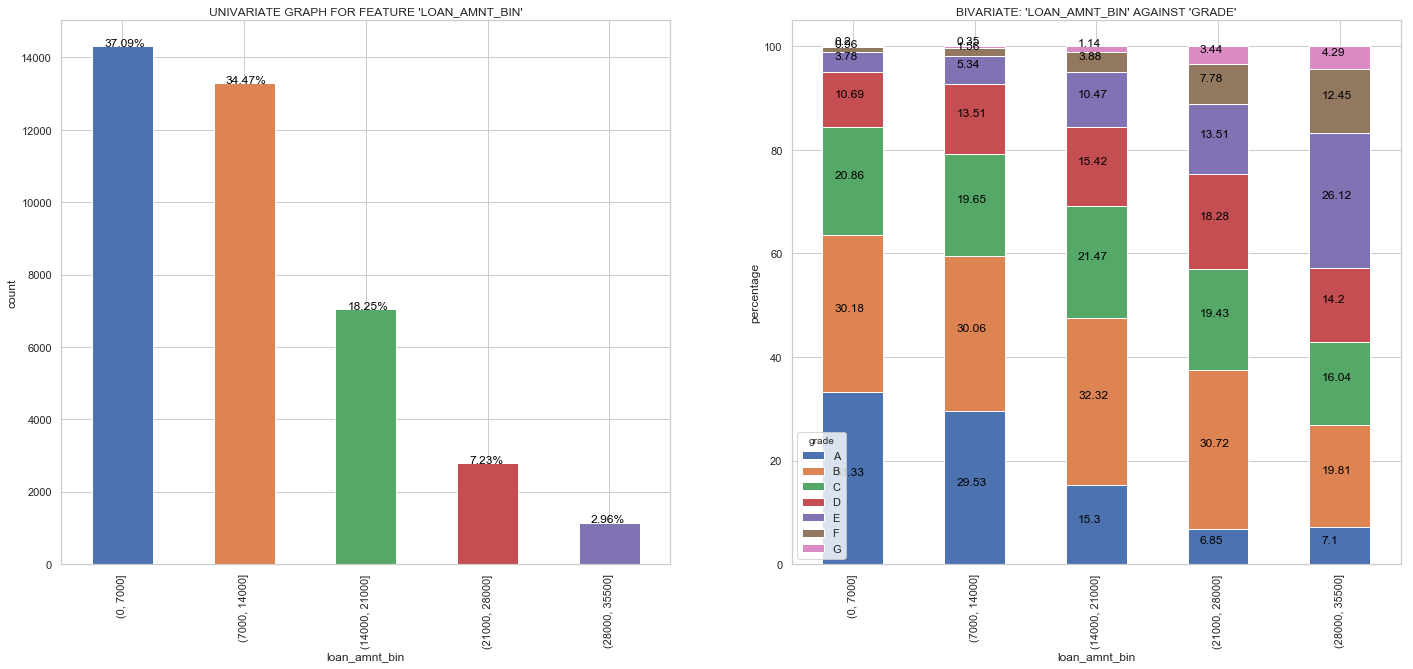

In [94]:
create_bin_and_plot(Loan_Data, 'loan_amnt',  [0,7000,14000, 21000, 28000,35500], 'grade')

**Observation**

As loan amount increases more loans are getting classified onto Grades 'C, D, E, F, G'
For laon_amonut between 28000 - 35000, 73% loans are classified under C to E

<h3>3. TERM</h3>

The number of payments on the loan. Values are in months and can be either 36 or 60. This is clearly a categorical variable lets perform univariate as well as bivariate(term vs loan_status) analysis.


UNIVARIATE ANALYSIS FOR FEATURE 'TERM', FREQUENCY IN COUNT AND %
------------------------------------------------------------------------------
loan_status  Count  Percentage
term                          
 36 months   29096       75.42
 60 months    9481       24.58


BIVARIATE ANALYSIS FOR FEATURE 'TERM' WITH RESPECT TO 'LOAN_STATUS' IN COUNT AND %
------------------------------------------------------------------------------
            charged off  fully paid  charged off %  fully paid %
term                                                            
 36 months         3227       25869          11.09         88.91
 60 months         2400        7081          25.31         74.69


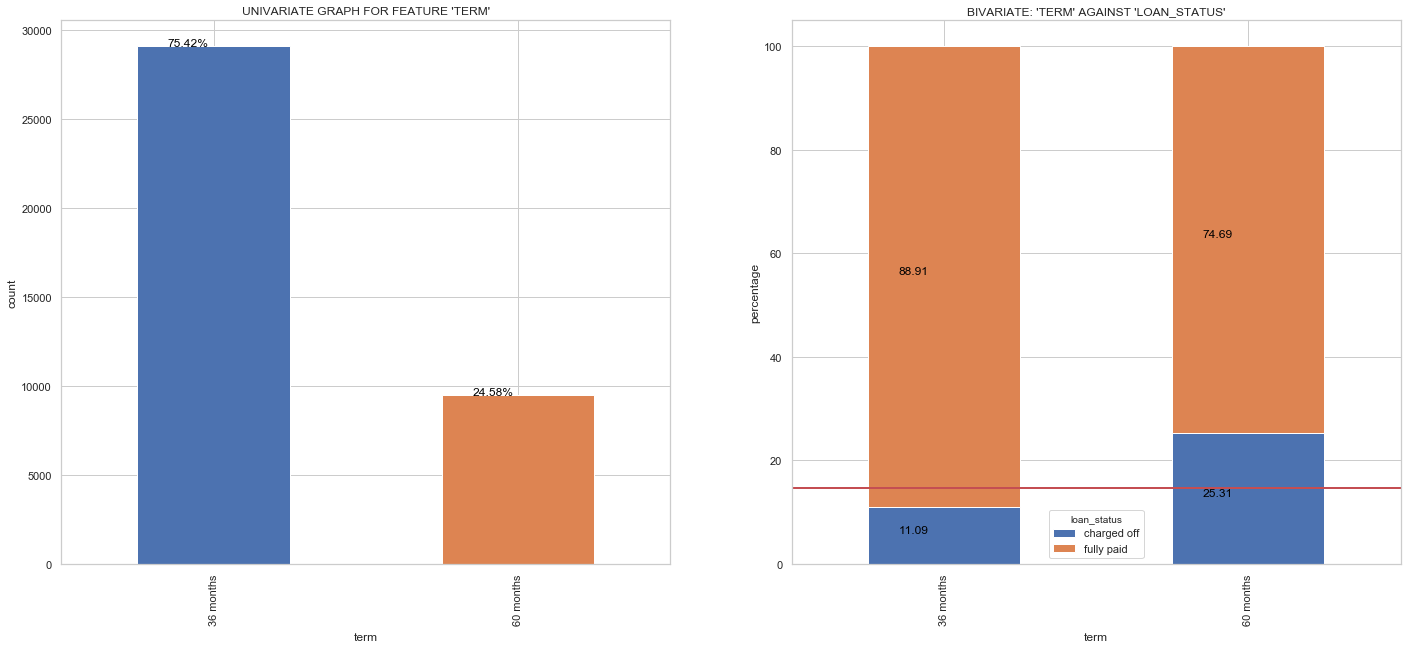

In [95]:
create_cross_tab_and_plot(Loan_Data, 'term')

**Observation**

1. As univariate analysis shows 75.42% are 36 months loan. Only 24.58% loans are having duration 60 months.
2. Out of 60 months duration loan, 25.31% of the loans are getting cahrged off compared to 11.09% for 36 months durtion loan

Let's compare how much is the jump when compared to the default rate for the dataset (14.59%) = ((25.31 - 14.59) = 10.72
8.29 is almost 70% of 14.59. Also the charge off rate monotonically increases with increase in loan amount.

**So its very clear that as loan term increases chances of defaulting the loan also increases. So TERM can be a potential driving factor**

<h3>4. INT_RATE</h3>

Lets see how the Interest Rate on the loan is affecting loan status

**Univariate Analysis**

UNIVARIATE MATRICES FOR THE FEATURE 'INT_RATE'
-----------------------------------------------------------
count   38577.00
mean       11.93
std         3.69
min         5.42
25%         8.94
50%        11.71
75%        14.38
max        24.40
Name: int_rate, dtype: float64


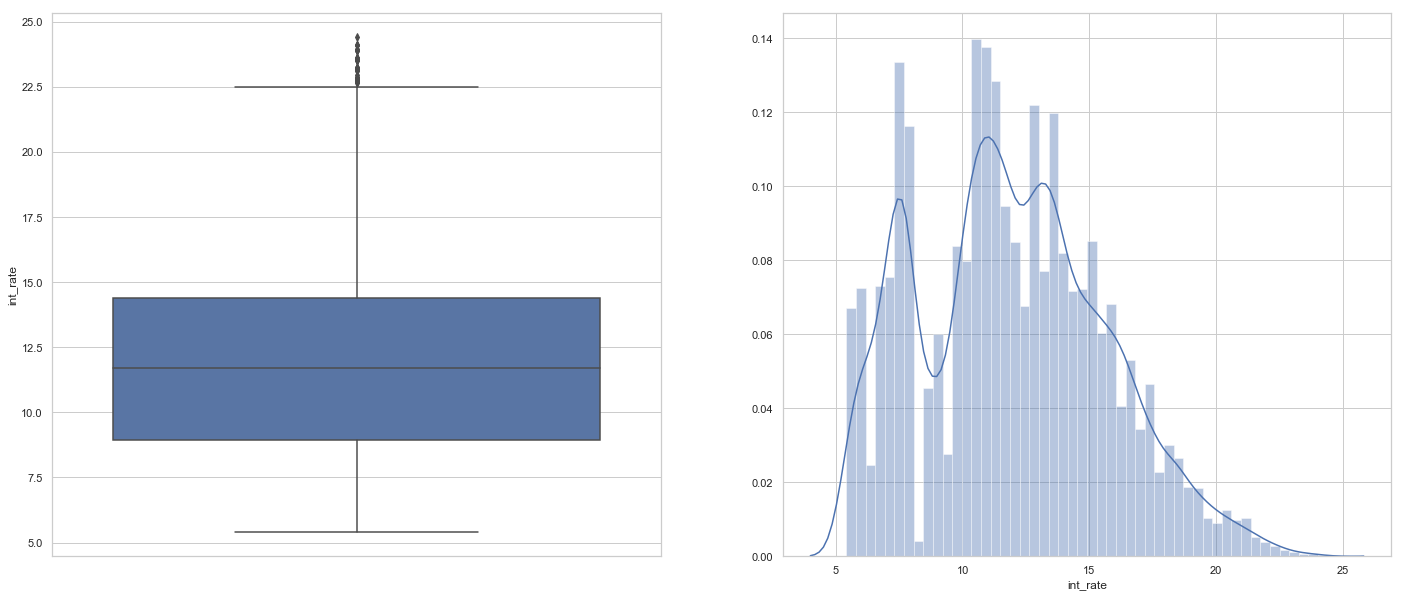

In [96]:
perform_continuous_univariate_and_plot(Loan_Data, 'int_rate')

Average interest rate(mean) - 11.93 % (mode) - 11.71%
75% of loans are approved with interest rate of 14.38 or lesser.

**Segmented Univariate Analysis**

Let us segment the interst rate, based on loan status and see further.



SEGMENTED UNIVARIATE MATRICES FOR FEATURE 'INT_RATE'
-----------------------------------------------------------
               count  mean  std  min   25%   50%   75%   max
loan_status                                                 
charged off  5627.00 13.82 3.65 5.42 11.31 13.61 16.40 24.40
fully paid  32950.00 11.61 3.60 5.42  8.49 11.49 13.99 24.11


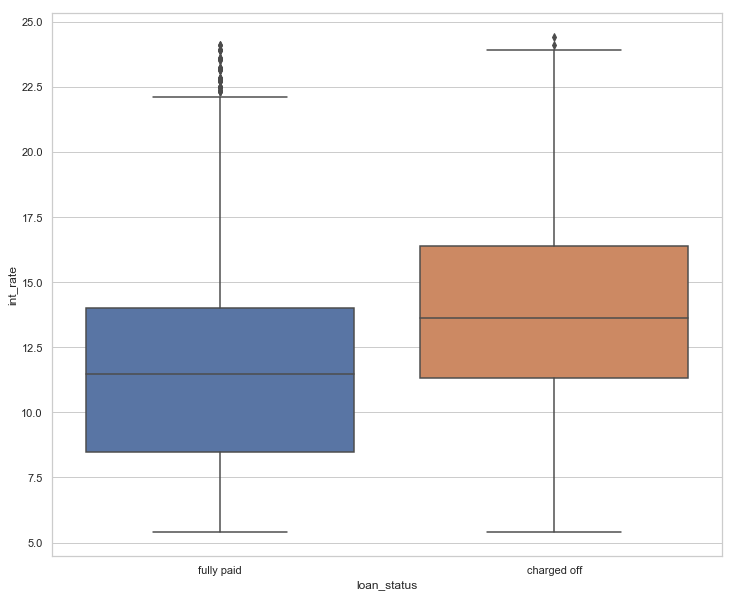

In [97]:
create_segmented_univariate_plot(Loan_Data, 'int_rate', 'loan_status')

**Observation**

The interest reate for those loans which are charged-off are much higher compared to interst rate of good loans.

Now we will calculate the biserial correlation between the loan_status and interest rate.  Pointbiserial will return a correlation between -1 to 1. But here we are more interested on absolute value as we just wanted to know how much it is correlated.

In [98]:
pbc = ss.pointbiserialr(Loan_Data['encoded_loan_status'], Loan_Data['int_rate'])
pbc[0]

-0.21139019019940317

**Create categorical variable through binning and perform univariate and bivariate:**


UNIVARIATE ANALYSIS FOR FEATURE 'INT_RATE_BIN', FREQUENCY IN COUNT AND %
------------------------------------------------------------------------------
loan_status   Count  Percentage
int_rate_bin                   
(5, 10]       12316       31.93
(10, 15]      18265       47.35
(15, 20]       7226       18.73
(20, 25]        770        2.00


BIVARIATE ANALYSIS FOR FEATURE 'INT_RATE_BIN' WITH RESPECT TO 'LOAN_STATUS' IN COUNT AND %
------------------------------------------------------------------------------
              charged off  fully paid  charged off %  fully paid %
int_rate_bin                                                      
(5, 10]               830       11486           6.74         93.26
(10, 15]             2707       15558          14.82         85.18
(15, 20]             1794        5432          24.83         75.17
(20, 25]              296         474          38.44         61.56


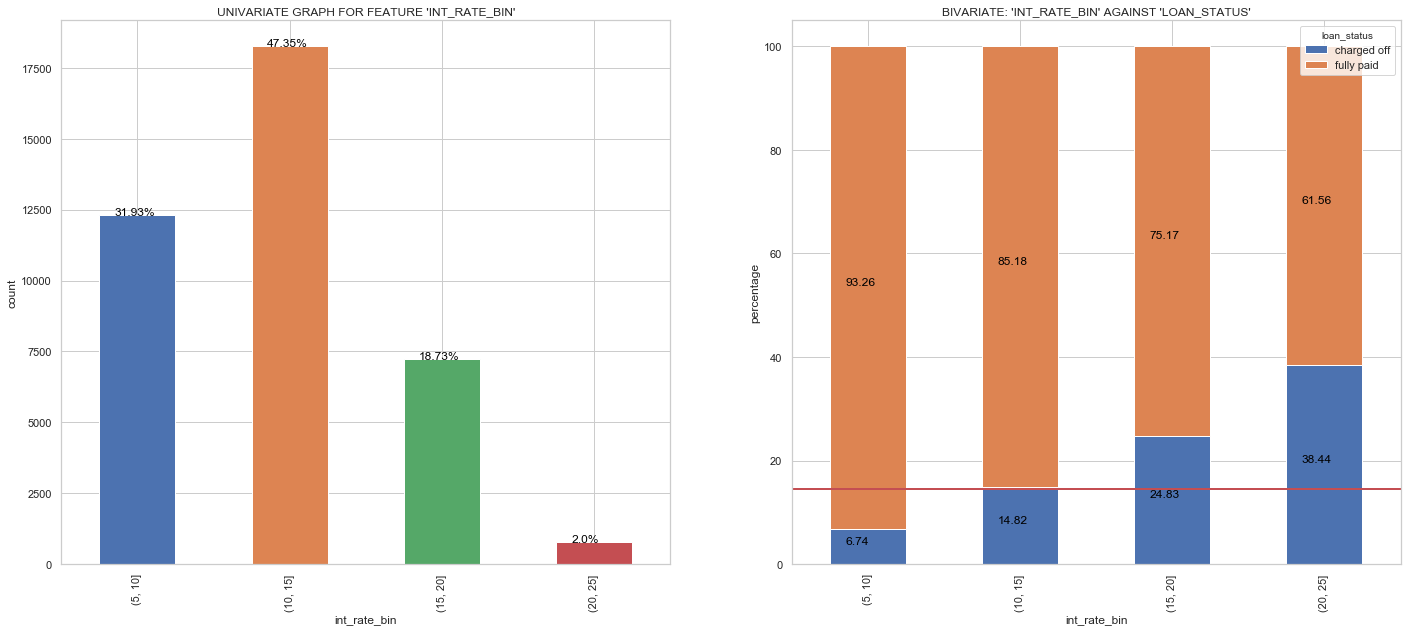

In [99]:
create_bin_and_plot(Loan_Data, 'int_rate', [5, 10,15, 20, 25])

**Observation**

It is very clear that as loan interest increases chances of defaulting the loan also increases.
Any interest rate of 15% or beyond is seeing a huge chances of charge-off

**Since the data shows a monotonic increase in % of charge off with increase in interest rate, "Interest rate" can be considered as one of potential driving factors.**

<h3>5. INSTALLMENT</h3>

Let us now analyse whether loan installment has any impact on loan status

**Univariate Analysis**

UNIVARIATE MATRICES FOR THE FEATURE 'INSTALLMENT'
-----------------------------------------------------------
count   38577.00
mean      322.47
std       208.64
min        15.69
25%       165.74
50%       277.86
75%       425.55
max      1305.19
Name: installment, dtype: float64


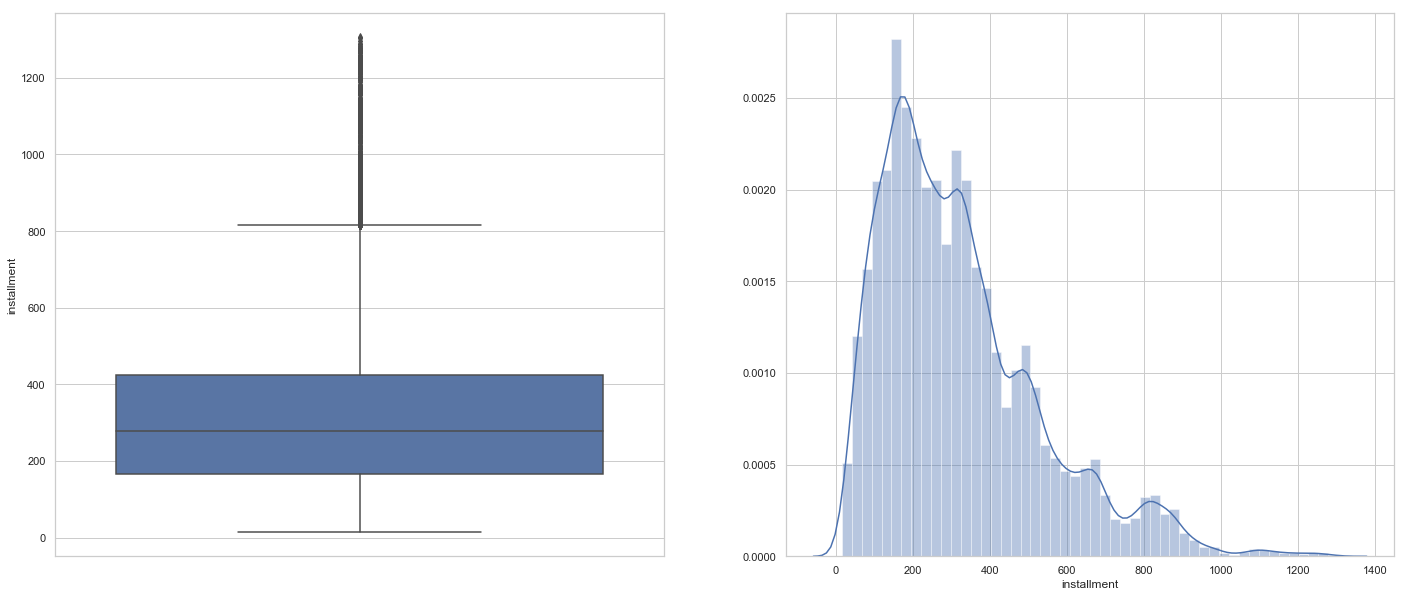

In [100]:
perform_continuous_univariate_and_plot(Loan_Data, 'installment')

**Observation**

Installment varies varies largely between 165.74(25%) to 425.55(75%) with median of 277.86



**Segmented Univariate analysis**

Lets perform segmented univarite on the installment feature w r t loan_status



SEGMENTED UNIVARIATE MATRICES FOR FEATURE 'INSTALLMENT'
-----------------------------------------------------------
               count   mean    std   min    25%    50%    75%     max
loan_status                                                          
charged off  5627.00 336.18 217.05 22.79 168.56 293.87 457.84 1305.19
fully paid  32950.00 320.13 207.08 15.69 165.28 275.65 420.74 1295.21


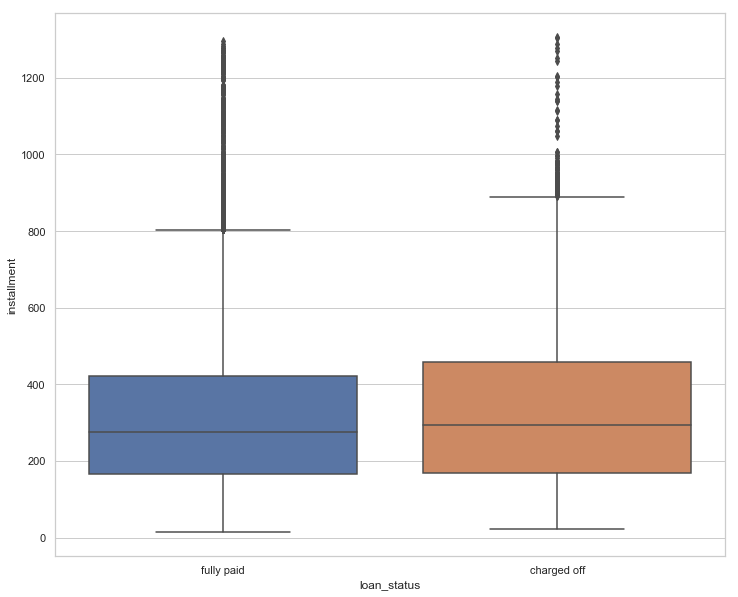

In [101]:
create_segmented_univariate_plot(Loan_Data, 'installment', 'loan_status')

As we can see there is not much differences between both category, 25 and 50 percentile are more comparable for both the category

Now we will calculate the biserial correlation between the loan_status and interest rate.  Pointbiserial will return a correlation between -1 to 1. But here we are more interested on absolute value as we just wanted to know how much it is correlated.

In [102]:
pbc = ss.pointbiserialr(Loan_Data['encoded_loan_status'], Loan_Data['installment'])
pbc[0]

-0.027152907298031322

The correlation value also vcery close to zero, which indicates not much impact on dependent variable "installmet"

**Create derived feature through binning and perform univariate and bivariate analysis:**


UNIVARIATE ANALYSIS FOR FEATURE 'INSTALLMENT_BIN', FREQUENCY IN COUNT AND %
------------------------------------------------------------------------------
loan_status      Count  Percentage
installment_bin                   
(0, 200]         13074       33.89
(200, 300]        7608       19.72
(300, 400]        7124       18.47
(400, 600]        6563       17.01
(600, 800]        2637        6.84
(800, 1400]       1571        4.07


BIVARIATE ANALYSIS FOR FEATURE 'INSTALLMENT_BIN' WITH RESPECT TO 'LOAN_STATUS' IN COUNT AND %
------------------------------------------------------------------------------
                 charged off  fully paid  charged off %  fully paid %
installment_bin                                                      
(0, 200]                1813       11261          13.87         86.13
(200, 300]              1068        6540          14.04         85.96
(300, 400]               994        6130          13.95         86.05
(400, 600]              1048        551

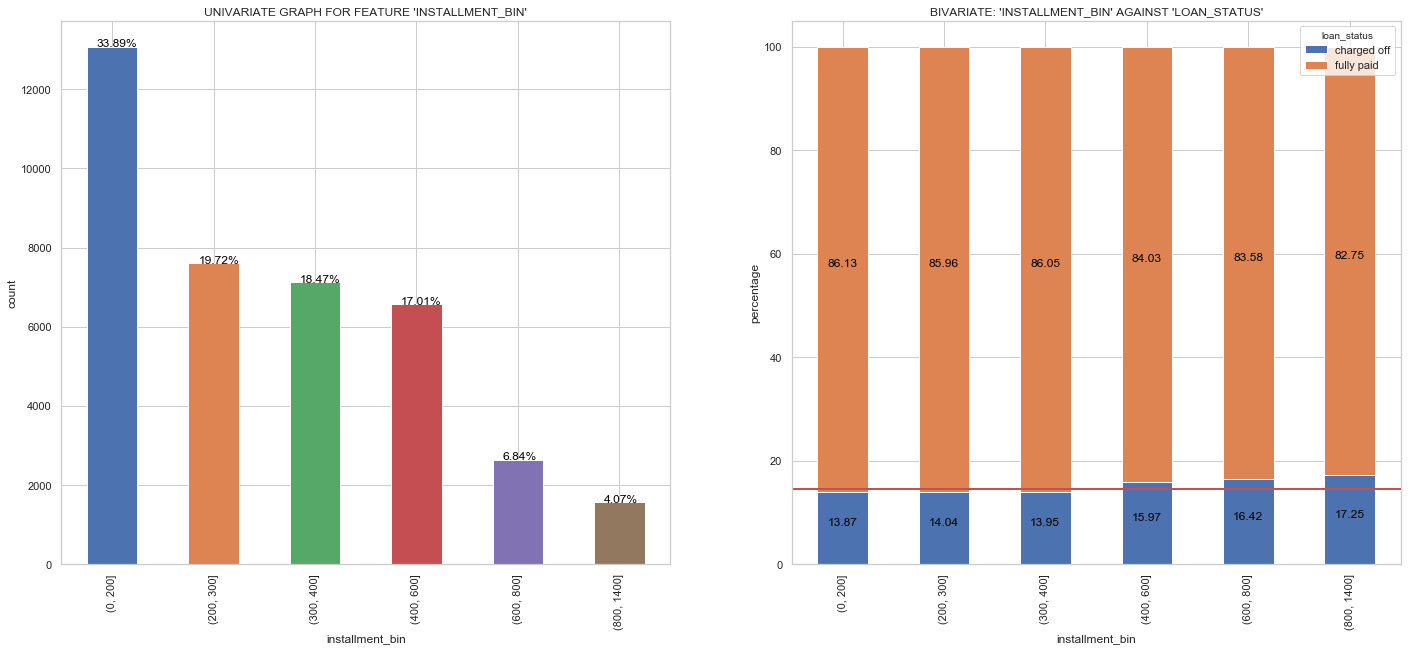

In [103]:
create_bin_and_plot(Loan_Data, 'installment', [0, 200, 300, 400, 600, 800, 1400])

**Observation**

There is a marginal incraese in the percentage of default as installment amount increases. But this is not as good to be considered as a potential factor.

<h3>6. GRADE</h3>

These are lending club assigned loan grades, as per them safe loans are assigned with grade A and as risk increases the grade can be as bad as G


UNIVARIATE ANALYSIS FOR FEATURE 'GRADE', FREQUENCY IN COUNT AND %
------------------------------------------------------------------------------
loan_status  Count  Percentage
grade                         
A            10045       26.04
B            11675       30.26
C             7834       20.31
D             5085       13.18
E             2663        6.90
F              976        2.53
G              299        0.78


BIVARIATE ANALYSIS FOR FEATURE 'GRADE' WITH RESPECT TO 'LOAN_STATUS' IN COUNT AND %
------------------------------------------------------------------------------
       charged off  fully paid  charged off %  fully paid %
grade                                                      
A              602        9443           5.99         94.01
B             1425       10250          12.21         87.79
C             1347        6487          17.19         82.81
D             1118        3967          21.99         78.01
E              715        1948          26.85     

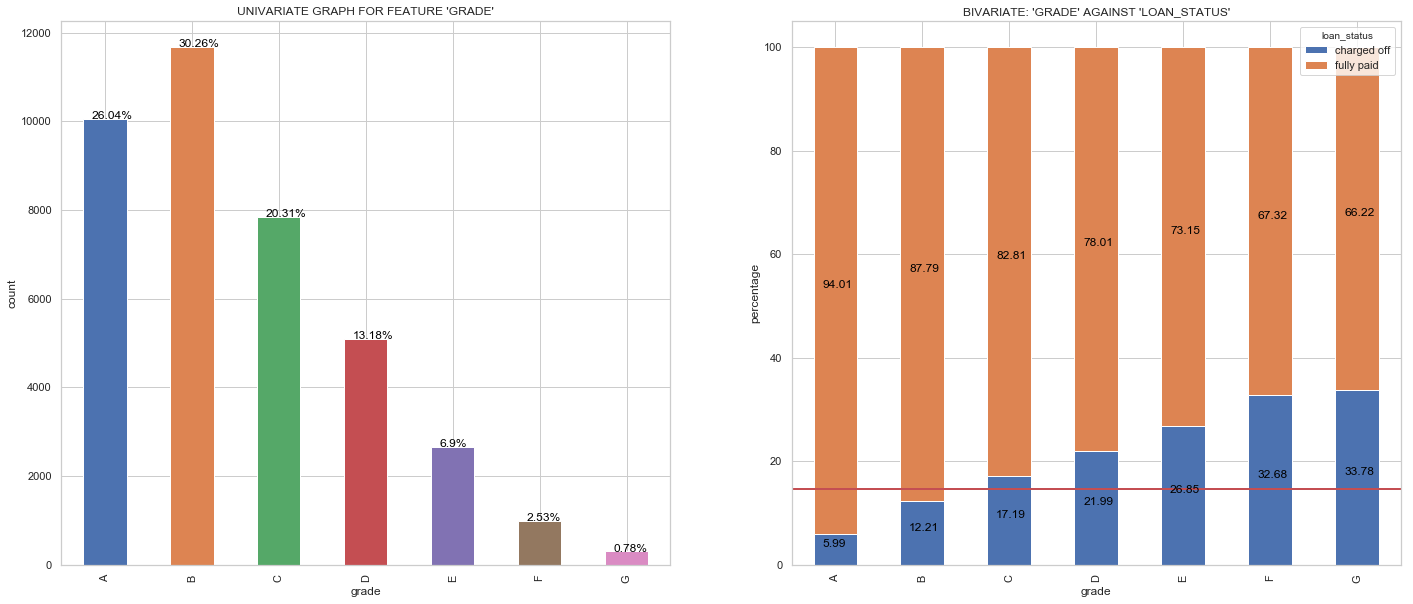

In [104]:
create_cross_tab_and_plot(Loan_Data, 'grade')

**Observation**

Univariate analsysis clearly shows that Grade A and B comprises of almost 56% of total loans.

Bivariate analysis shows that as grade moves from A to G the percentage of charge off increases from 6% to 33.78%

Loan with grading from C onwards are above the current charge off % (current charge off % is 14%). So anything beyong C is risky. 

**This feature(GRADE) is a potential driving factor**

<h3>7. SUB GRADE</h3>

Thease are LC assigned loan subgrade. Expected to follow same trend as GRADE


UNIVARIATE ANALYSIS FOR FEATURE 'SUB_GRADE', FREQUENCY IN COUNT AND %
------------------------------------------------------------------------------
loan_status  Count  Percentage
sub_grade                     
A1            1139        2.95
A2            1508        3.91
A3            1810        4.69
A4            2873        7.45
A5            2715        7.04
B1            1797        4.66
B2            2001        5.19
B3            2825        7.32
B4            2437        6.32
B5            2615        6.78
C1            2055        5.33
C2            1931        5.01
C3            1488        3.86
C4            1206        3.13
C5            1154        2.99
D1             931        2.41
D2            1286        3.33
D3            1116        2.89
D4             918        2.38
D5             834        2.16
E1             722        1.87
E2             614        1.59
E3             516        1.34
E4             424        1.10
E5             387        1.00
F1           

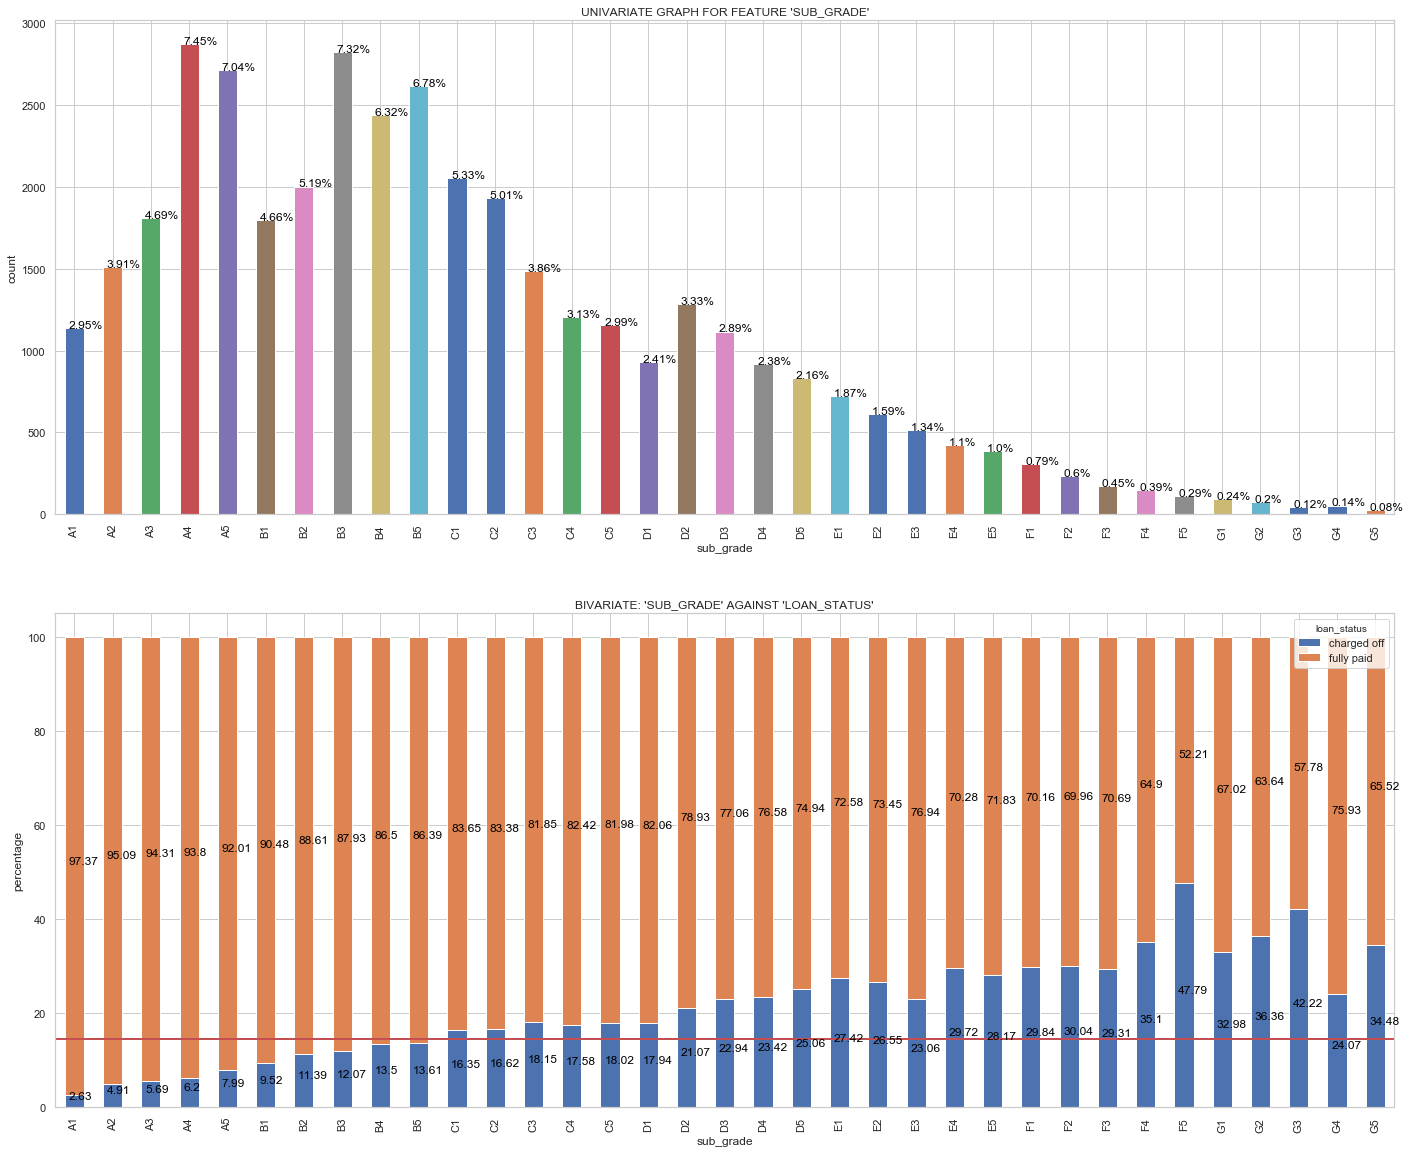

In [105]:
create_cross_tab_and_plot(Loan_Data, 'sub_grade')

**Observation**

Subgrade shows a trend similar to grade sub grade from C1 till G5 are above the current default percentage (which is 14%)

**Looks like GRADE and SUB GRADE are highly correlated and these two almost gives same inference**

<h3>8. EMP_LENGTH</h3>

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 

Also we have seen there were missing values, we bucketed them in a new category '-1' hence it wont add any bias


UNIVARIATE ANALYSIS FOR FEATURE 'EMP_LENGTH', FREQUENCY IN COUNT AND %
------------------------------------------------------------------------------
loan_status  Count  Percentage
emp_length                    
-1            1033        2.68
 0            4508       11.69
 1            3169        8.21
 2            4291       11.12
 3            4012       10.40
 4            3342        8.66
 5            3194        8.28
 6            2168        5.62
 7            1711        4.44
 8            1435        3.72
 9            1226        3.18
 10           8488       22.00


BIVARIATE ANALYSIS FOR FEATURE 'EMP_LENGTH' WITH RESPECT TO 'LOAN_STATUS' IN COUNT AND %
------------------------------------------------------------------------------
            charged off  fully paid  charged off %  fully paid %
emp_length                                                      
-1                  228         805          22.07         77.93
 0                  639        3869          14.17

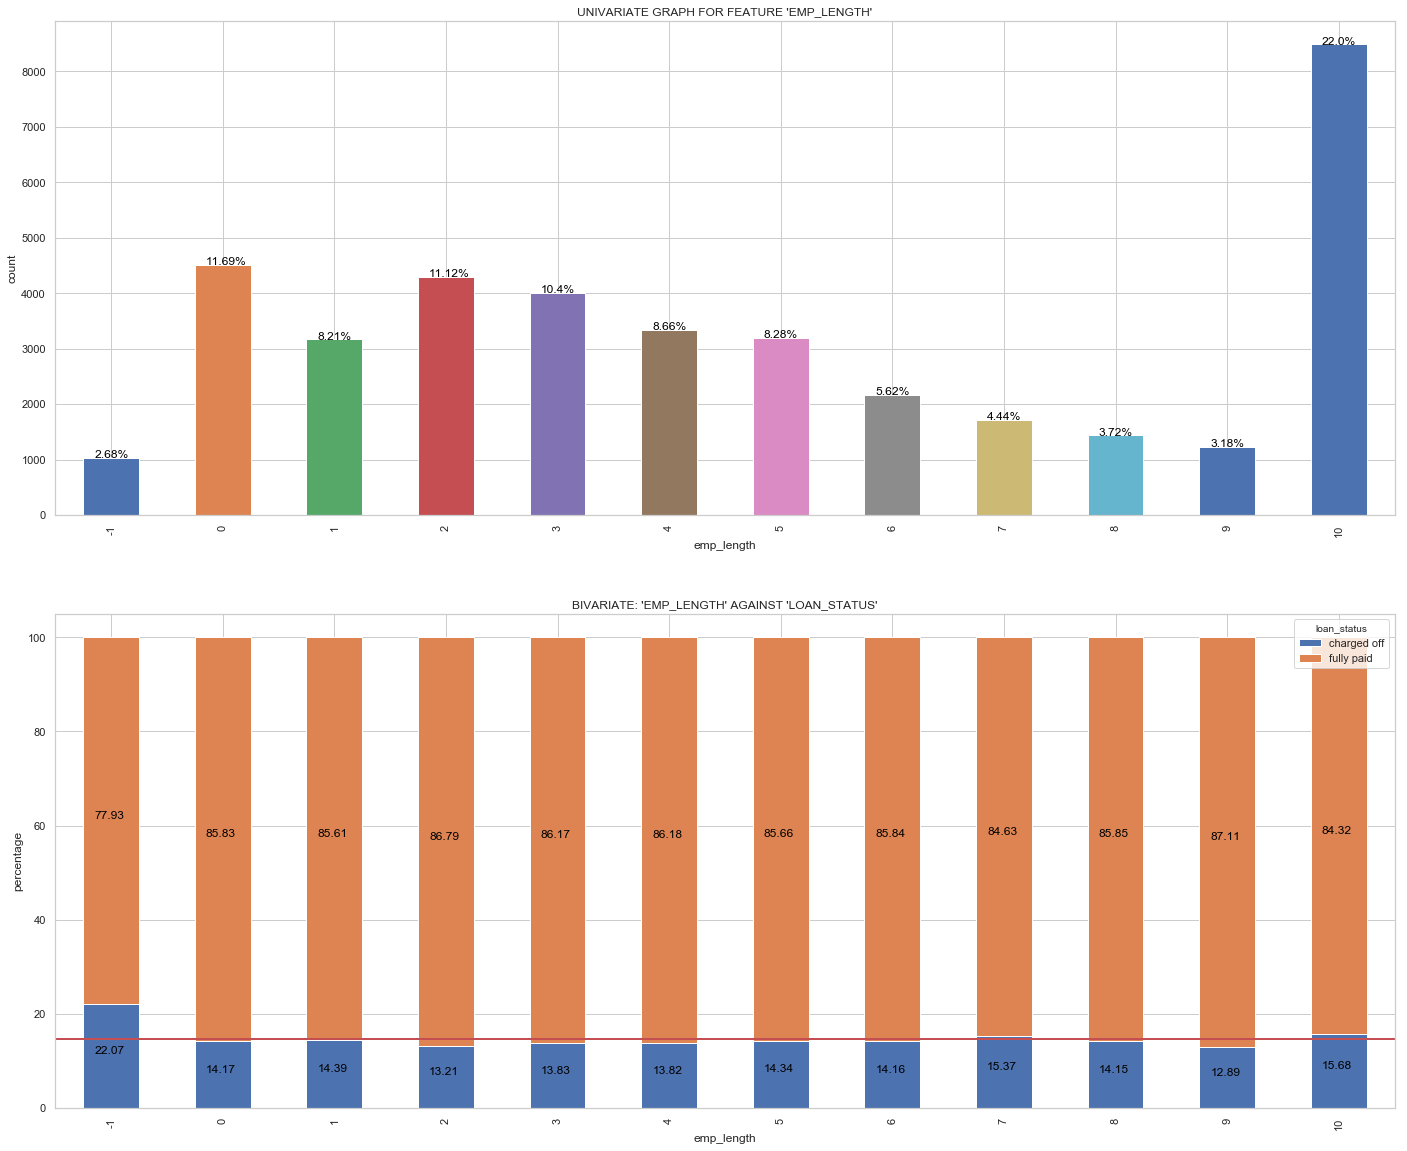

In [106]:
create_cross_tab_and_plot(Loan_Data, 'emp_length')

**Observation**

There is not much difference in the default rate when compared based on the employment duration, among those who provided the employment details during the loan processing. Hence this cannot be considered as a driving factor.

But it is interesting to note that who did not provide employment duration (corresponding to the imputed value -1, the missing ones are denoted with -1  so it should not affect any other analsysis), the default rate is more. After doing this analsysis assume they are either unemployed/self employed.

<h3>9. HOME_OWNERSHIP</h3>

Now lt's see whether home ownership has any impact on the loan status. Different categories are, OWN, RENT, MORTGAGE, OTHER. There we some records with 'NONE' as value. We have converted it to OTHERs


UNIVARIATE ANALYSIS FOR FEATURE 'HOME_OWNERSHIP', FREQUENCY IN COUNT AND %
------------------------------------------------------------------------------
loan_status     Count  Percentage
home_ownership                   
MORTGAGE        17021       44.12
OTHER             101        0.26
OWN              2975        7.71
RENT            18480       47.90


BIVARIATE ANALYSIS FOR FEATURE 'HOME_OWNERSHIP' WITH RESPECT TO 'LOAN_STATUS' IN COUNT AND %
------------------------------------------------------------------------------
                charged off  fully paid  charged off %  fully paid %
home_ownership                                                      
MORTGAGE               2327       14694          13.67         86.33
OTHER                    18          83          17.82         82.18
OWN                     443        2532          14.89         85.11
RENT                   2839       15641          15.36         84.64


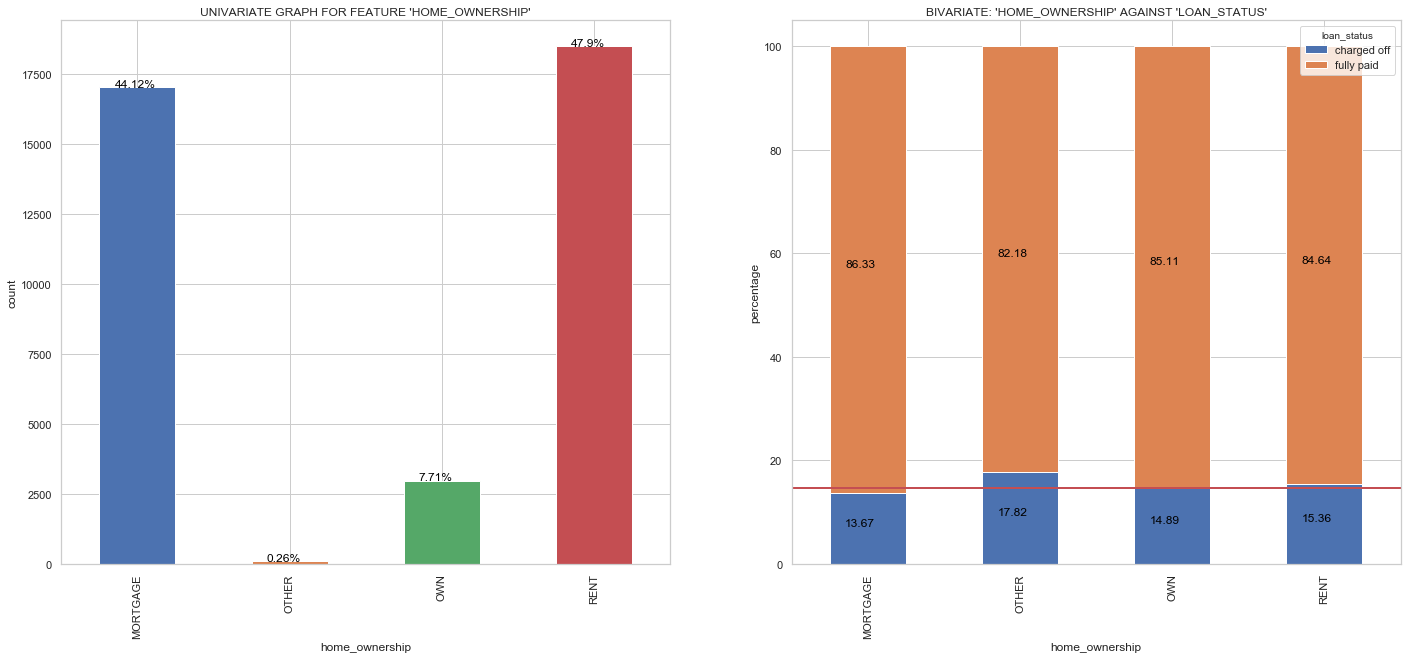

In [107]:
create_cross_tab_and_plot(Loan_Data, 'home_ownership')

**Observation**

There is not much difference in the percentage of default when compared with home ownership status. Hence this cannot be considered as a driving factor.

<h3>10. ANNUAL_INCOME</h3>

The self-reported annual income provided by the borrower during registration.

**Univariate Analysis**

UNIVARIATE MATRICES FOR THE FEATURE 'ANNUAL_INC'
-----------------------------------------------------------
count     38577.00
mean      68777.97
std       64218.68
min        4000.00
25%       40000.00
50%       58868.00
75%       82000.00
max     6000000.00
Name: annual_inc, dtype: float64


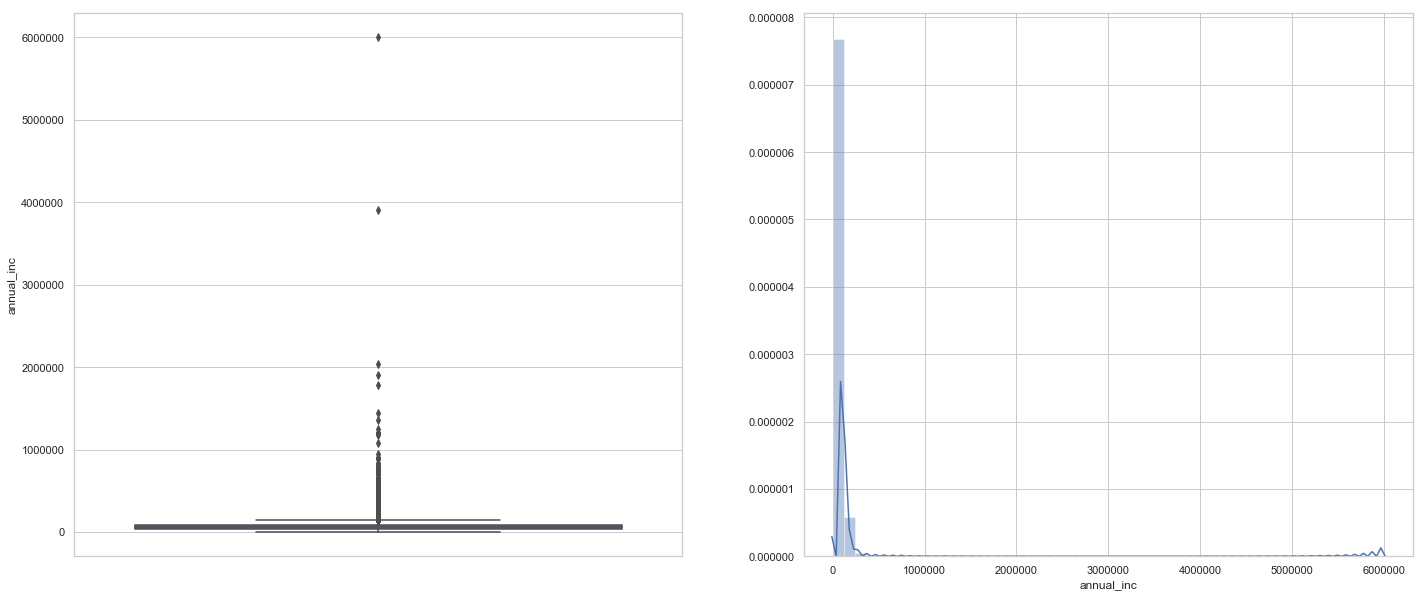

In [108]:
perform_continuous_univariate_and_plot(Loan_Data, 'annual_inc')

**Observation**

This looks to be highly skewed data with median $ 58868.00. 

Minumum inconme is as lower as 4000 and max value is as high as 6,000,000

We will remove the otliers as mentioned in https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/

**Removal Of Outliers**

In [109]:
# calculate summary statistics
data_mean, data_std = (Loan_Data.annual_inc.mean()), (Loan_Data.annual_inc.std())
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
print(lower, upper)

-123878.07172374544 261434.0190861636


In [110]:
#since the lower range is -ve we will only consider upper range and remove outliers 
Loan_data_cleaned = Loan_Data[Loan_Data.annual_inc < upper]
print("Number of outliers removed: ", len(Loan_Data) - len(Loan_data_cleaned))

Number of outliers removed:  279


UNIVARIATE MATRICES FOR THE FEATURE 'ANNUAL_INC'
-----------------------------------------------------------
count    38298.00
mean     65820.38
std      36385.80
min       4000.00
25%      40000.00
50%      58000.00
75%      81000.00
max     260735.00
Name: annual_inc, dtype: float64


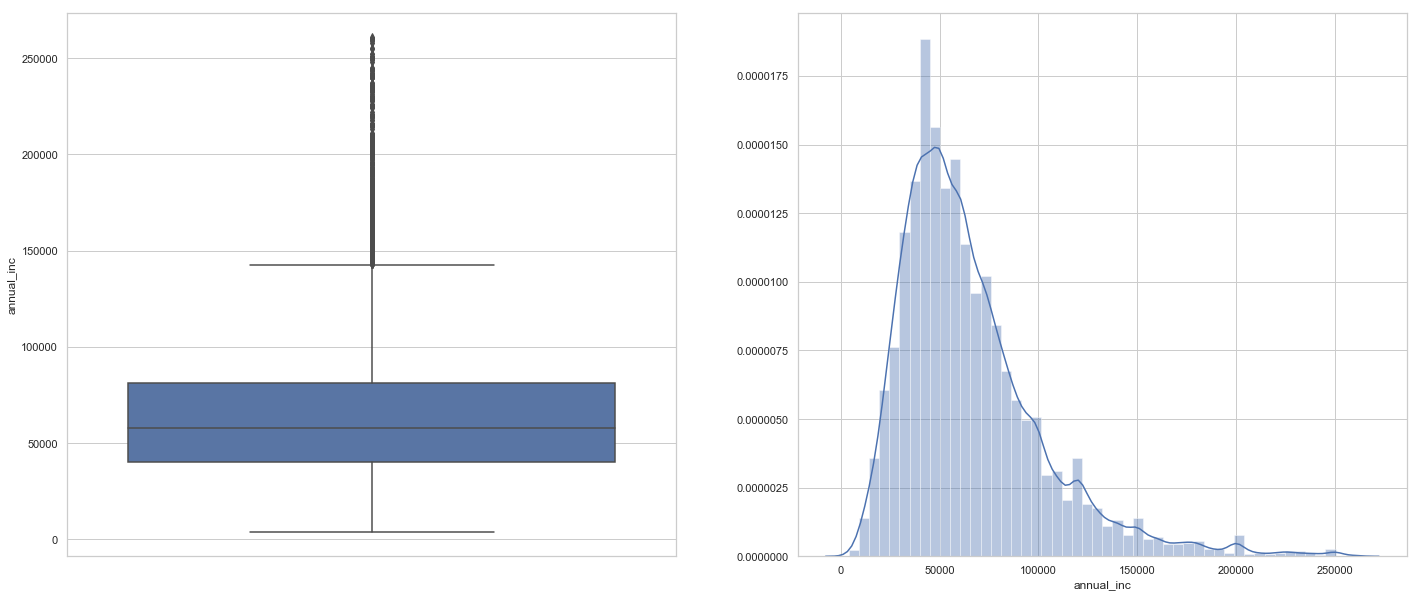

In [111]:
perform_continuous_univariate_and_plot(Loan_data_cleaned, 'annual_inc')

**Segmented Univariate Analysis**



SEGMENTED UNIVARIATE MATRICES FOR FEATURE 'ANNUAL_INC'
-----------------------------------------------------------
               count     mean      std     min      25%      50%      75%       max
loan_status                                                                        
charged off  5597.00 60265.48 33957.41 4080.00 37000.00 53000.00 75000.00 254616.00
fully paid  32701.00 66771.14 36701.69 4000.00 41000.00 60000.00 83000.00 260735.00


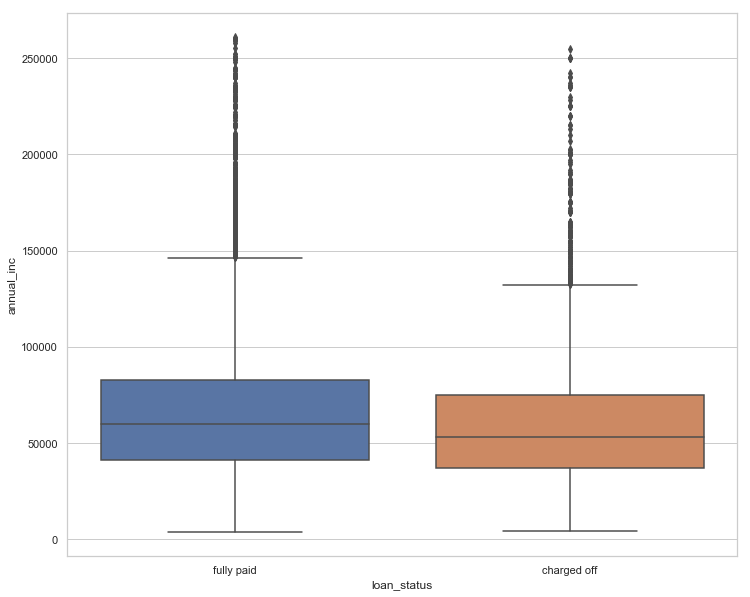

In [112]:
create_segmented_univariate_plot(Loan_data_cleaned, 'annual_inc', 'loan_status')

Observation: For charged off loan 25, 50, 75 percentile values are lesser as compared to that of fully paid loans.

**Let's convert it to categorical through binning and perform bivariate and univariate analysis:**


UNIVARIATE ANALYSIS FOR FEATURE 'ANNUAL_INC_BIN', FREQUENCY IN COUNT AND %
------------------------------------------------------------------------------
loan_status       Count  Percentage
annual_inc_bin                     
(0, 20000]         1180        3.08
(20000, 40000]     8518       22.24
(40000, 60000]    11263       29.41
(60000, 80000]     7621       19.90
(80000, 100000]    4514       11.79
(100000, 120000]   2328        6.08
(120000, 140000]   1218        3.18
(140000, 160000]    710        1.85
(160000, 180000]    384        1.00
(180000, 200000]    271        0.71
(200000, 220000]    115        0.30
(220000, 240000]    102        0.27
(240000, 260000]     73        0.19


BIVARIATE ANALYSIS FOR FEATURE 'ANNUAL_INC_BIN' WITH RESPECT TO 'LOAN_STATUS' IN COUNT AND %
------------------------------------------------------------------------------
                  charged off  fully paid  charged off %  fully paid %
annual_inc_bin                                              

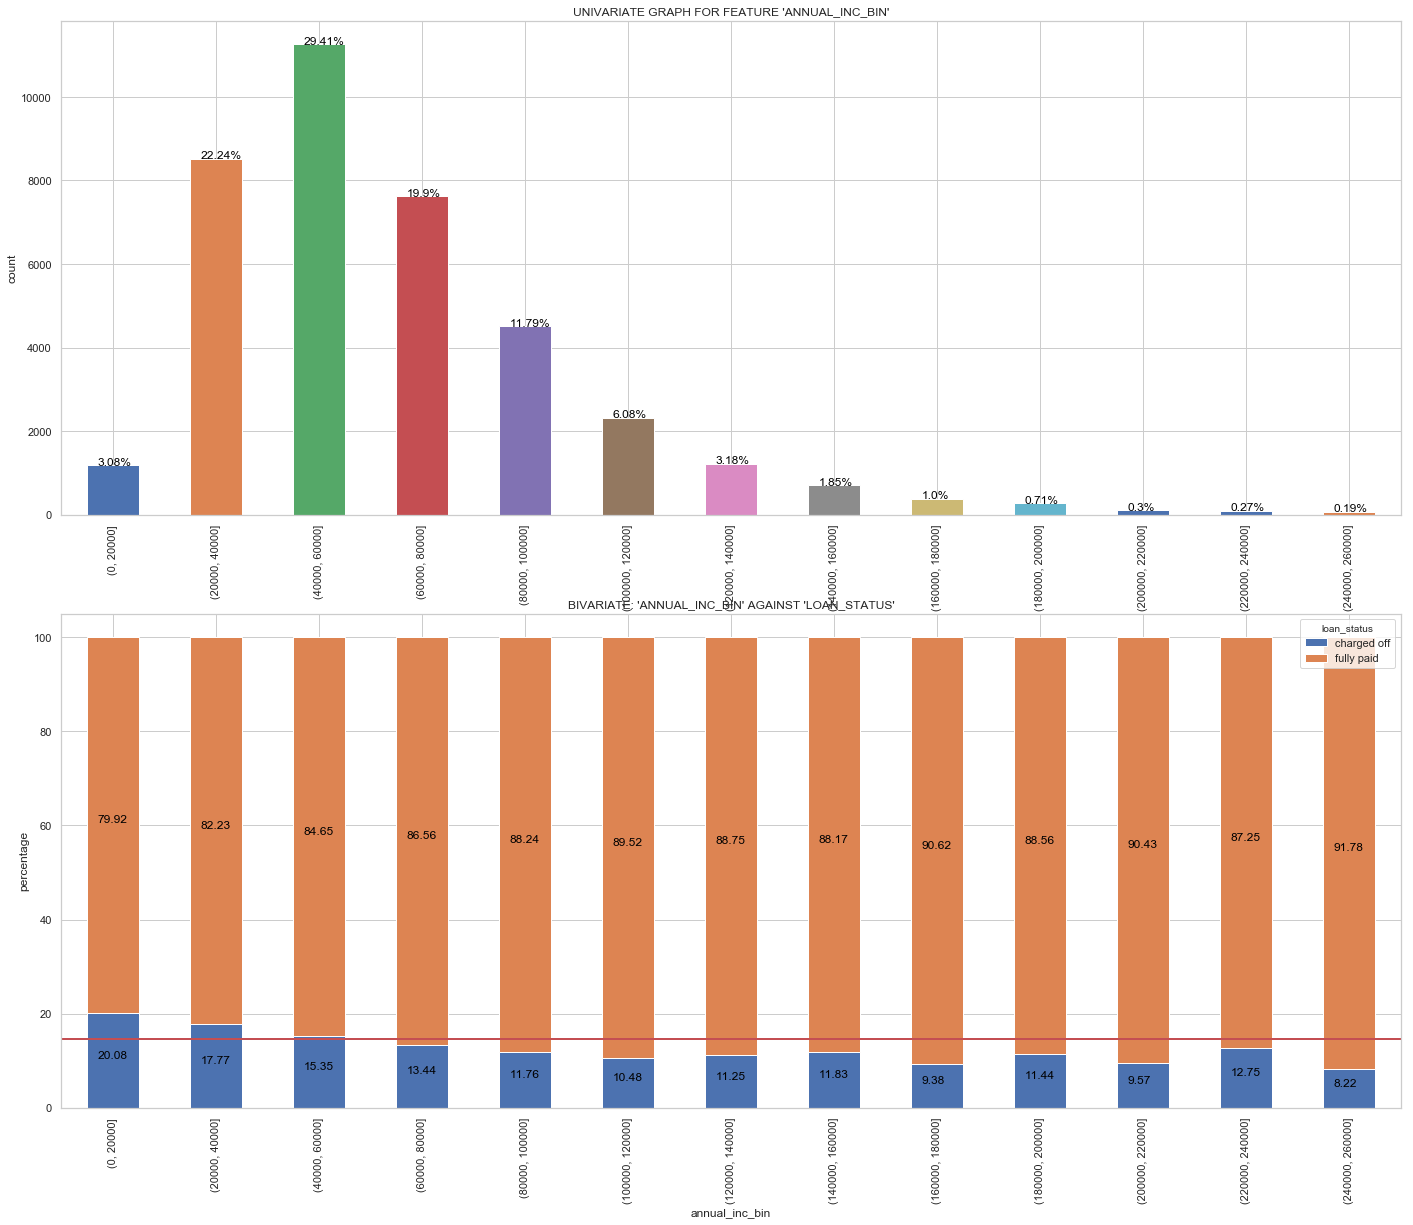

In [113]:
bins = list(range(0, 280000, 20000))
create_bin_and_plot(Loan_data_cleaned, 'annual_inc', bins)

**Let's try binning without removing outliers. basically binning should take care of outliers**


UNIVARIATE ANALYSIS FOR FEATURE 'ANNUAL_INC_BIN', FREQUENCY IN COUNT AND %
------------------------------------------------------------------------------
loan_status        Count  Percentage
annual_inc_bin                      
(0, 20000]          1180        3.06
(20000, 40000]      8518       22.08
(40000, 60000]     11263       29.20
(60000, 80000]      7621       19.76
(80000, 100000]     4514       11.70
(100000, 120000]    2328        6.03
(120000, 140000]    1218        3.16
(140000, 160000]     710        1.84
(160000, 180000]     384        1.00
(180000, 200000]     271        0.70
(200000, 220000]     115        0.30
(220000, 240000]     102        0.26
(240000, 6000000]    353        0.92


BIVARIATE ANALYSIS FOR FEATURE 'ANNUAL_INC_BIN' WITH RESPECT TO 'LOAN_STATUS' IN COUNT AND %
------------------------------------------------------------------------------
                   charged off  fully paid  charged off %  fully paid %
annual_inc_bin                              

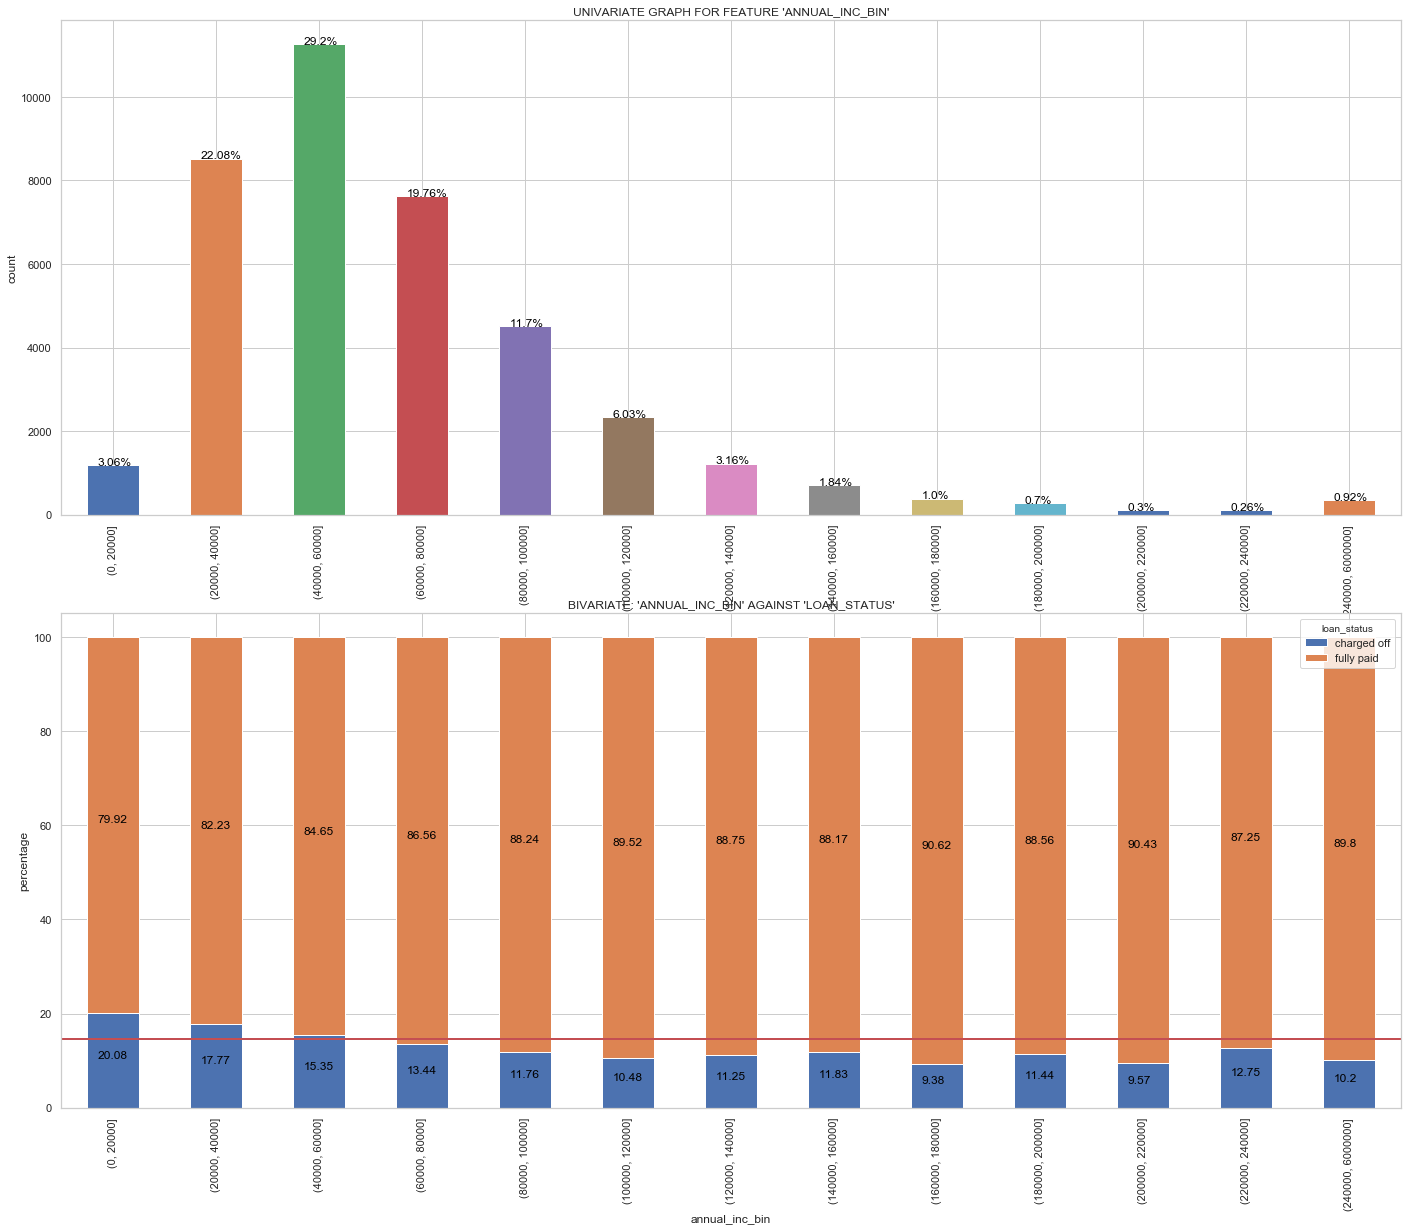

In [114]:
# Let's try on original dataframe also, and see whether the pattern is same or not.
# Anything beyond 260000 will be under outlier bin
bins = list(range(0, 260000, 20000))
bins.append(6000000)
create_bin_and_plot(Loan_Data, 'annual_inc', bins)

**pointbiserialr correlation**

Pointbiserial method is used to find the correlation between a continuous and a categorical variable. Pointbiserial will return a correlation between -1 to 1. Here we are more interested on absolute value as we just wanted to know how much it is correlated.

In [115]:
pbc = ss.pointbiserialr(Loan_Data['encoded_loan_status'], Loan_Data['annual_inc'])
pbc[0]

0.04086720371141273

**Observation**

It is clear from the plot that as income decreases charge off rate is also increases. The least income group has the high charge off rate.

Hence this can be considered as a potential driving factor.

<h3>11. VERIFICATION_STATUS </h3>

Indicates if income was verified by LC, not verified, or if the income source was verified


UNIVARIATE ANALYSIS FOR FEATURE 'VERIFICATION_STATUS', FREQUENCY IN COUNT AND %
------------------------------------------------------------------------------
loan_status          Count  Percentage
verification_status                   
Not Verified         16694       43.27
Source Verified       9677       25.08
Verified             12206       31.64


BIVARIATE ANALYSIS FOR FEATURE 'VERIFICATION_STATUS' WITH RESPECT TO 'LOAN_STATUS' IN COUNT AND %
------------------------------------------------------------------------------
                     charged off  fully paid  charged off %  fully paid %
verification_status                                                      
Not Verified                2142       14552          12.83         87.17
Source Verified             1434        8243          14.82         85.18
Verified                    2051       10155          16.80         83.20


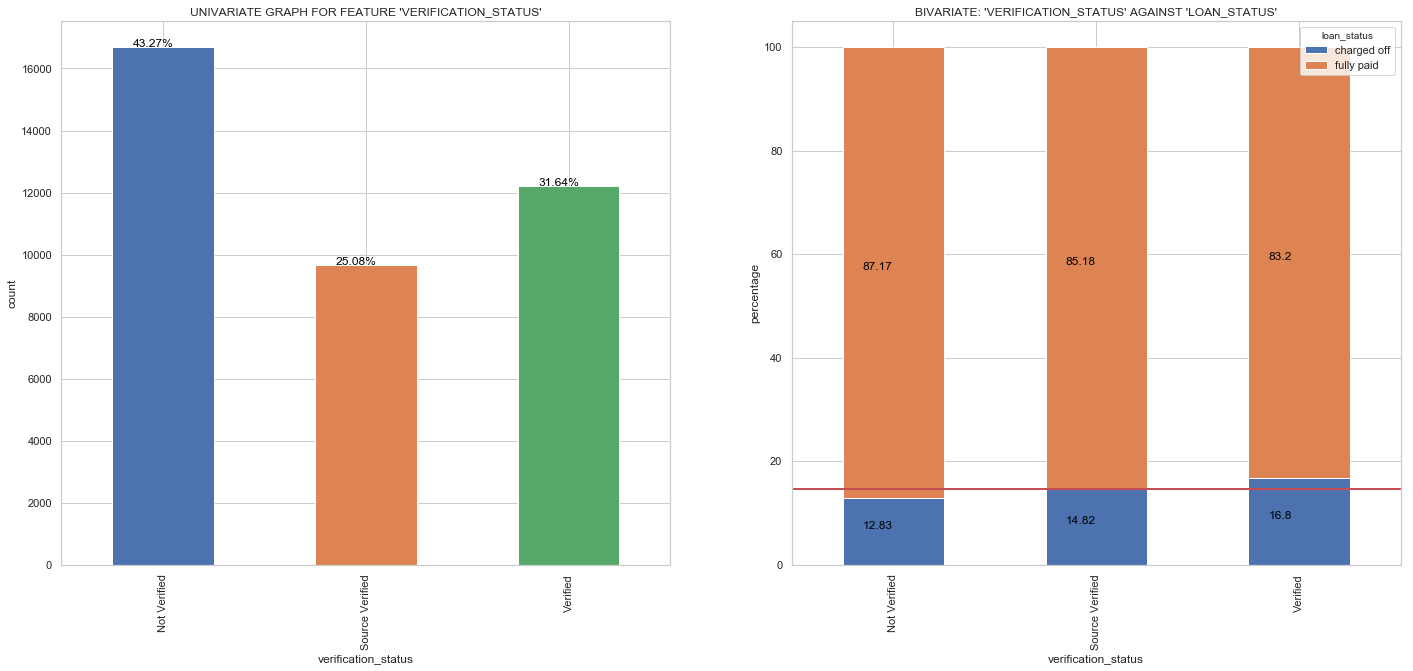

In [116]:
create_cross_tab_and_plot(Loan_Data, 'verification_status')

**Observation** - Surprising to note that verified loans got more charge off percentage. But overall charge off percentage is comparable across all categories, hence this cannot be considered as a driving factor.

<h3>12. PURPOSE </h3>

A category provided by the borrower for the loan request. 


UNIVARIATE ANALYSIS FOR FEATURE 'PURPOSE', FREQUENCY IN COUNT AND %
------------------------------------------------------------------------------
loan_status         Count  Percentage
purpose                              
car                  1499        3.89
credit_card          5027       13.03
debt_consolidation  18055       46.80
educational           325        0.84
home_improvement     2875        7.45
house                 367        0.95
major_purchase       2150        5.57
medical               681        1.77
moving                576        1.49
other                3865       10.02
renewable_energy      102        0.26
small_business       1754        4.55
vacation              375        0.97
wedding               926        2.40


BIVARIATE ANALYSIS FOR FEATURE 'PURPOSE' WITH RESPECT TO 'LOAN_STATUS' IN COUNT AND %
------------------------------------------------------------------------------
                    charged off  fully paid  charged off %  fully paid %
purp

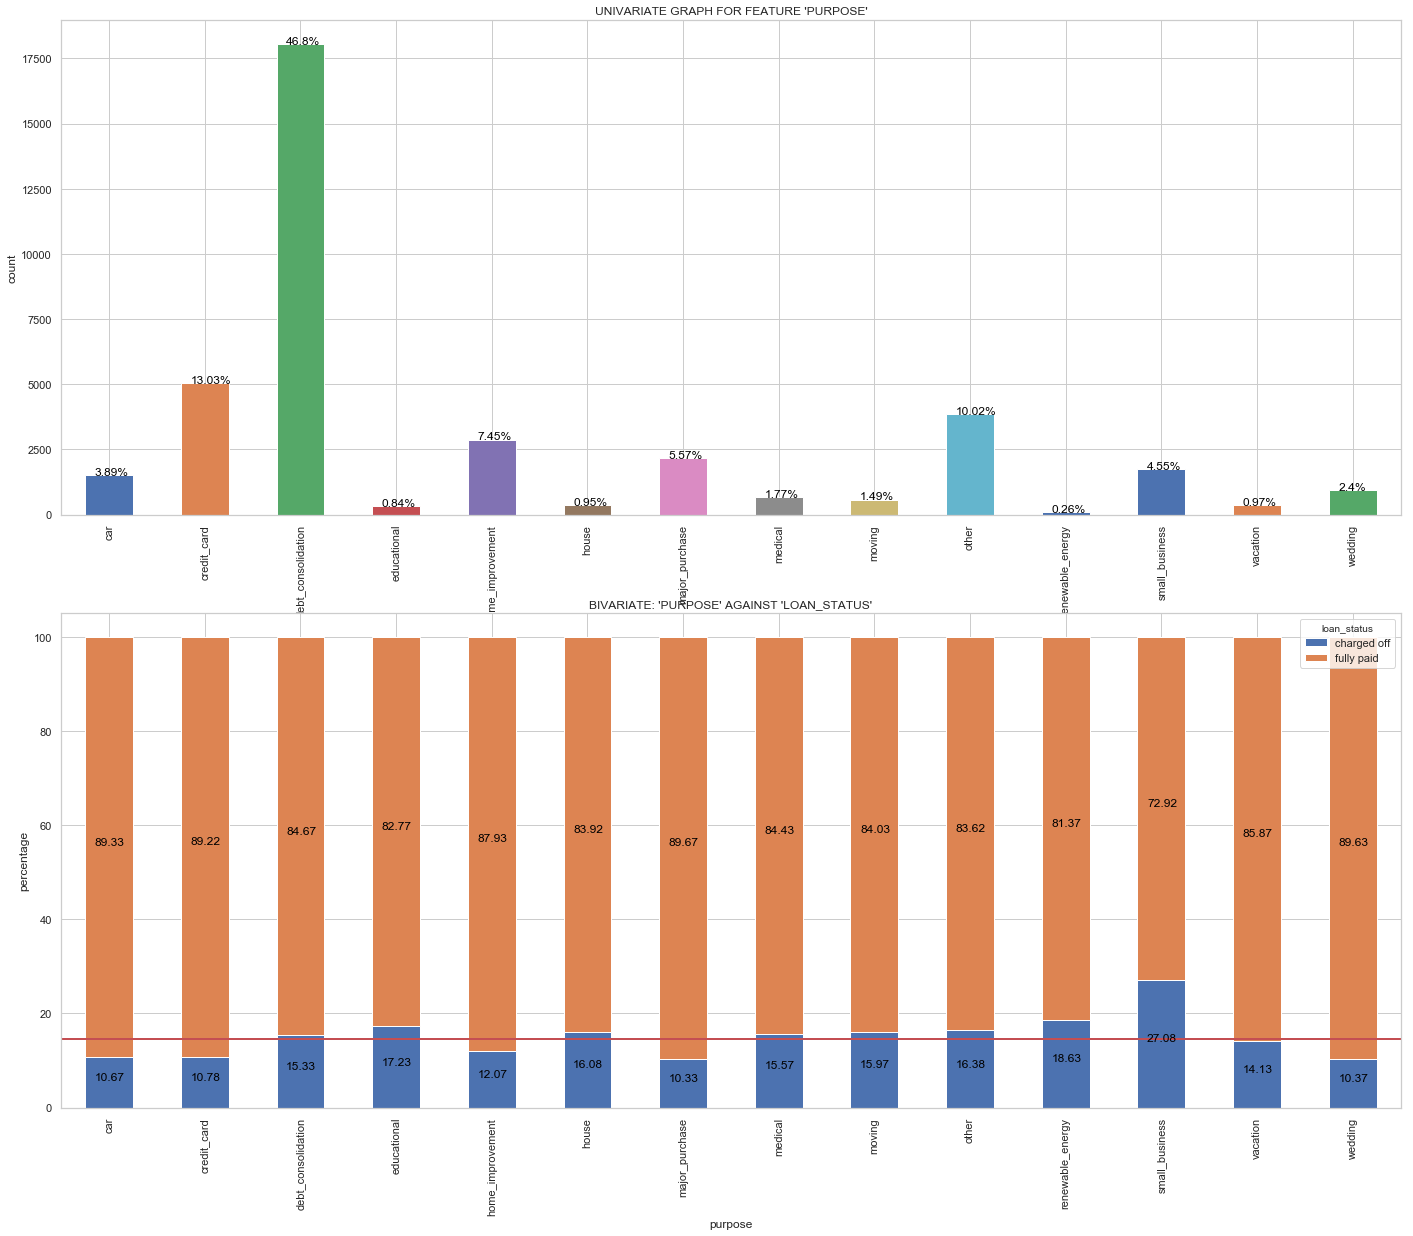

In [117]:
create_cross_tab_and_plot(Loan_Data, 'purpose')

**Observation**:
    
Univariate analyisis shows following are top 3 loan purpose:
    1. debt_consolidation - 46.80%
    2. credit_card        - 13.03%
    3. other              - 10.02%

Bivariate analysis shows following loans has most default rates above average default rate:
    1. small_business     - 27.08%
    2. renewable_energy   - 18.63%
    3. educational        - 17.23%
    4. other              - 16.38%
    5. house              - 16.08%
    6. moving             - 15.97%
    7. medical            - 15.57% 
   

<h3>13. REVOL_BAL</h3>

Total credit revolving balance.

UNIVARIATE MATRICES FOR THE FEATURE 'REVOL_BAL'
-----------------------------------------------------------
count    38577.00
mean     13289.49
std      15866.49
min          0.00
25%       3650.00
50%       8762.00
75%      16912.00
max     149588.00
Name: revol_bal, dtype: float64


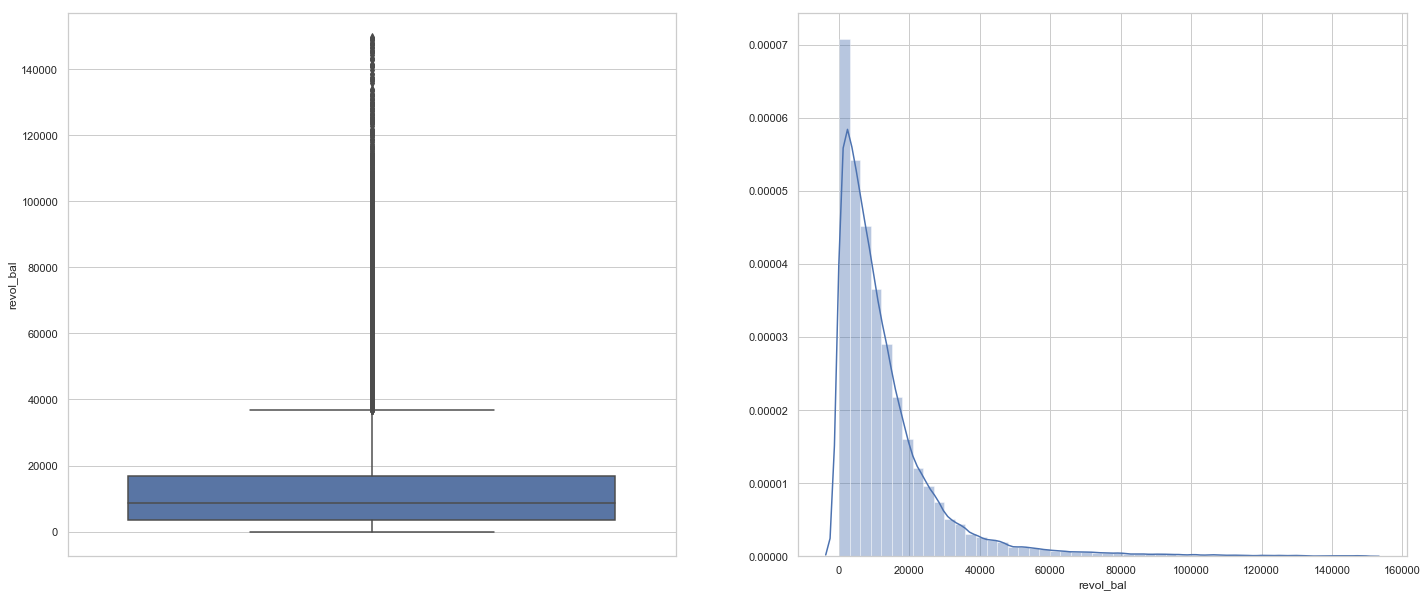

In [118]:
perform_continuous_univariate_and_plot(Loan_Data, 'revol_bal')

In [119]:
# calculate summary statistics
data_mean, data_std = (Loan_Data.revol_bal.mean()), (Loan_Data.revol_bal.std())
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
print(lower, upper)

-34309.98689702904 60888.96654811647


UNIVARIATE MATRICES FOR THE FEATURE 'REVOL_BAL'
-----------------------------------------------------------
count   37731.00
mean    11640.46
std     11068.54
min         0.00
25%      3552.50
50%      8511.00
75%     16159.00
max     60874.00
Name: revol_bal, dtype: float64


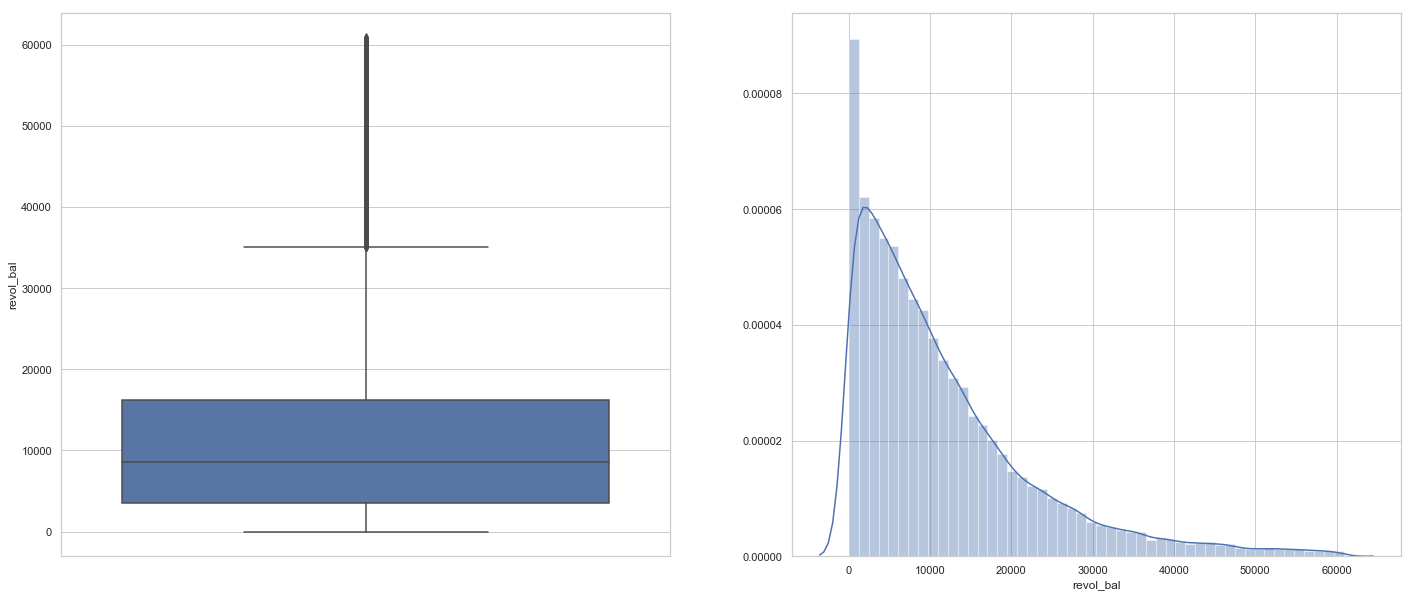

In [120]:
Loan_data_clean = Loan_Data[Loan_Data.revol_bal < upper]
perform_continuous_univariate_and_plot(Loan_data_clean, 'revol_bal')



SEGMENTED UNIVARIATE MATRICES FOR FEATURE 'REVOL_BAL'
-----------------------------------------------------------
               count     mean      std  min     25%     50%      75%      max
loan_status                                                                  
charged off  5526.00 12185.77 11311.54 0.00 3921.50 8991.50 16891.00 60874.00
fully paid  32205.00 11546.89 11023.78 0.00 3489.00 8414.00 16030.00 60789.00


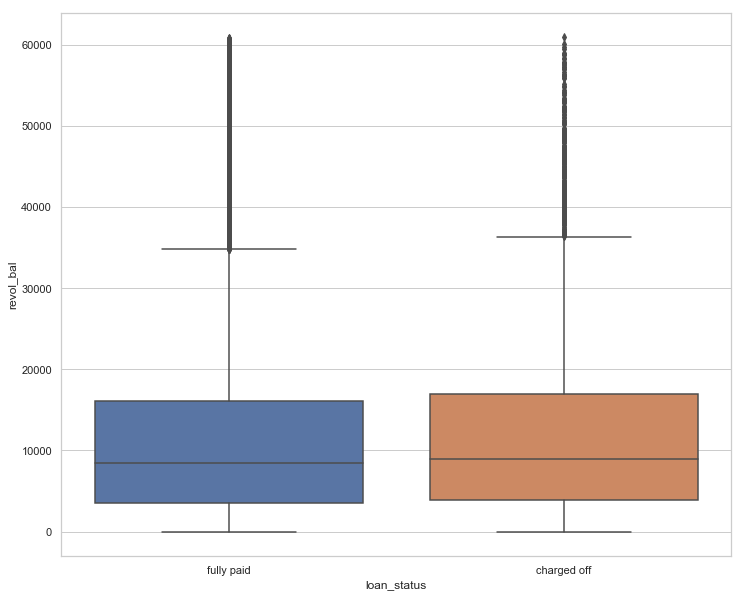

In [121]:
create_segmented_univariate_plot(Loan_data_clean, 'revol_bal', 'loan_status')

**Observation** - Segmented univariate analysis shows there is not much difference in the revolving balance of  charged off loans when compared with revolving rate of the loans which are fully paid.

**pointbiserialr correlation**

Pointbiserial method is used to find the correlation between a continuous and a categorical variable. Pointbiserial will return a correlation between -1 to 1. Here we are more interested on absolute value as we just wanted to know how much it is correlated.

In [122]:
pbc = ss.pointbiserialr(Loan_Data['encoded_loan_status'], Loan_Data['revol_bal'])
pbc[0]

-0.005853862774978677

This also shows there is no correlation between loan status and tevolving balance

**Let's try outlier treatment through binning process**


UNIVARIATE ANALYSIS FOR FEATURE 'REVOL_BAL_BIN', FREQUENCY IN COUNT AND %
------------------------------------------------------------------------------
loan_status      Count  Percentage
revol_bal_bin                     
(-1, 5000]       12440       32.25
(5000, 10000]     8771       22.74
(10000, 20000]    9889       25.63
(20000, 200000]   7477       19.38


BIVARIATE ANALYSIS FOR FEATURE 'REVOL_BAL_BIN' WITH RESPECT TO 'LOAN_STATUS' IN COUNT AND %
------------------------------------------------------------------------------
                 charged off  fully paid  charged off %  fully paid %
revol_bal_bin                                                        
(-1, 5000]              1694       10746          13.62         86.38
(5000, 10000]           1295        7476          14.76         85.24
(10000, 20000]          1480        8409          14.97         85.03
(20000, 200000]         1158        6319          15.49         84.51


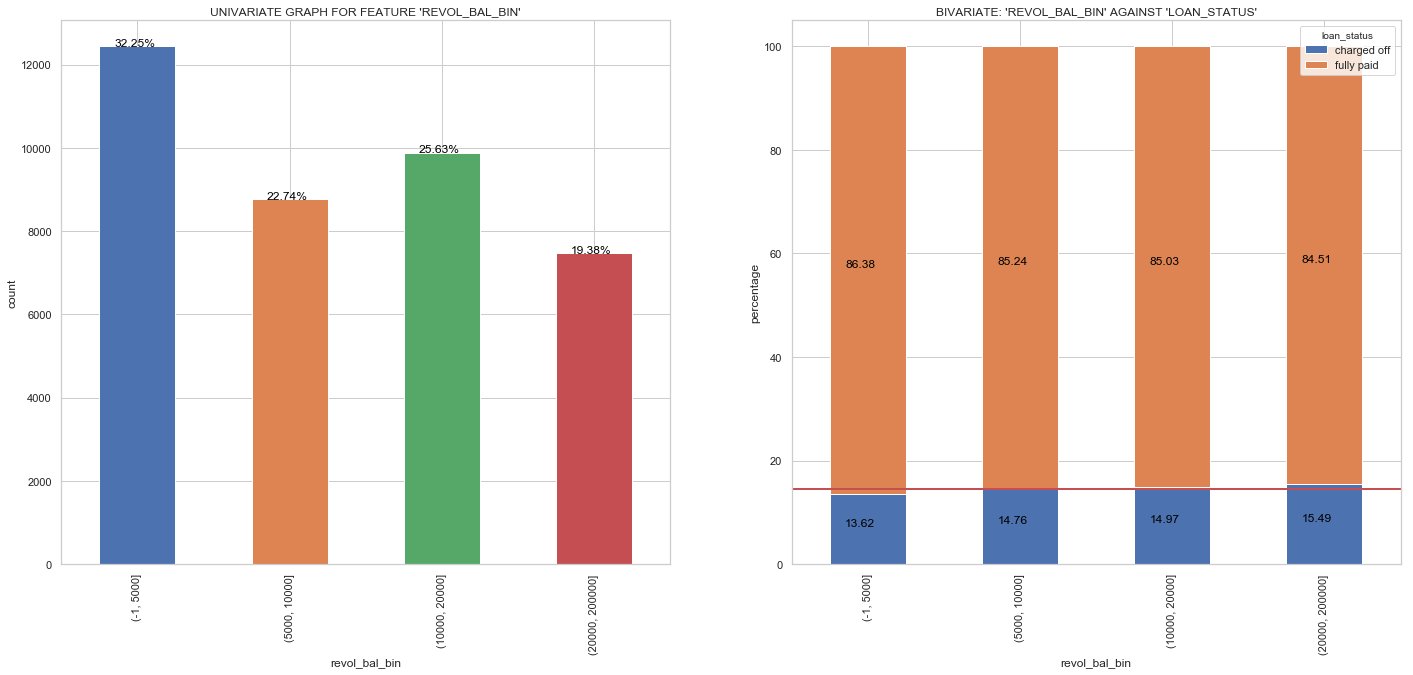

In [123]:
create_bin_and_plot(Loan_Data, 'revol_bal', [-1, 5000, 10000, 20000, 200000])

**Observation** - Since all the analysis shows revolving balance has not much impact on the loan status, we wont consider it as a potential driving factor.

<h3>14. REVOL_UTIL</h3>

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

UNIVARIATE MATRICES FOR THE FEATURE 'REVOL_UTIL'
-----------------------------------------------------------
count   38577.00
mean       48.64
std        28.40
min         0.00
25%        25.10
50%        49.00
75%        72.20
max        99.90
Name: revol_util, dtype: float64


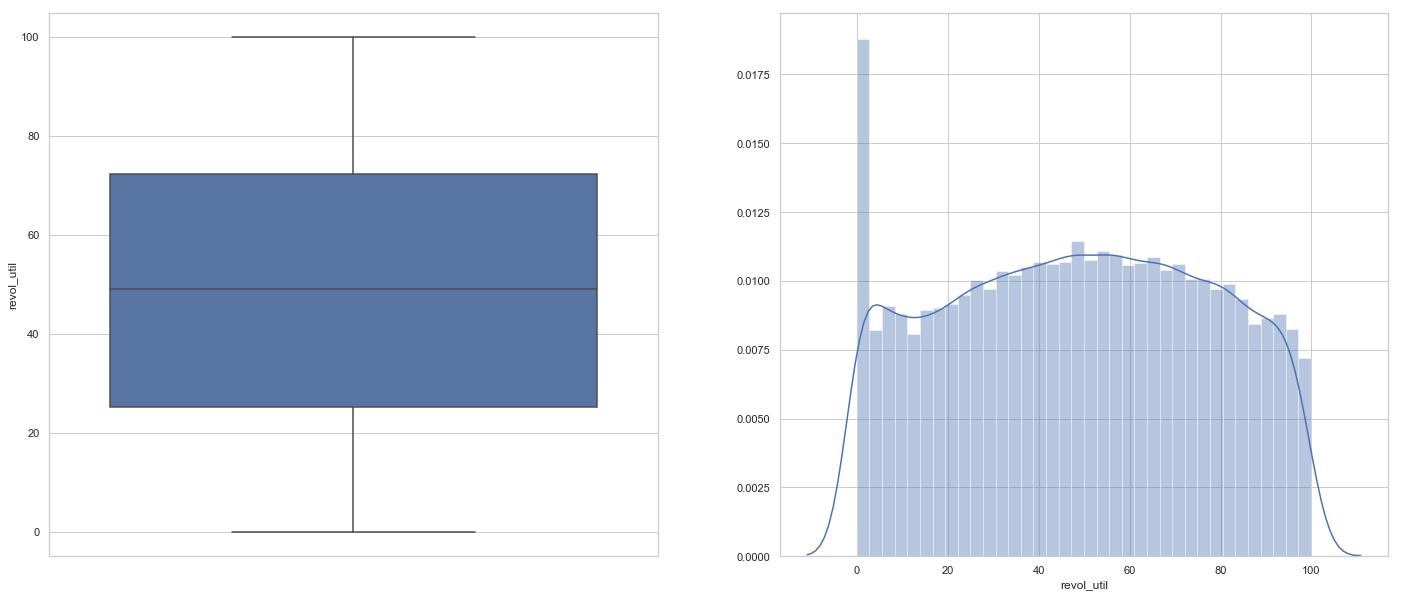

In [124]:
perform_continuous_univariate_and_plot(Loan_Data, 'revol_util')

**Observation** - It indicates that most people have 0% utilization which is good. But only 25 percentile are below 25.10 revolving utilization. Others are having higher value, credit companies consider 10%, or lower, being ideal for most consumers. . 



SEGMENTED UNIVARIATE MATRICES FOR FEATURE 'REVOL_UTIL'
-----------------------------------------------------------
               count  mean   std  min   25%   50%   75%   max
loan_status                                                  
charged off  5526.00 55.32 28.04 0.00 34.12 58.10 78.80 99.90
fully paid  32205.00 47.23 28.27 0.00 23.60 47.20 70.40 99.90


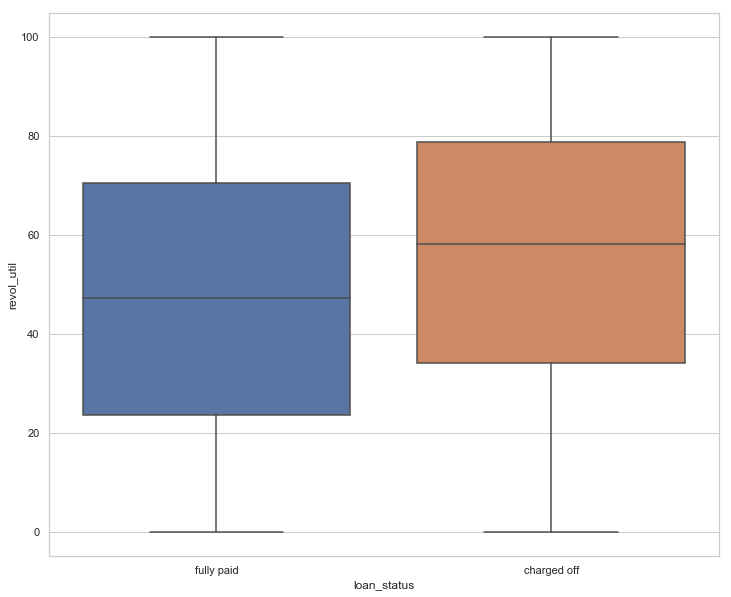

In [125]:
create_segmented_univariate_plot(Loan_data_clean, 'revol_util', 'loan_status')

**Observation** - As expected the segmented analysis shows that the charge off group has higher revol_util compared to fully paid group.

**pointbiserialr correlation**

Pointbiserial method is used to find the correlation between a continuous and a categorical variable. Pointbiserial will return a correlation between -1 to 1. Here we are more interested on absolute value as we just wanted to know how much it is correlated.

In [126]:
pbc = ss.pointbiserialr(Loan_Data['encoded_loan_status'], Loan_Data['revol_util'])
pbc[0]

-0.0985744865779914

**Let's analyse through binning**

Please note that we have interval defined as left open (], hence to include 0 giving the bin start as -1. Also we are dividing it equally into 5 groups as all group has almost similar count.


UNIVARIATE ANALYSIS FOR FEATURE 'REVOL_UTIL_BIN', FREQUENCY IN COUNT AND %
------------------------------------------------------------------------------
loan_status     Count  Percentage
revol_util_bin                   
(-1, 20]         7810       20.25
(20, 40]         7705       19.97
(40, 60]         8408       21.80
(60, 80]         8014       20.77
(80, 100]        6640       17.21


BIVARIATE ANALYSIS FOR FEATURE 'REVOL_UTIL_BIN' WITH RESPECT TO 'LOAN_STATUS' IN COUNT AND %
------------------------------------------------------------------------------
                charged off  fully paid  charged off %  fully paid %
revol_util_bin                                                      
(-1, 20]                786        7024          10.06         89.94
(20, 40]                915        6790          11.88         88.12
(40, 60]               1236        7172          14.70         85.30
(60, 80]               1356        6658          16.92         83.08
(80, 100]          

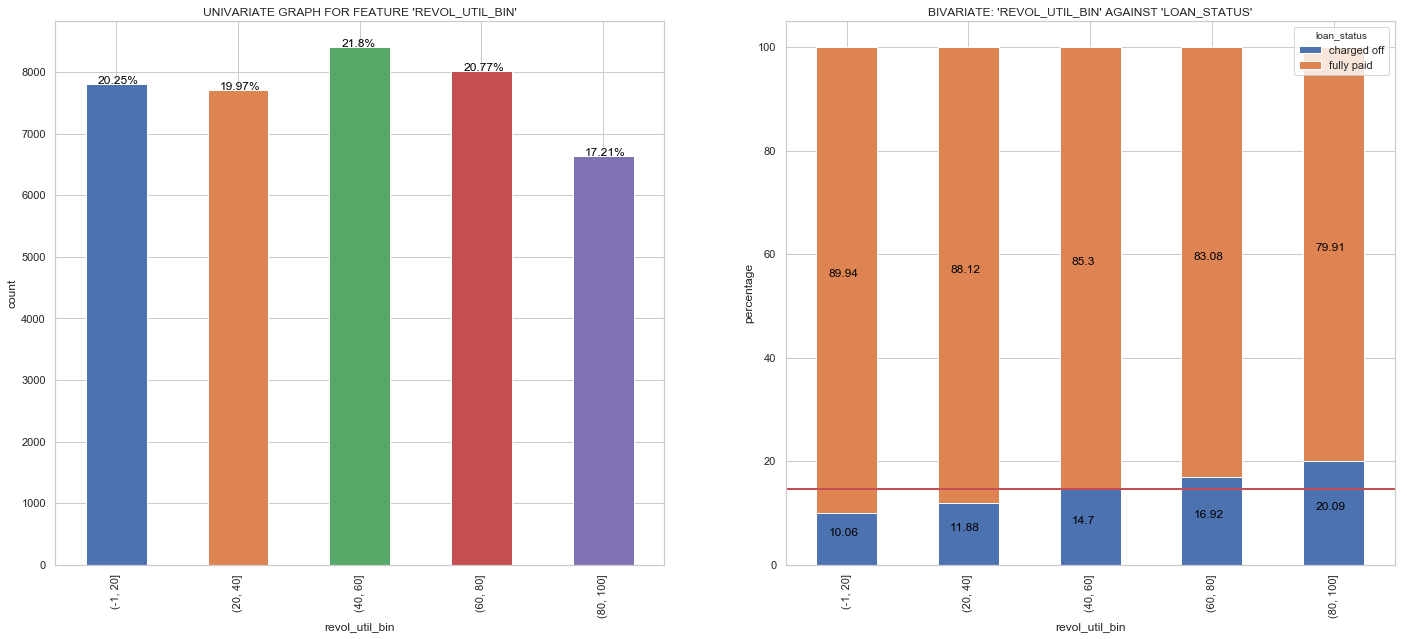

In [127]:
create_bin_and_plot(Loan_Data, 'revol_util', [-1, 20, 40, 60, 80, 100])

**Observation** - As revol_util increases the charge off % also increases monotonically. Hence this feature can be considered as one of the driving feature.

<h3>15. ADDR_STATE</h3>

Let us now see the user demography has anything to do with  loan status


UNIVARIATE ANALYSIS FOR FEATURE 'ADDR_STATE', FREQUENCY IN COUNT AND %
------------------------------------------------------------------------------
loan_status  Count  Percentage
addr_state                    
AK              78        0.20
AL             435        1.13
AR             235        0.61
AZ             849        2.20
CA            6949       18.01
CO             766        1.99
CT             726        1.88
DC             211        0.55
DE             113        0.29
FL            2781        7.21
GA            1359        3.52
HI             166        0.43
IA               5        0.01
ID               6        0.02
IL            1478        3.83
IN               9        0.02
KS             255        0.66
KY             311        0.81
LA             427        1.11
MA            1297        3.36
MD            1023        2.65
ME               3        0.01
MI             704        1.82
MN             605        1.57
MO             670        1.74
MS          

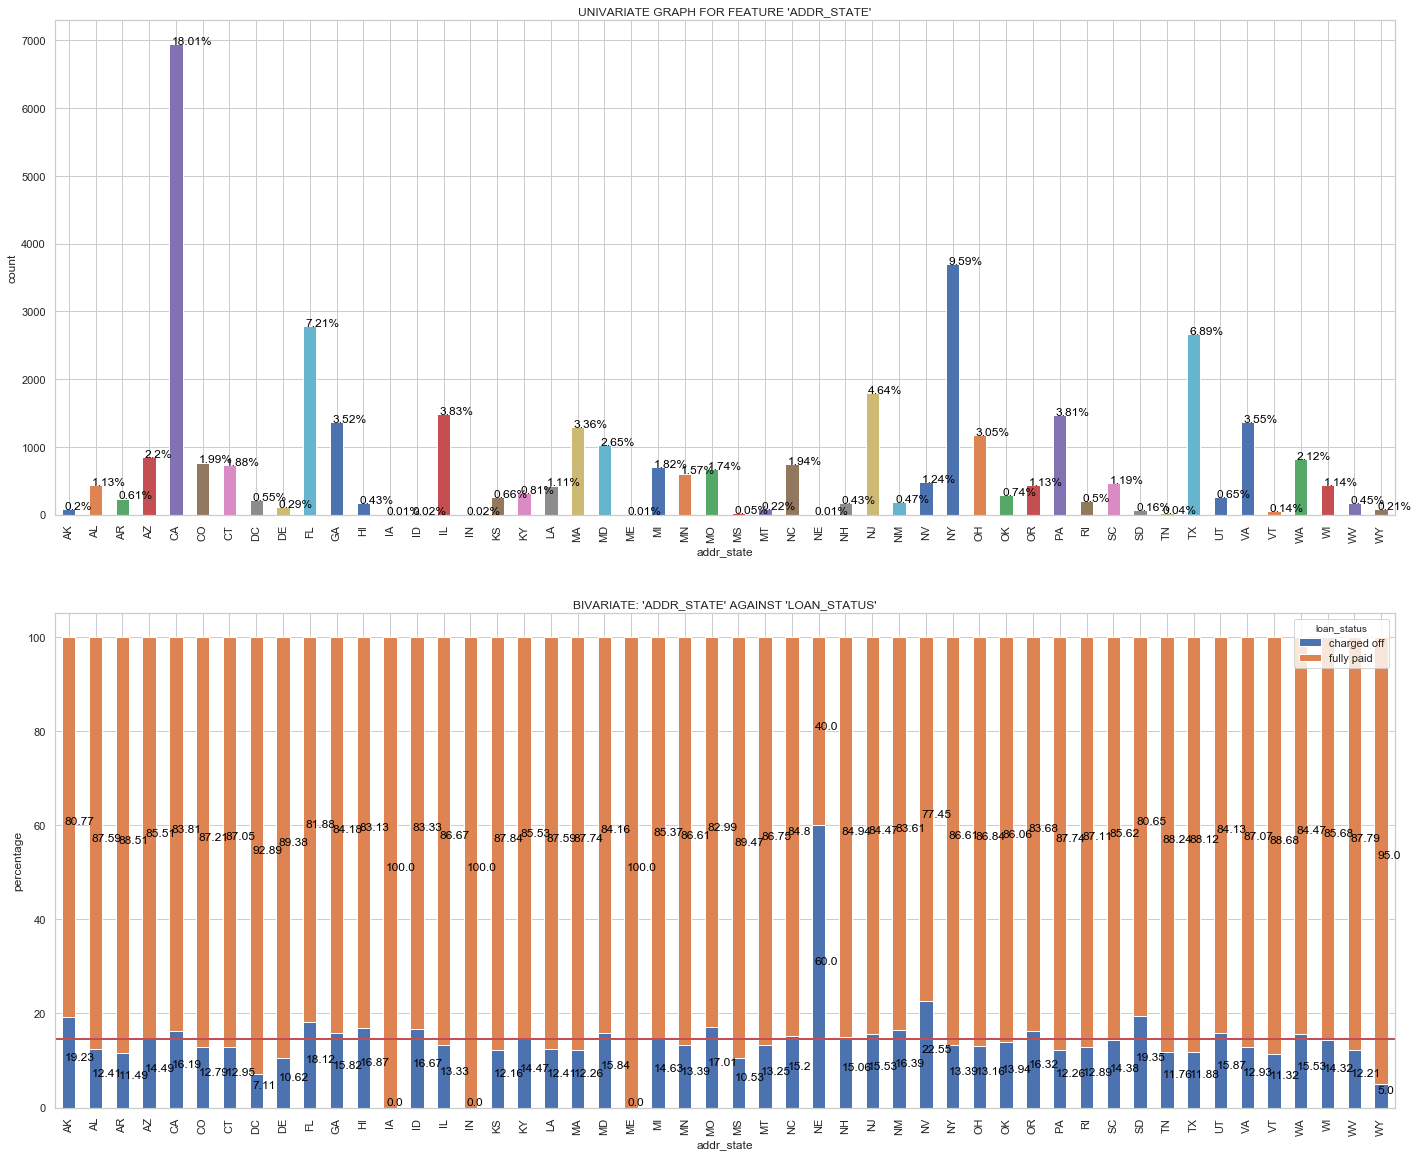

In [128]:
create_cross_tab_and_plot(Loan_Data, 'addr_state')

**Observation**

Most loans are issued in the state of CA - CALIFORNIA.

Most defaults are observed in the state of NE  - NEVADA.

<h3>16. DTI</h3>

A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

**Univariate Analysis**

UNIVARIATE MATRICES FOR THE FEATURE 'DTI'
-----------------------------------------------------------
count   38577.00
mean       13.27
std         6.67
min         0.00
25%         8.13
50%        13.37
75%        18.56
max        29.99
Name: dti, dtype: float64


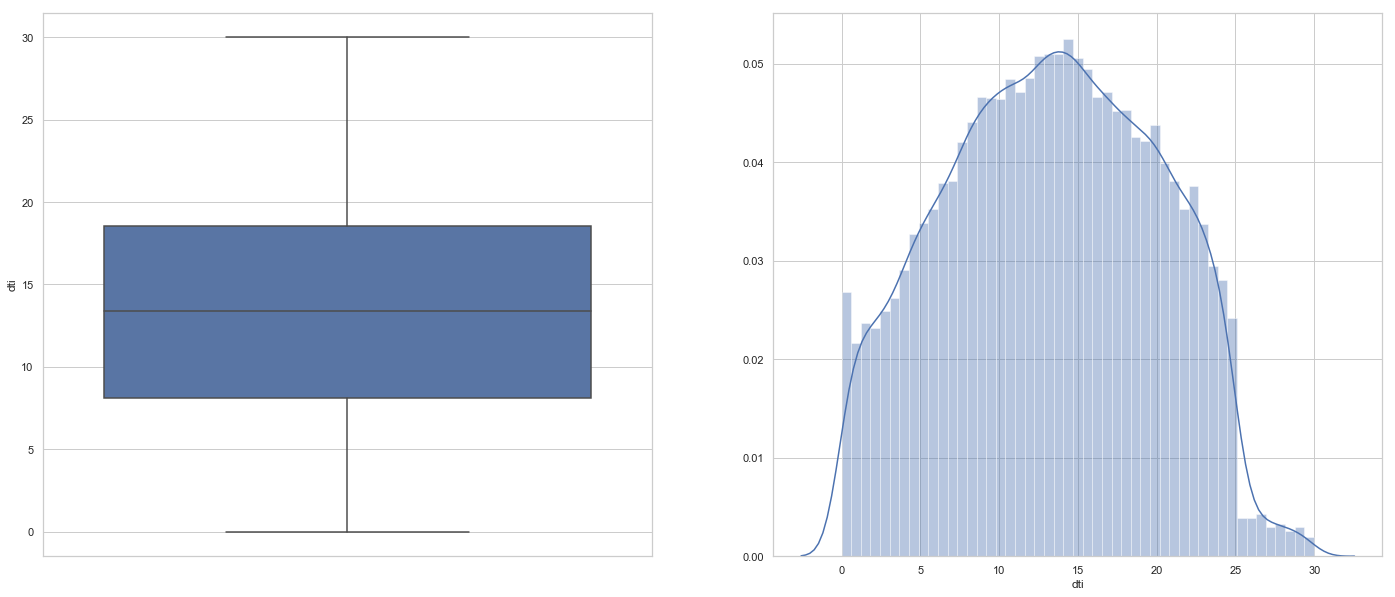

In [129]:
perform_continuous_univariate_and_plot(Loan_Data, 'dti')

Univariate analysis shows that dti for the group is less than or equal to 30. But one catch is this is without including this loan and mortgage.

**Segmented Univariate Analysis**



SEGMENTED UNIVARIATE MATRICES FOR FEATURE 'DTI'
-----------------------------------------------------------
               count  mean  std  min  25%   50%   75%   max
loan_status                                                
charged off  5627.00 14.00 6.59 0.00 9.05 14.29 19.29 29.85
fully paid  32950.00 13.15 6.68 0.00 7.98 13.20 18.39 29.99


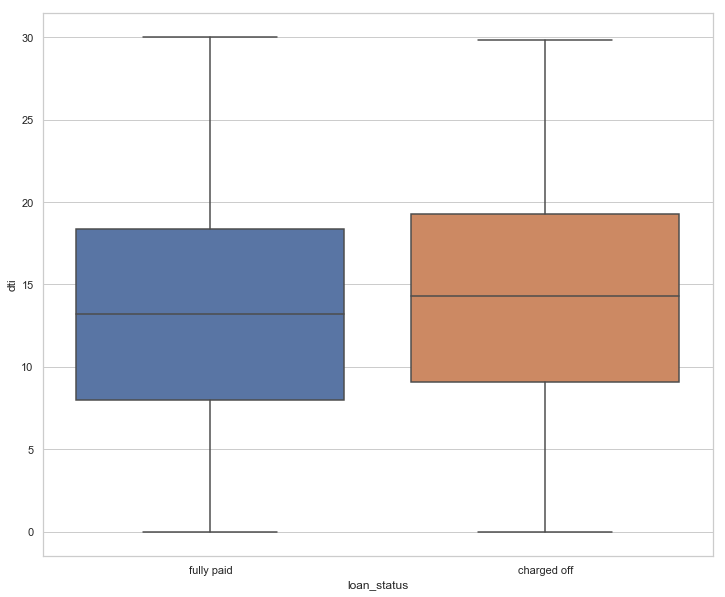

In [130]:
create_segmented_univariate_plot(Loan_Data, 'dti', 'loan_status')

**Observation**:
    
It is observed that DTI values (25%, 50%, 75%) are on higher side for charged off loans

**pointbiserialr correlation**

Pointbiserial method is used to find the correlation between a continuous and a categorical variable. Pointbiserial will return a correlation between -1 to 1. Here we are more interested on absolute value as we just wanted to know how much it is correlated.

In [131]:
pbc = ss.pointbiserialr(Loan_Data['encoded_loan_status'], Loan_Data['dti'])
pbc[0]

-0.04507774248623204

This also indicates there is not much impact due to dti

**Let's convert it to categorical through binning and perform bivariate and univariate analysis:**


UNIVARIATE ANALYSIS FOR FEATURE 'DTI_BIN', FREQUENCY IN COUNT AND %
------------------------------------------------------------------------------
loan_status  Count  Percentage
dti_bin                       
(-1, 6]       6408       16.61
(6, 12]      10252       26.58
(12, 18]     11348       29.42
(18, 24]      8895       23.06
(24, 30]      1674        4.34


BIVARIATE ANALYSIS FOR FEATURE 'DTI_BIN' WITH RESPECT TO 'LOAN_STATUS' IN COUNT AND %
------------------------------------------------------------------------------
          charged off  fully paid  charged off %  fully paid %
dti_bin                                                       
(-1, 6]           776        5632          12.11         87.89
(6, 12]          1358        8894          13.25         86.75
(12, 18]         1730        9618          15.24         84.76
(18, 24]         1500        7395          16.86         83.14
(24, 30]          263        1411          15.71         84.29


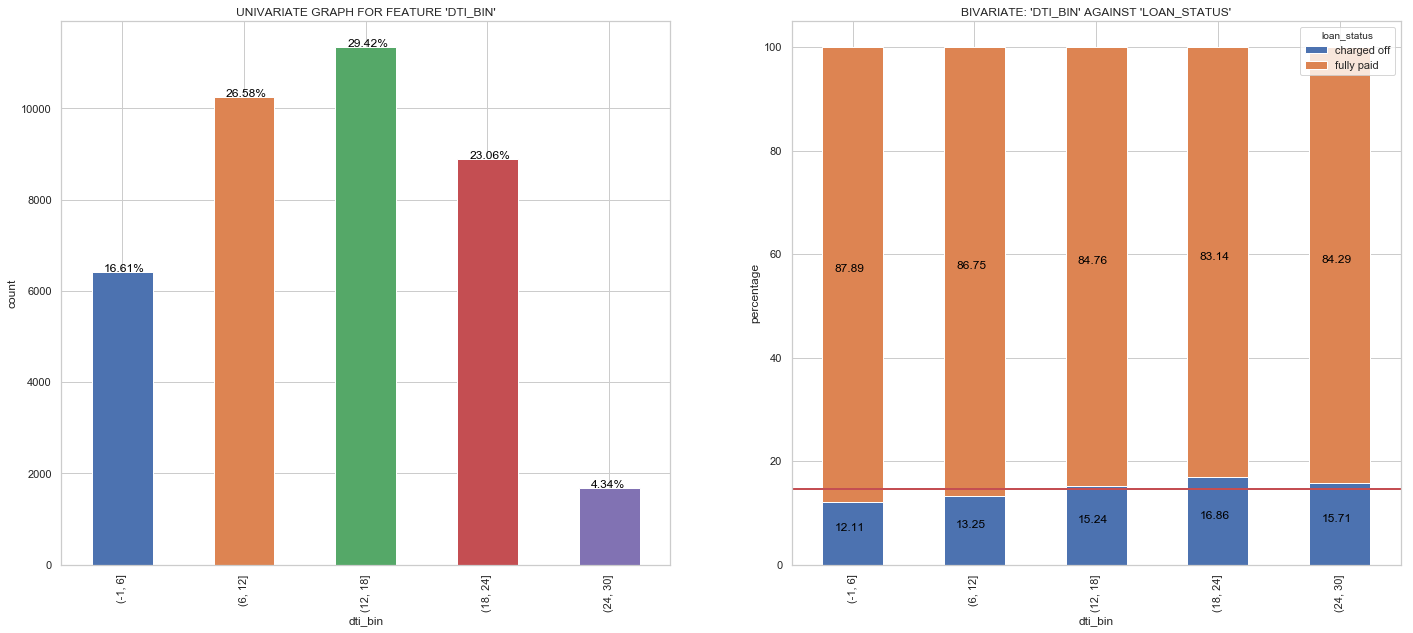

In [132]:
create_bin_and_plot(Loan_Data, 'dti', [-1, 6, 12, 18, 24, 30])

**Observation** - But the bivariate analysis through binning shows there is only a slight increase in the charge off rate as dti increases. So this feature cannot be considered as a driving feature.

<h3>17. DELINQ_2YRS</h3>

The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years. 

A lender will report a loan delinquency to credit reporting agencies, or "credit bureaus". Hence this detail is verymuch available at the time of loan approval.

We will see thsi has any impact on loan status.


UNIVARIATE ANALYSIS FOR FEATURE 'DELINQ_2YRS', FREQUENCY IN COUNT AND %
------------------------------------------------------------------------------
loan_status  Count  Percentage
delinq_2yrs                   
0            34386       89.14
1             3207        8.31
2              673        1.74
3              212        0.55
4               60        0.16
5               21        0.05
6               10        0.03
7                4        0.01
8                2        0.01
9                1        0.00
11               1        0.00


BIVARIATE ANALYSIS FOR FEATURE 'DELINQ_2YRS' WITH RESPECT TO 'LOAN_STATUS' IN COUNT AND %
------------------------------------------------------------------------------
             charged off  fully paid  charged off %  fully paid %
delinq_2yrs                                                      
0                   4936       29450          14.35         85.65
1                    507        2700          15.81         84.19
2         

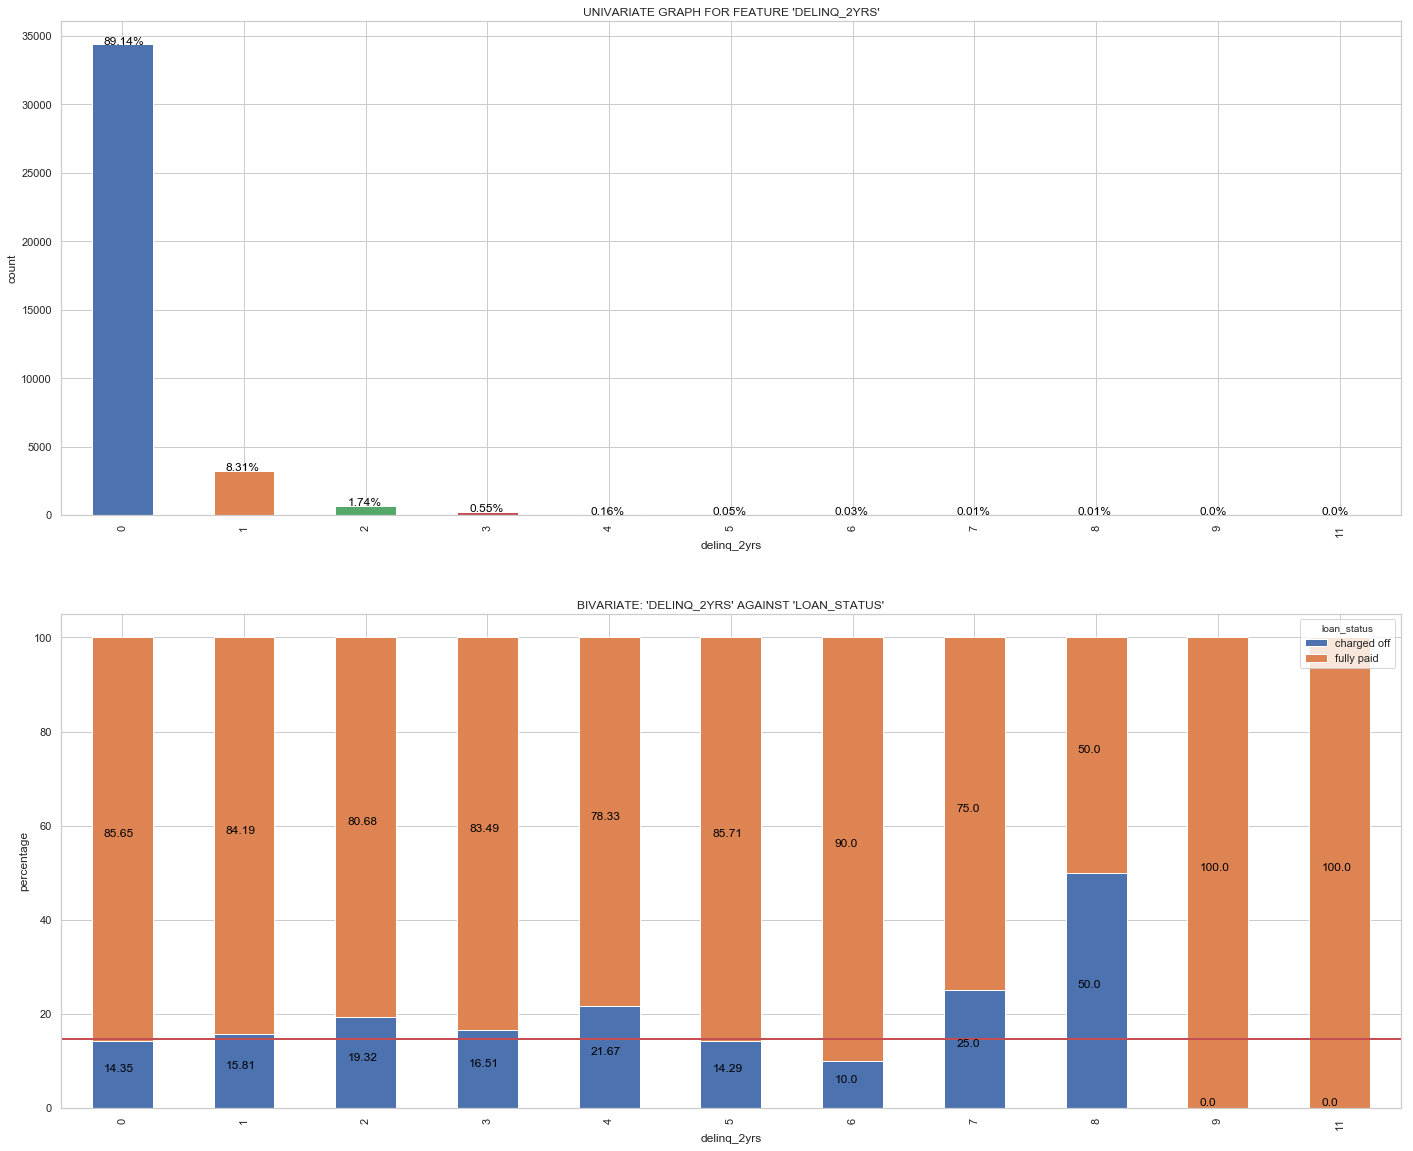

In [133]:
create_cross_tab_and_plot(Loan_Data, 'delinq_2yrs')

There is no linear relationship between charge off rate and delinq. So lets bin it and see, because there only very few loans beyond delinq value 2. Also we are using -1 as starting value for binning to include 0. The intervals are constructed left open and right closed (]


UNIVARIATE ANALYSIS FOR FEATURE 'DELINQ_2YRS_BIN', FREQUENCY IN COUNT AND %
------------------------------------------------------------------------------
loan_status      Count  Percentage
delinq_2yrs_bin                   
(-1, 0]          34386       89.14
(0, 1]            3207        8.31
(1, 2]             673        1.74
(2, 11]            311        0.81


BIVARIATE ANALYSIS FOR FEATURE 'DELINQ_2YRS_BIN' WITH RESPECT TO 'LOAN_STATUS' IN COUNT AND %
------------------------------------------------------------------------------
                 charged off  fully paid  charged off %  fully paid %
delinq_2yrs_bin                                                      
(-1, 0]                 4936       29450          14.35         85.65
(0, 1]                   507        2700          15.81         84.19
(1, 2]                   130         543          19.32         80.68
(2, 11]                   54         257          17.36         82.64


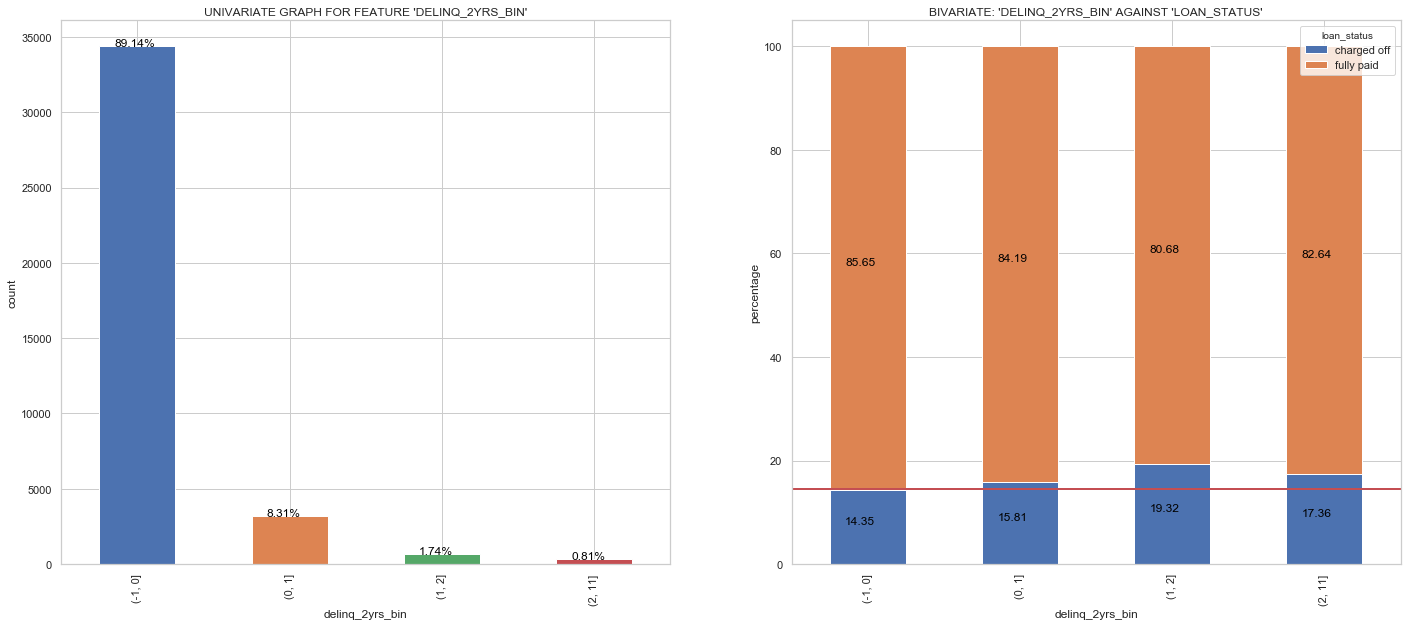

In [134]:
create_bin_and_plot(Loan_Data, 'delinq_2yrs', [-1,0, 1, 2, 11])

**Observation** - It is clear from the plots that there isnt much relationship etween delinq_2yrs feature and loan status.

<h3>18. EARLIEST_CREDITLINE</h3>

Credit score also takes into account how long you have been using credit. For how many years have you had obligations? How old is your oldest account and what is the average age of all your accounts?

A long credit history is helpful.

We have extracted the year field out of the data for analysis. This variable tells the date of earliest credit line

In [135]:
Loan_Data['earliest_cr_line'].dt.year.unique()

array([1985, 1999, 2001, 1996, 2004, 2005, 2007, 1998, 1989, 2003, 1991,
       1993, 1997, 1983, 2002, 1984, 2006, 1987, 1981, 2000, 1994, 1995,
       1992, 1986, 1990, 1988, 1980, 2008, 1979, 1978, 1971, 1972, 1970,
       1969, 1975, 1982, 1976, 1977, 2062, 1973, 2068, 1974, 2067, 2065,
       2063, 2054, 2066, 2064, 2059, 2056, 2046, 2050, 2061], dtype=int64)

In [136]:
Loan_Data['earliest_cr_year'] = Loan_Data['earliest_cr_line'].dt.year

There are a few year values which are higher that 2011. Looks to be some data quality issue. We can clean it by subtracting 100 if the year is greater than 2011

In [137]:
Loan_Data['earliest_cr_year'] = Loan_Data.earliest_cr_year.apply(lambda x: x- 100 if x > 2011 else x)

In [138]:
Loan_Data['earliest_cr_year'].describe()

count   38577.00
mean     1996.60
std         6.82
min      1946.00
25%      1993.00
50%      1998.00
75%      2001.00
max      2008.00
Name: earliest_cr_year, dtype: float64

**Let us bin it and analyse**

Please note that we are binning it as (1945-1980], (1980-1990], (1990-2000], (2000 - 2011]


UNIVARIATE ANALYSIS FOR FEATURE 'EARLIEST_CR_YEAR_BIN', FREQUENCY IN COUNT AND %
------------------------------------------------------------------------------
loan_status           Count  Percentage
earliest_cr_year_bin                   
(1945, 1980]           1167        3.03
(1980, 1990]           5168       13.40
(1990, 2000]          20878       54.12
(2000, 2011]          11364       29.46


BIVARIATE ANALYSIS FOR FEATURE 'EARLIEST_CR_YEAR_BIN' WITH RESPECT TO 'LOAN_STATUS' IN COUNT AND %
------------------------------------------------------------------------------
                      charged off  fully paid  charged off %  fully paid %
earliest_cr_year_bin                                                      
(1945, 1980]                  153        1014          13.11         86.89
(1980, 1990]                  693        4475          13.41         86.59
(1990, 2000]                 3081       17797          14.76         85.24
(2000, 2011]                 1700        966

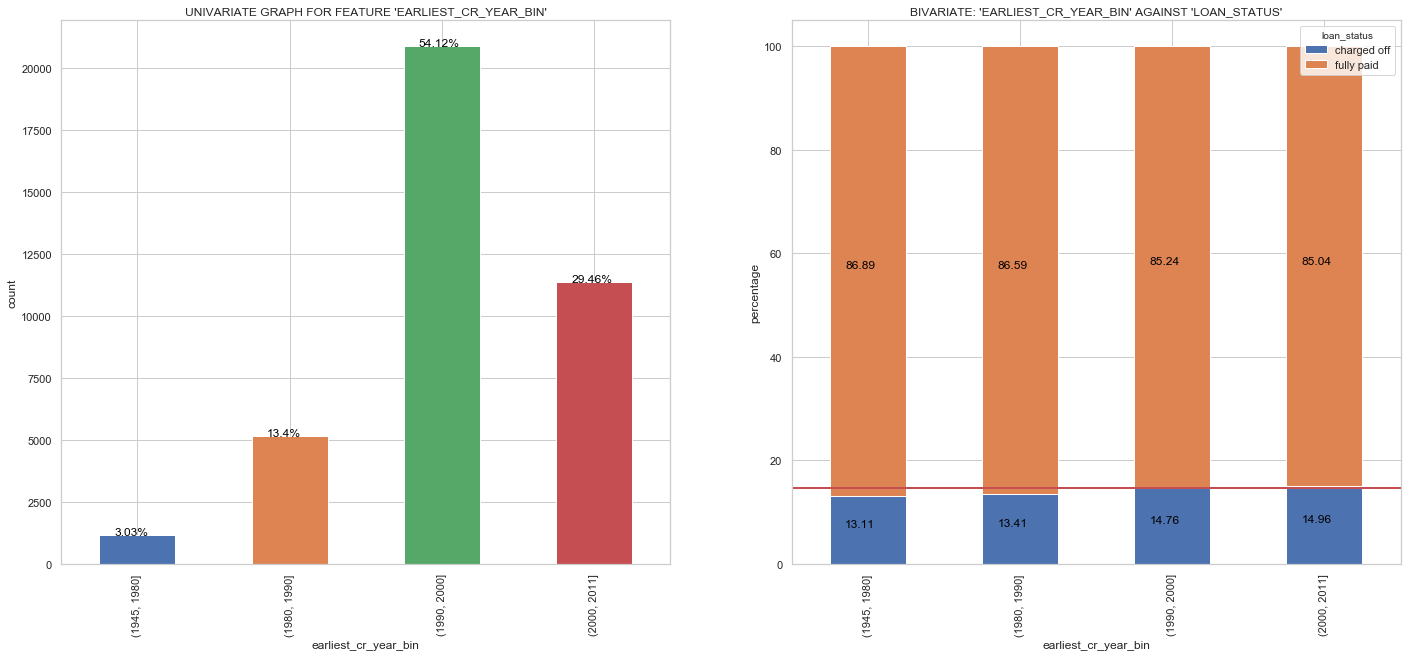

In [139]:
create_bin_and_plot(Loan_Data, 'earliest_cr_year', [1945,1980, 1990, 2000, 2011])

**Observation** - There isnt much difference in the charge off rate w.r.t earliest credit line 

<h3>19. INQ_LAST_6MTHS</h3>

The number of inquiries in past 6 months (excluding auto and mortgage inquiries)

Credit inquiries, which account for 10% of most credit scores, are generated whenever you apply for new loans, go to take out certain service contracts, pull your own credit reports etc. Too many “hard inquiries” will hurt your credit scores, since lenders view that as an early sign of risk. So this is an important feature to analyse.


UNIVARIATE ANALYSIS FOR FEATURE 'INQ_LAST_6MTHS', FREQUENCY IN COUNT AND %
------------------------------------------------------------------------------
loan_status     Count  Percentage
inq_last_6mths                   
0               18709       48.50
1               10660       27.63
2                5654       14.66
3                2983        7.73
4                 316        0.82
5                 144        0.37
6                  63        0.16
7                  34        0.09
8                  14        0.04


BIVARIATE ANALYSIS FOR FEATURE 'INQ_LAST_6MTHS' WITH RESPECT TO 'LOAN_STATUS' IN COUNT AND %
------------------------------------------------------------------------------
                charged off  fully paid  charged off %  fully paid %
inq_last_6mths                                                      
0                      2280       16429          12.19         87.81
1                      1677        8983          15.73         84.27
2                    

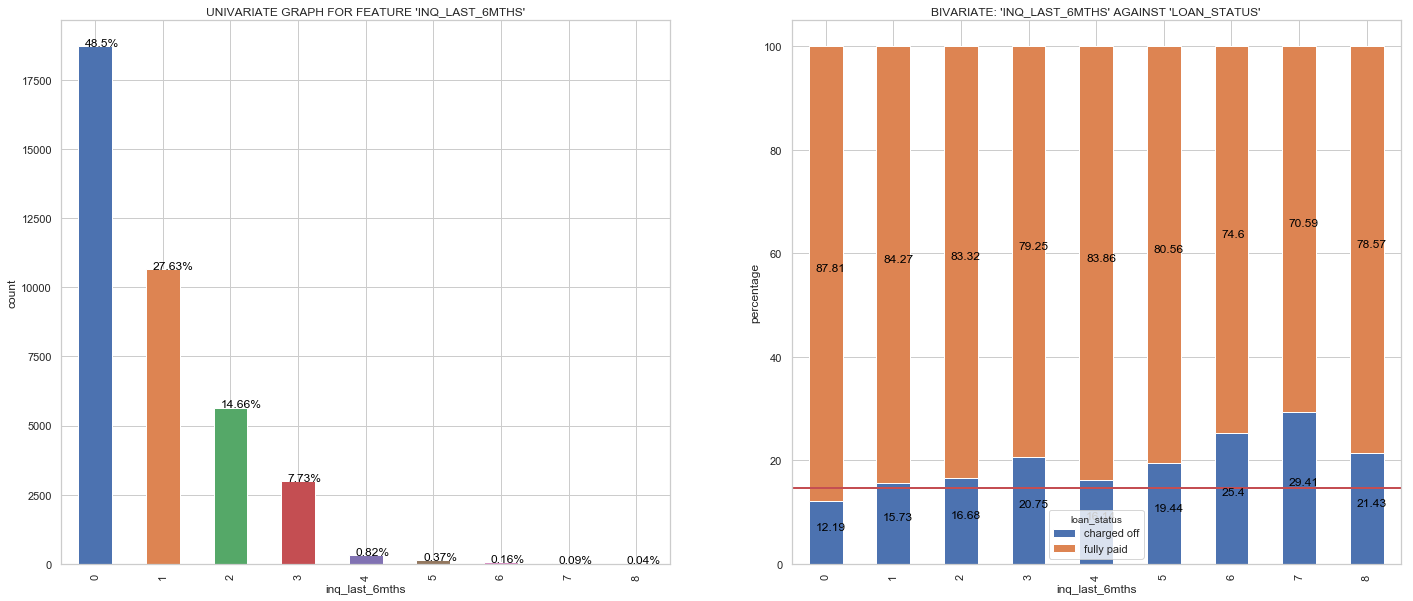

In [140]:
create_cross_tab_and_plot(Loan_Data, 'inq_last_6mths')

This shows that as inquiries count increases the charge off also increases. Inquiries more than 3 is very less in count, lets put all in one categoy and plot it


UNIVARIATE ANALYSIS FOR FEATURE 'INQ_LAST_6MTHS_BIN', FREQUENCY IN COUNT AND %
------------------------------------------------------------------------------
loan_status         Count  Percentage
inq_last_6mths_bin                   
(-1, 0]             18709       48.50
(0, 1]              10660       27.63
(1, 2]               5654       14.66
(2, 3]               2983        7.73
(3, 8]                571        1.48


BIVARIATE ANALYSIS FOR FEATURE 'INQ_LAST_6MTHS_BIN' WITH RESPECT TO 'LOAN_STATUS' IN COUNT AND %
------------------------------------------------------------------------------
                    charged off  fully paid  charged off %  fully paid %
inq_last_6mths_bin                                                      
(-1, 0]                    2280       16429          12.19         87.81
(0, 1]                     1677        8983          15.73         84.27
(1, 2]                      943        4711          16.68         83.32
(2, 3]                      619 

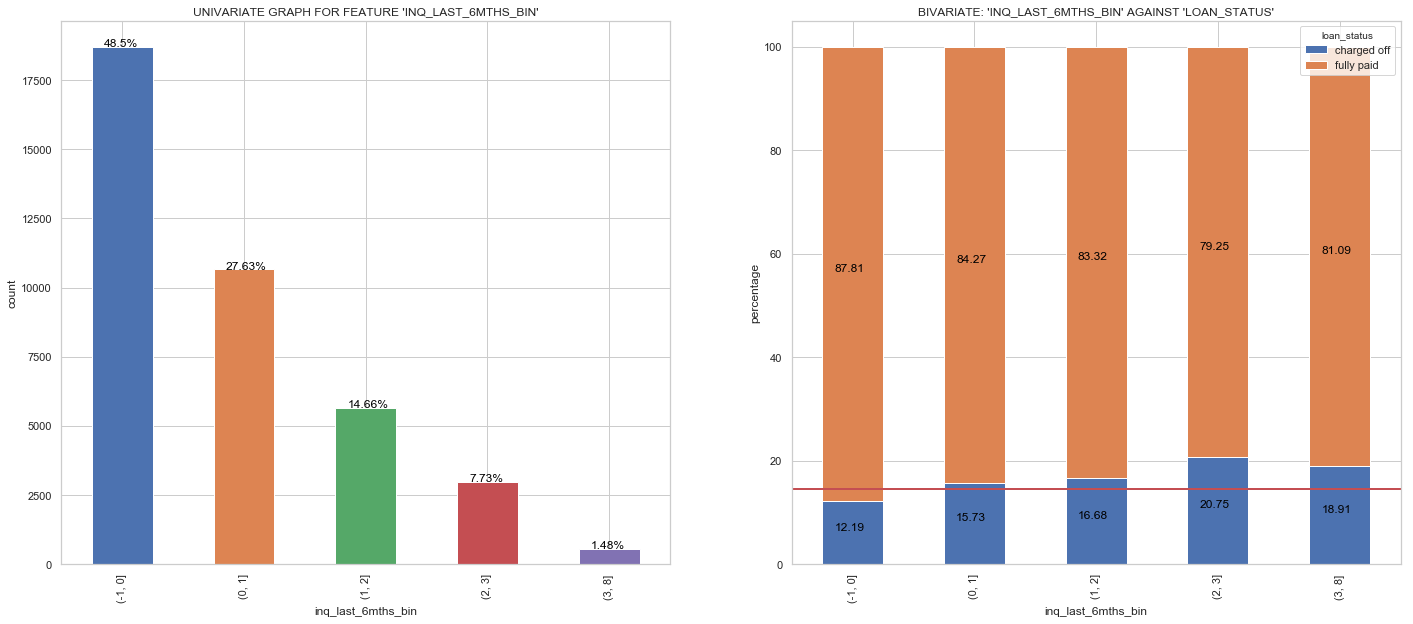

In [141]:
create_bin_and_plot(Loan_Data, 'inq_last_6mths', [-1,0, 1, 2,3, 8])

**Observation** - As number of enquiry increases, rate of charge off also increases.

<h3>20. OPEN_ACC</h3>

The number of open credit lines in the borrower's credit file.

The typical credit report will include personal identifying information: a list of credit accounts (including credit limit), so this information is available to the lender at the time of making decision. They can get this info through credit bearau. So the number of “Open and Active Trade Lines” seems to be the common denominator in most approvals.

UNIVARIATE MATRICES FOR THE FEATURE 'OPEN_ACC'
-----------------------------------------------------------
count   38577.00
mean        9.28
std         4.40
min         2.00
25%         6.00
50%         9.00
75%        12.00
max        44.00
Name: open_acc, dtype: float64


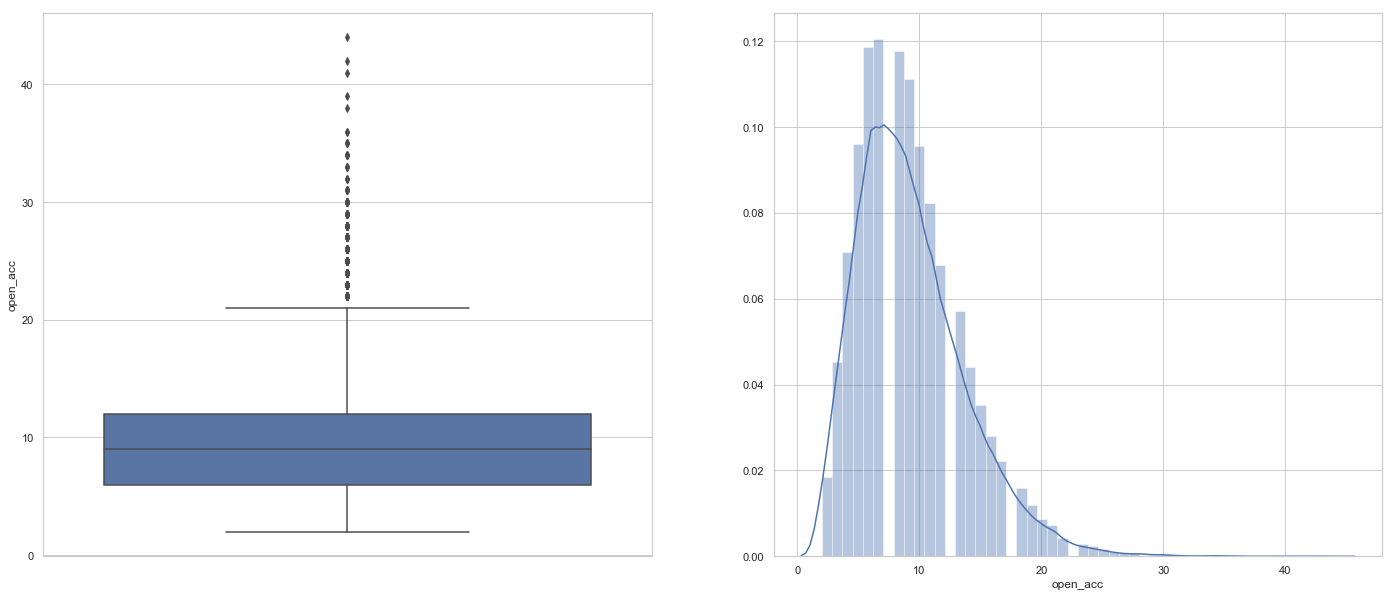

In [142]:
perform_continuous_univariate_and_plot(Loan_Data, 'open_acc')

As we can see in plot most are falling in the category of 0-10 open accounts

In [143]:
Loan_Data.open_acc.unique()

array([ 3,  2, 10,  9,  7,  4, 11, 14, 12, 20,  8,  6, 15, 17,  5, 13, 16,
       30, 21, 18, 19, 27, 23, 34, 25, 22, 24, 26, 32, 28, 29, 33, 31, 39,
       35, 36, 38, 44, 41, 42], dtype=int64)

**Lets bin it and analyse further.**
From the above distribution it will be better to in it as (0, 10], (10, 20], (20, 50]


UNIVARIATE ANALYSIS FOR FEATURE 'OPEN_ACC_BIN', FREQUENCY IN COUNT AND %
------------------------------------------------------------------------------
loan_status   Count  Percentage
open_acc_bin                   
(0, 10]       25750       66.75
(10, 20]      12097       31.36
(20, 50]        730        1.89


BIVARIATE ANALYSIS FOR FEATURE 'OPEN_ACC_BIN' WITH RESPECT TO 'LOAN_STATUS' IN COUNT AND %
------------------------------------------------------------------------------
              charged off  fully paid  charged off %  fully paid %
open_acc_bin                                                      
(0, 10]              3803       21947          14.77         85.23
(10, 20]             1707       10390          14.11         85.89
(20, 50]              117         613          16.03         83.97


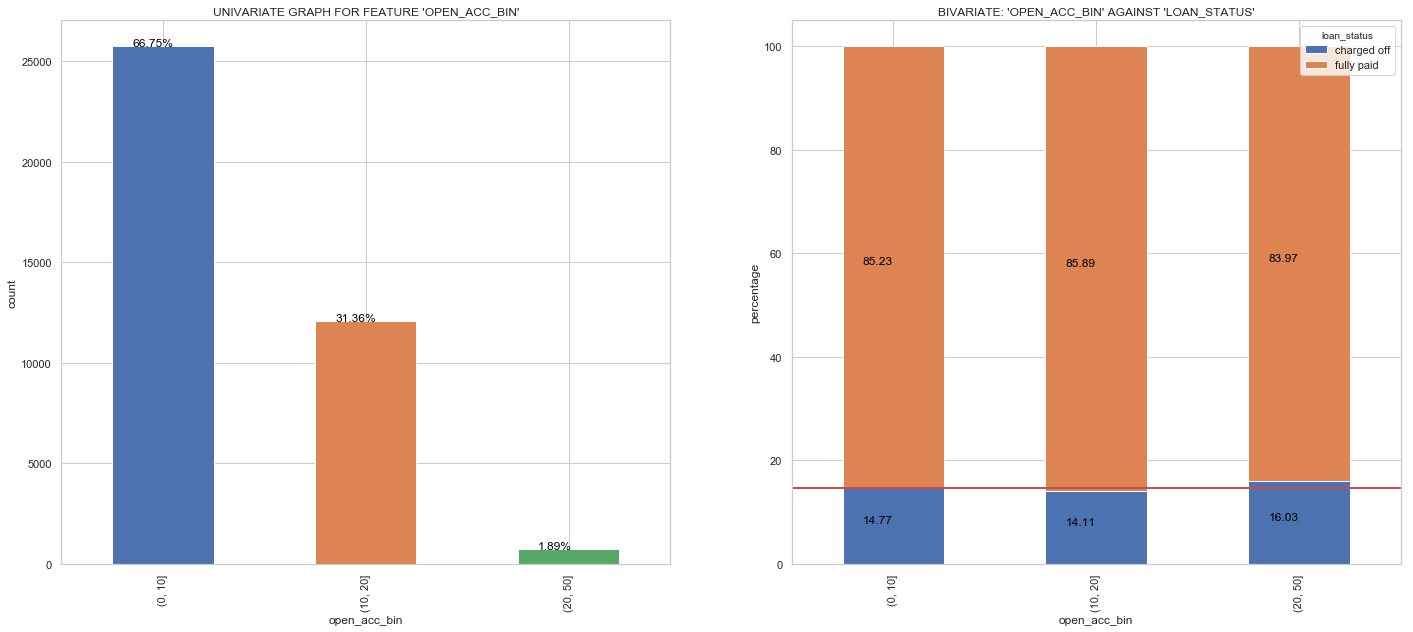

In [144]:
create_bin_and_plot(Loan_Data, 'open_acc', [0, 10, 20, 50])

**Observation** - There is not much correlation with increase in charge off with increase in number of account. 

<h3>21. PUB_REC</h3>

Public records can impact your credit score in a variety of ways. In the world of credit reporting, public records can include bankruptcy, judgments, liens, lawsuits, and foreclosures.


UNIVARIATE ANALYSIS FOR FEATURE 'PUB_REC', FREQUENCY IN COUNT AND %
------------------------------------------------------------------------------
loan_status  Count  Percentage
pub_rec                       
0            36507       94.63
1             2013        5.22
2               48        0.12
3                7        0.02
4                2        0.01


BIVARIATE ANALYSIS FOR FEATURE 'PUB_REC' WITH RESPECT TO 'LOAN_STATUS' IN COUNT AND %
------------------------------------------------------------------------------
         charged off  fully paid  charged off %  fully paid %
pub_rec                                                      
0               5160       31347          14.13         85.87
1                457        1556          22.70         77.30
2                 10          38          20.83         79.17
3                  0           7           0.00        100.00
4                  0           2           0.00        100.00


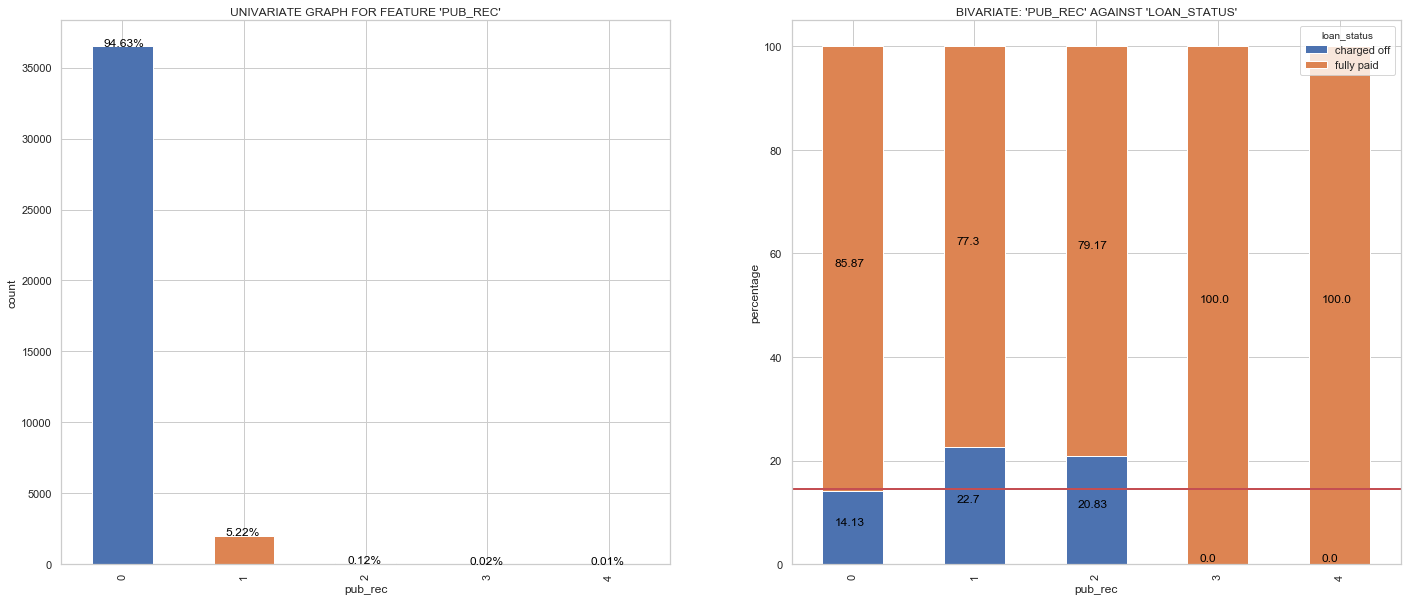

In [145]:
create_cross_tab_and_plot(Loan_Data, 'pub_rec')

Since there are not many records with 2 or more public record lets create a new category and analyse further


UNIVARIATE ANALYSIS FOR FEATURE 'PUB_REC_BIN', FREQUENCY IN COUNT AND %
------------------------------------------------------------------------------
loan_status  Count  Percentage
pub_rec_bin                   
(-1, 0]      36507       94.63
(0, 4]        2070        5.37


BIVARIATE ANALYSIS FOR FEATURE 'PUB_REC_BIN' WITH RESPECT TO 'LOAN_STATUS' IN COUNT AND %
------------------------------------------------------------------------------
             charged off  fully paid  charged off %  fully paid %
pub_rec_bin                                                      
(-1, 0]             5160       31347          14.13         85.87
(0, 4]               467        1603          22.56         77.44


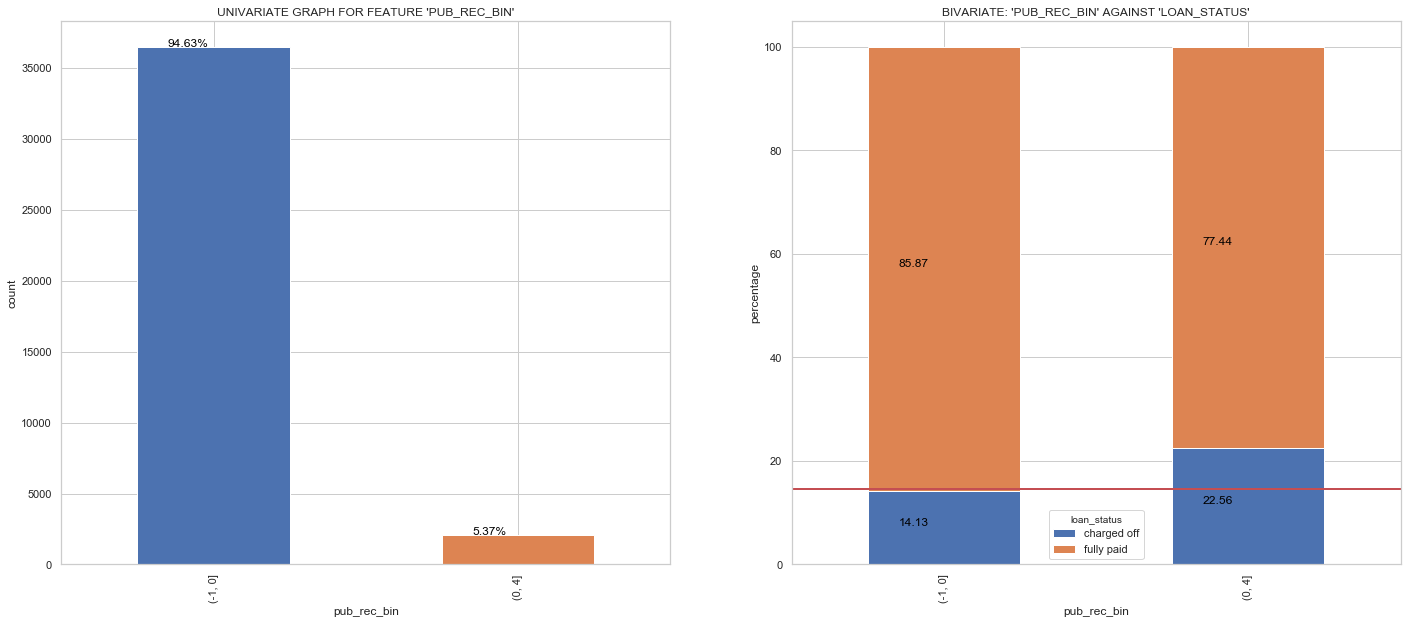

In [146]:
create_bin_and_plot(Loan_Data, 'pub_rec', [-1, 0, 4])

**Observation** - One or more public rec increases the rate of charge off

<h3>22. TOTAL_ACC</h3>

The total number of credit lines currently in the borrower's credit file, this is one of the factor for computing the credit score. Lrt's evaluate its impact.

In [147]:
print(sorted(Loan_Data.total_acc.unique()))

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 87, 90]


UNIVARIATE MATRICES FOR THE FEATURE 'TOTAL_ACC'
-----------------------------------------------------------
count   38577.00
mean       22.05
std        11.43
min         2.00
25%        13.00
50%        20.00
75%        29.00
max        90.00
Name: total_acc, dtype: float64


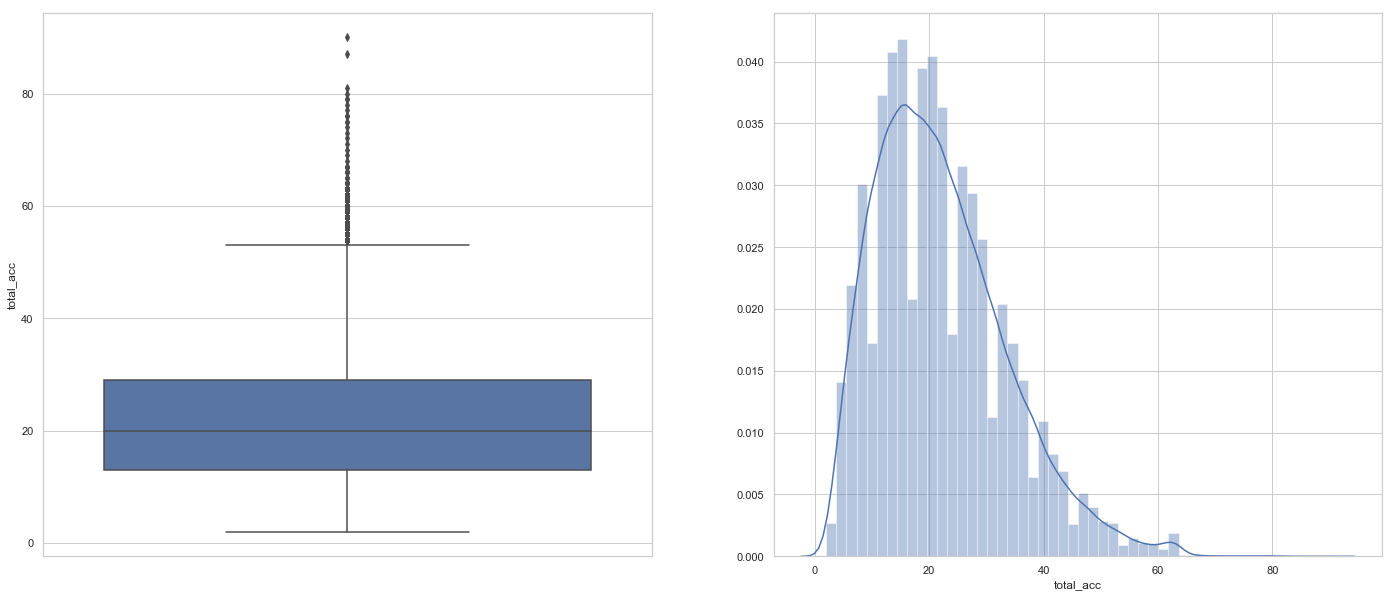

In [148]:
perform_continuous_univariate_and_plot(Loan_Data, 'total_acc')



SEGMENTED UNIVARIATE MATRICES FOR FEATURE 'TOTAL_ACC'
-----------------------------------------------------------
               count  mean   std  min   25%   50%   75%   max
loan_status                                                  
charged off  5627.00 21.43 11.45 2.00 13.00 20.00 28.00 74.00
fully paid  32950.00 22.16 11.42 2.00 14.00 20.00 29.00 90.00


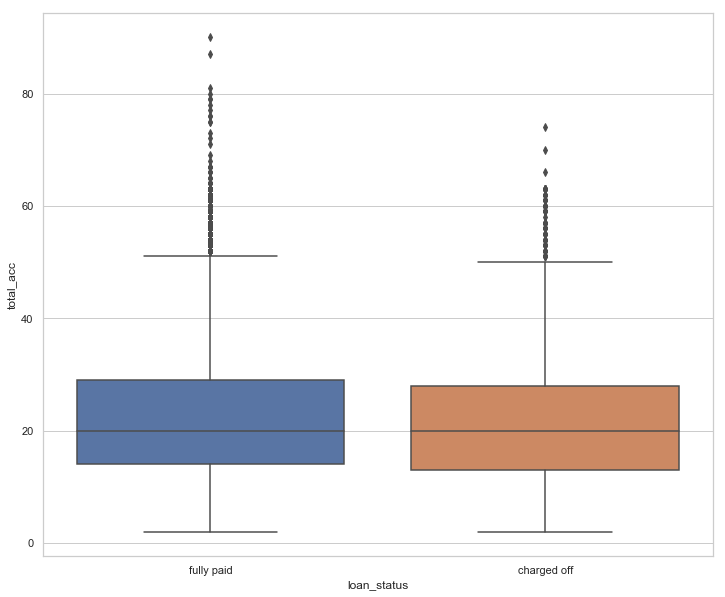

In [149]:
create_segmented_univariate_plot(Loan_Data, 'total_acc', 'loan_status')


UNIVARIATE ANALYSIS FOR FEATURE 'TOTAL_ACC_BIN', FREQUENCY IN COUNT AND %
------------------------------------------------------------------------------
loan_status    Count  Percentage
total_acc_bin                   
(0, 10]         5845       15.15
(10, 20]       13626       35.32
(20, 30]       10922       28.31
(30, 60]        7978       20.68
(60, 90]         206        0.53


BIVARIATE ANALYSIS FOR FEATURE 'TOTAL_ACC_BIN' WITH RESPECT TO 'LOAN_STATUS' IN COUNT AND %
------------------------------------------------------------------------------
               charged off  fully paid  charged off %  fully paid %
total_acc_bin                                                      
(0, 10]                977        4868          16.72         83.28
(10, 20]              2016       11610          14.80         85.20
(20, 30]              1485        9437          13.60         86.40
(30, 60]              1123        6855          14.08         85.92
(60, 90]                26        

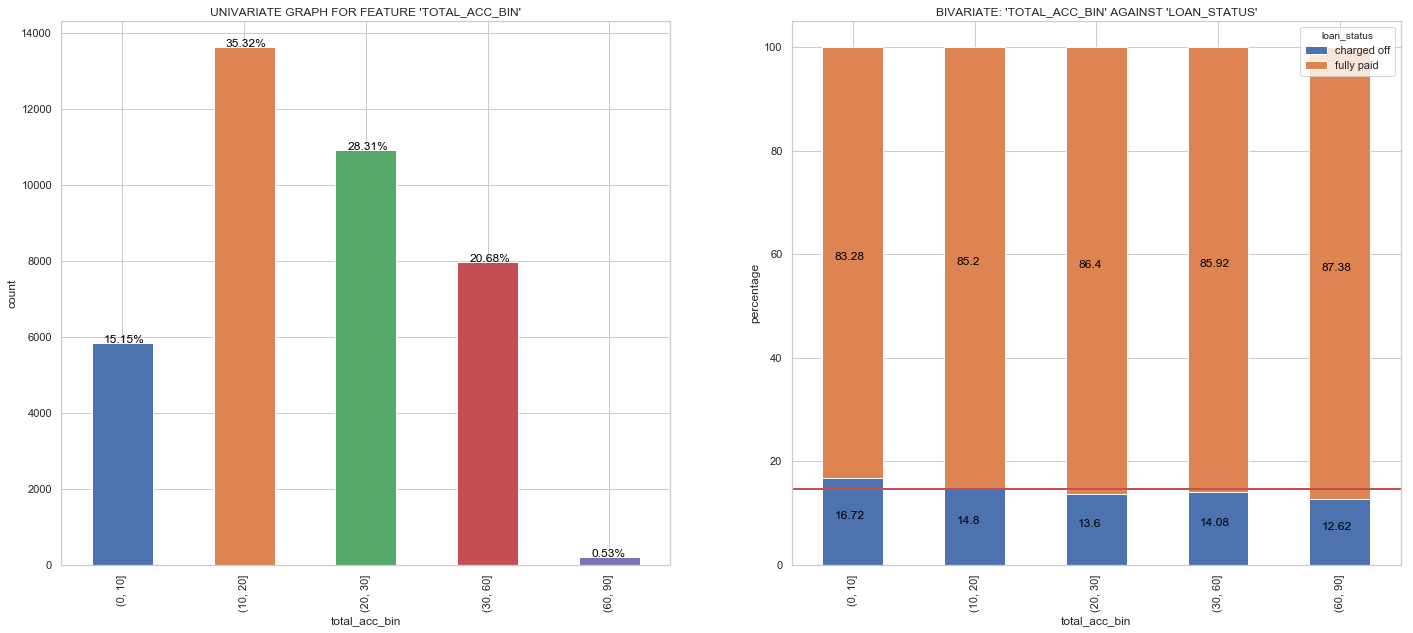

In [150]:
create_bin_and_plot(Loan_Data, 'total_acc', [0, 10, 20, 30, 60, 90])

**Observation**  -There is not much correlation between total_acc and charge off

<h3>23. PUB_REC_BANKRUPTCIES</h3>

Filing for bankruptcy can help protect you if you can’t afford to pay your debts. However, bankruptcy has consequences as well.

One of them is the fact that bankruptcy is a public record, so anyone can see it. As a result, bankruptcy can show up on your credit reports. It can also damage your scores and cause problems when you need to apply for new financing in the future.


UNIVARIATE ANALYSIS FOR FEATURE 'PUB_REC_BANKRUPTCIES', FREQUENCY IN COUNT AND %
------------------------------------------------------------------------------
loan_status           Count  Percentage
pub_rec_bankruptcies                   
0.00                  36935       95.74
1.00                   1637        4.24
2.00                      5        0.01


BIVARIATE ANALYSIS FOR FEATURE 'PUB_REC_BANKRUPTCIES' WITH RESPECT TO 'LOAN_STATUS' IN COUNT AND %
------------------------------------------------------------------------------
                      charged off  fully paid  charged off %  fully paid %
pub_rec_bankruptcies                                                      
0.00                         5259       31676          14.24         85.76
1.00                          366        1271          22.36         77.64
2.00                            2           3          40.00         60.00


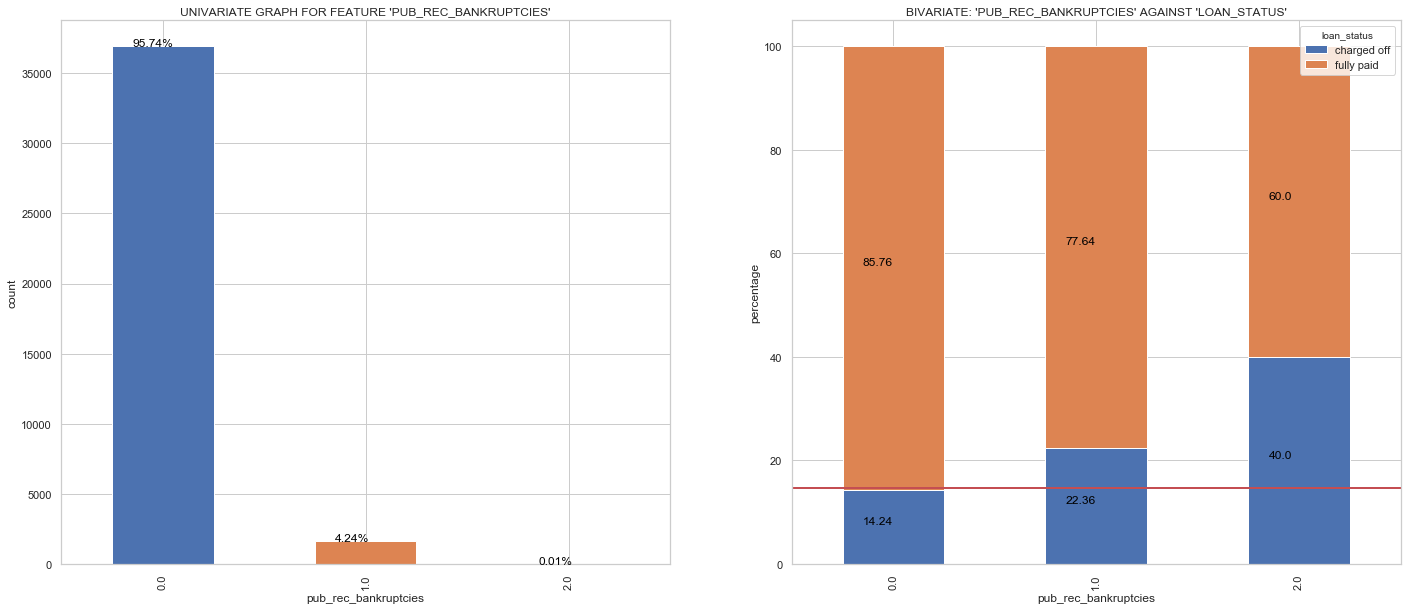

In [151]:
create_cross_tab_and_plot(Loan_Data, 'pub_rec_bankruptcies')

**Observation** - Any public bankruptcy record increases the chances of the loan charge off.

<h3>24. mths_since_last_delinq</h3>

Late payments remain in your credit history for seven years from the original delinquency date, which is the date the account first became late. They cannot be removed after two years, but the further in the past the late payments occurred, the less impact they will have on credit scores and lending decisions

UNIVARIATE MATRICES FOR THE FEATURE 'MTHS_SINCE_LAST_DELINQ'
-----------------------------------------------------------
count   38577.00
mean       90.83
std        42.77
min         0.00
25%        48.00
50%       121.00
75%       121.00
max       121.00
Name: mths_since_last_delinq, dtype: float64


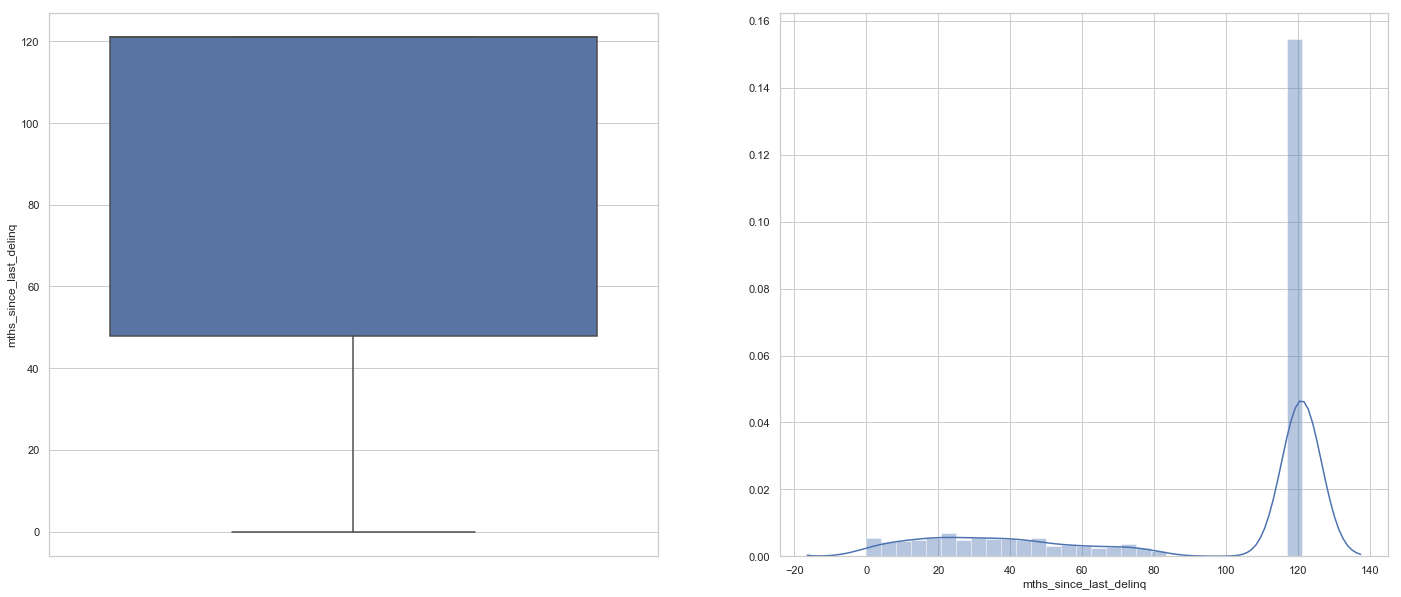

In [152]:
perform_continuous_univariate_and_plot(Loan_Data, 'mths_since_last_delinq')

Spike at 121 is expected since we imputed the details (those who has no delinquency) with 121. Let's bin it and analyse further. 


UNIVARIATE ANALYSIS FOR FEATURE 'MTHS_SINCE_LAST_DELINQ_BIN', FREQUENCY IN COUNT AND %
------------------------------------------------------------------------------
loan_status                 Count  Percentage
mths_since_last_delinq_bin                   
(-1, 20]                     3955       10.25
(20, 40]                     4278       11.09
(40, 60]                     3137        8.13
(60, 120]                    2302        5.97
(120, 122]                  24905       64.56


BIVARIATE ANALYSIS FOR FEATURE 'MTHS_SINCE_LAST_DELINQ_BIN' WITH RESPECT TO 'LOAN_STATUS' IN COUNT AND %
------------------------------------------------------------------------------
                            charged off  fully paid  charged off %  \
mths_since_last_delinq_bin                                           
(-1, 20]                            647        3308          16.36   
(20, 40]                            606        3672          14.17   
(40, 60]                            500      

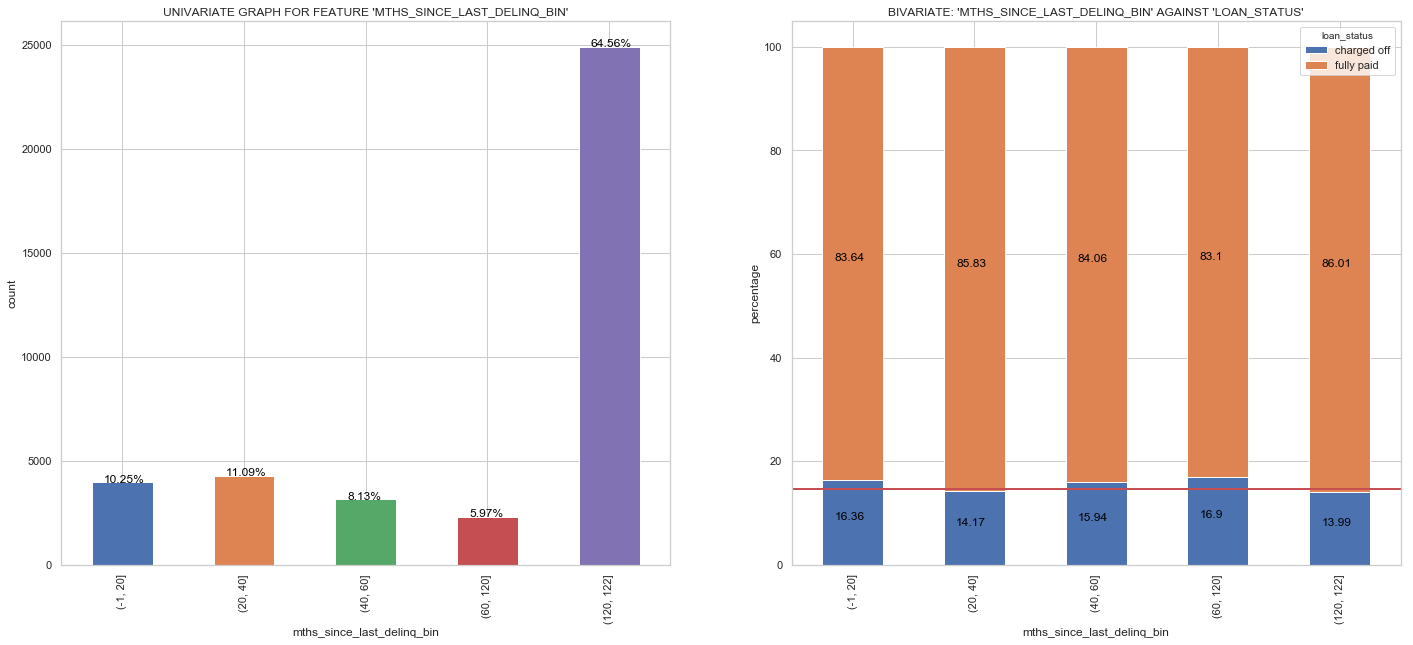

In [153]:
create_bin_and_plot(Loan_Data, 'mths_since_last_delinq', [-1, 20, 40, 60, 120, 122])

**Observation** - This feature can be omitted as there is no trend on default rate is observed.

<h3>25. mths_since_last_record</h3>

This feature indicates the months since last public recors on the credit file.

UNIVARIATE MATRICES FOR THE FEATURE 'MTHS_SINCE_LAST_RECORD'
-----------------------------------------------------------
count   38577.00
mean      126.61
std        19.72
min         0.00
25%       131.00
50%       131.00
75%       131.00
max       131.00
Name: mths_since_last_record, dtype: float64


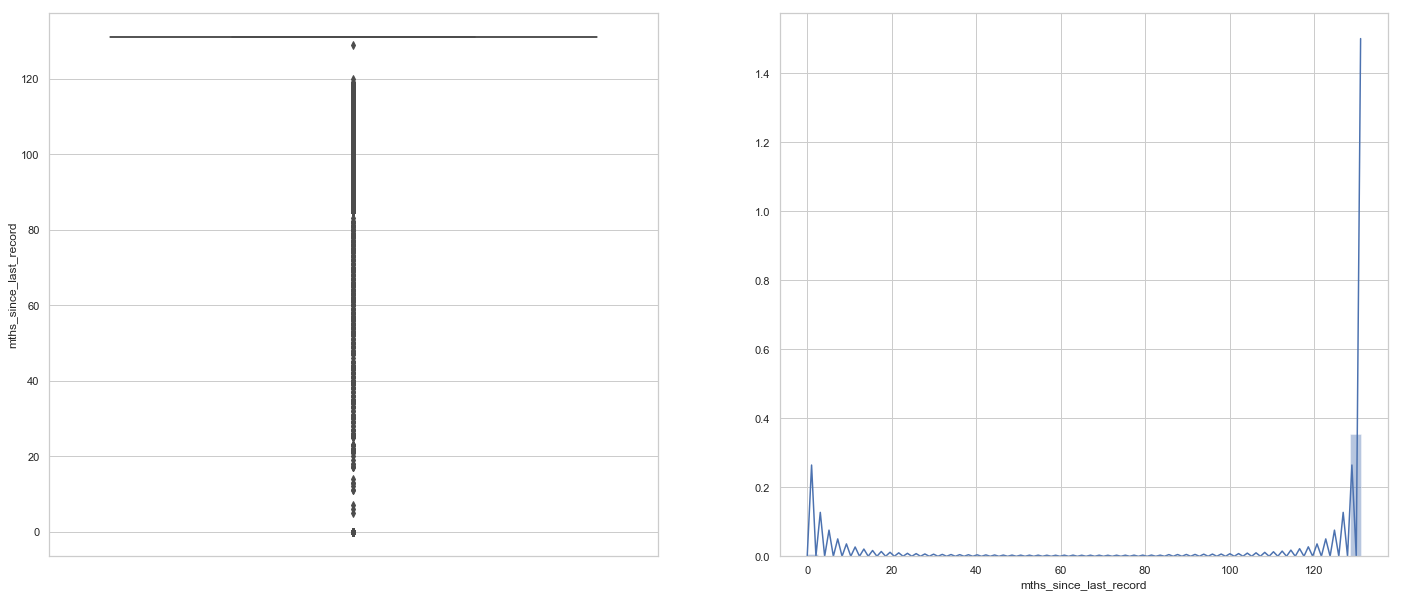

In [154]:
perform_continuous_univariate_and_plot(Loan_Data, 'mths_since_last_record')


UNIVARIATE ANALYSIS FOR FEATURE 'MTHS_SINCE_LAST_RECORD_BIN', FREQUENCY IN COUNT AND %
------------------------------------------------------------------------------
loan_status                 Count  Percentage
mths_since_last_record_bin                   
(-1, 20]                      686        1.78
(20, 60]                      218        0.57
(60, 100]                     978        2.54
(100, 130]                    858        2.22
(130, 132]                  35837       92.90


BIVARIATE ANALYSIS FOR FEATURE 'MTHS_SINCE_LAST_RECORD_BIN' WITH RESPECT TO 'LOAN_STATUS' IN COUNT AND %
------------------------------------------------------------------------------
                            charged off  fully paid  charged off %  \
mths_since_last_record_bin                                           
(-1, 20]                            116         570          16.91   
(20, 60]                             38         180          17.43   
(60, 100]                           232      

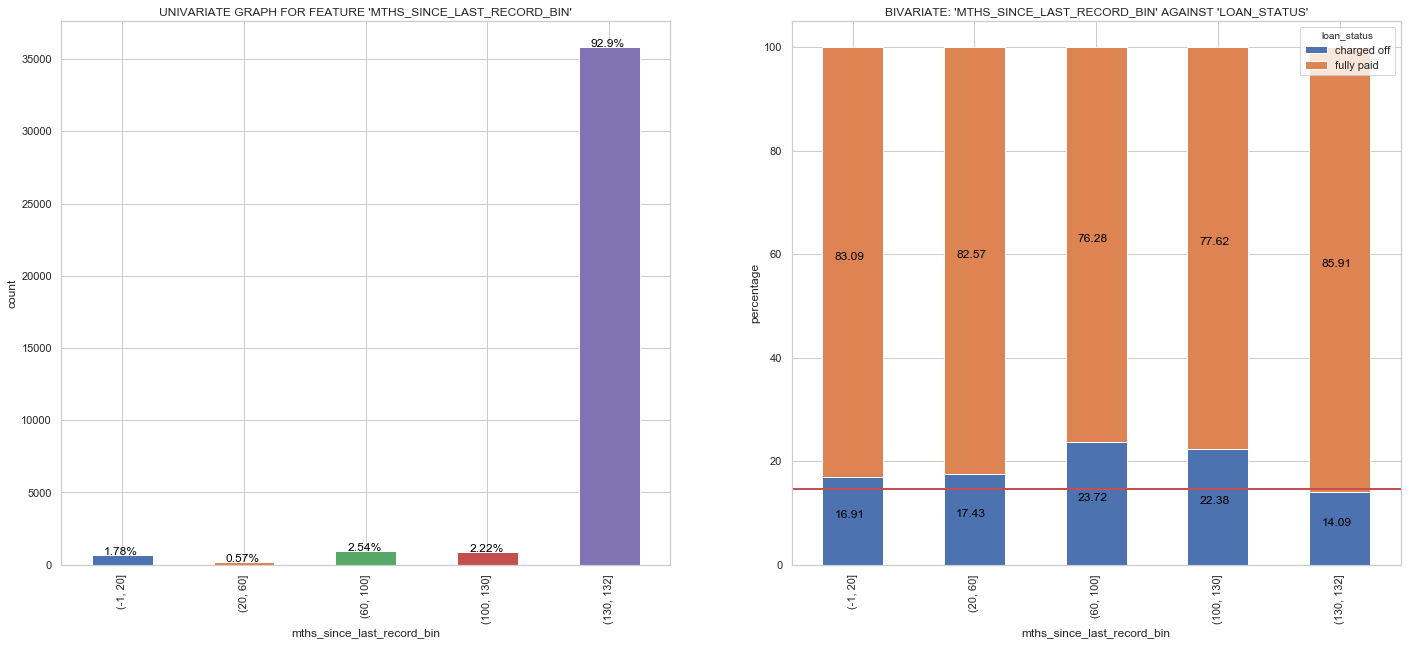

In [155]:
create_bin_and_plot(Loan_Data, 'mths_since_last_record', [-1, 20, 60, 100, 130, 132])

**Observation** - This feature can be omitted as there is no trend on default rate is observed.

# LET'S EXPLORE SOME MORE:

One thing which we noticed while analysis is dti does not consider the current loan or the loan under process. Hence let's see whether LC has extended high amount loans to people who are already on the higher dti or not

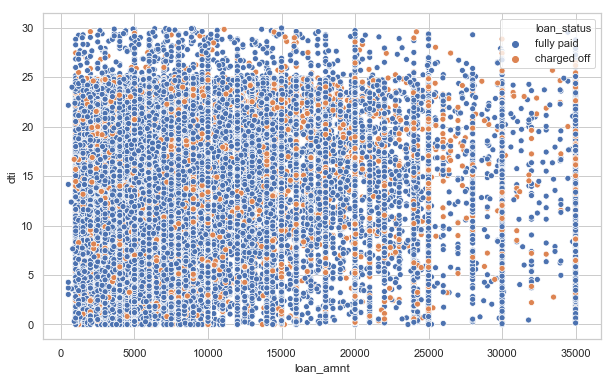

In [156]:
plt.figure(figsize = (10,6))
ax = sns.scatterplot(x="loan_amnt", y="dti", hue= 'loan_status', data=Loan_Data)

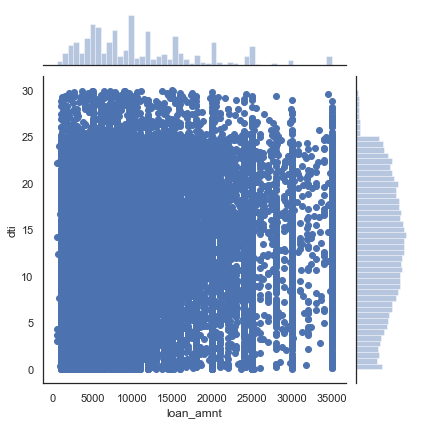

In [157]:
with sns.axes_style("white"):
    sns.jointplot(x="loan_amnt", y="dti", data=Loan_Data)

We can observe that there are not many loans which are of high amount are extended to those already nearing to 30% dti.  But still they can control granting the loan to those are between 25-30% of DTI.

Also current DTI is computed as ratio of monthly debt excluding this loan to monthly income.

This raised the need for 2 ratio variables:
1. loan amount to income ratio - this feature isnt given as part of the data
2. loan installment/monthly income.This ratio we will add it to dti(for dti it is [all monthly debts except this loan/monthly income]) and see how the distribution looks like.

<h3>Derived feature 1: Loan amount to income ratio</h3>

In [158]:
Loan_Data['loan_to_inc'] = (Loan_Data['loan_amnt']/Loan_Data['annual_inc'])*100

UNIVARIATE MATRICES FOR THE FEATURE 'LOAN_TO_INC'
-----------------------------------------------------------
count   38577.00
mean       18.58
std        11.52
min         0.08
25%         9.80
50%        16.30
75%        25.00
max        83.00
Name: loan_to_inc, dtype: float64


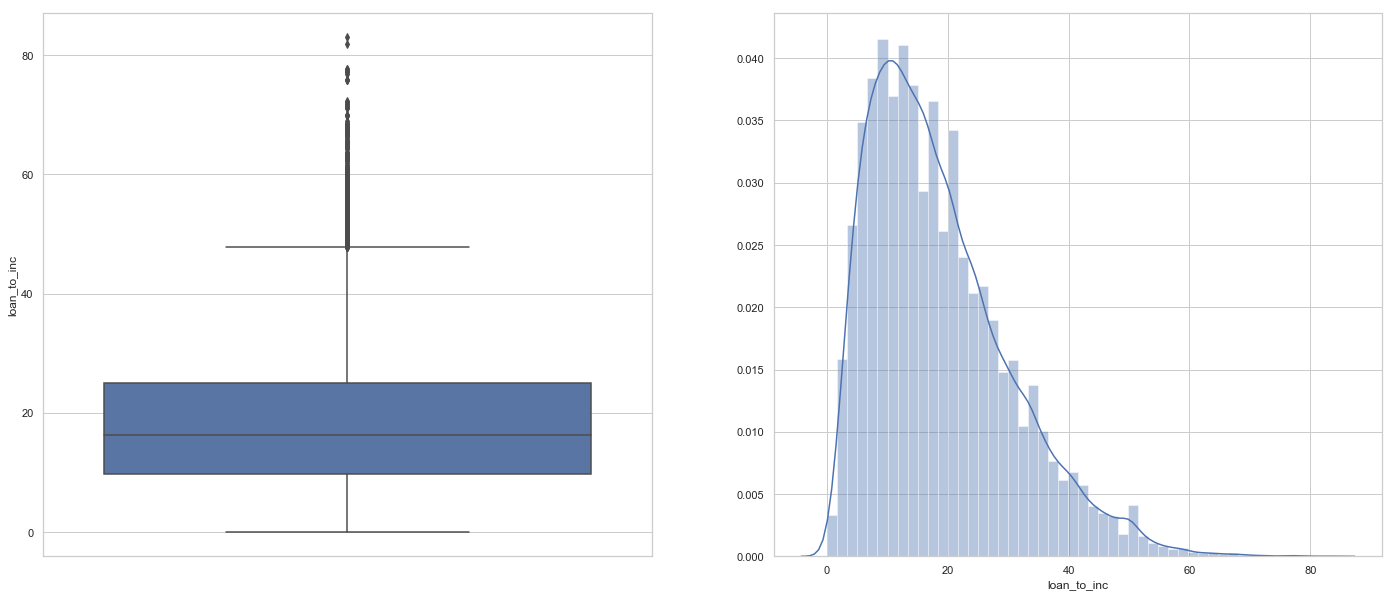

In [159]:
perform_continuous_univariate_and_plot(Loan_Data, 'loan_to_inc')



SEGMENTED UNIVARIATE MATRICES FOR FEATURE 'LOAN_TO_INC'
-----------------------------------------------------------
               count  mean   std  min   25%   50%   75%   max
loan_status                                                  
charged off  5627.00 21.88 13.01 0.52 11.50 19.88 30.00 81.97
fully paid  32950.00 18.02 11.16 0.08  9.56 15.80 24.24 83.00


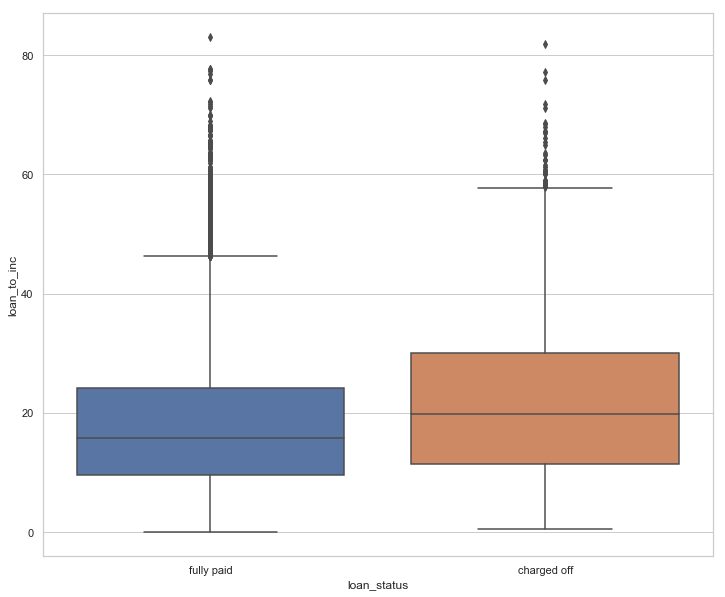

In [160]:
create_segmented_univariate_plot(Loan_Data, 'loan_to_inc', 'loan_status')

**Observation** - As plot indicatesloan_to_inc feature has higher value for charge off loans

We can see after 50 there is a long tail, so let's push all the loans beyond 50 into a seperate bin


UNIVARIATE ANALYSIS FOR FEATURE 'LOAN_TO_INC_BIN', FREQUENCY IN COUNT AND %
------------------------------------------------------------------------------
loan_status      Count  Percentage
loan_to_inc_bin                   
(0, 10]          10256       26.59
(10, 20]         13995       36.28
(20, 30]          8183       21.21
(30, 40]          4041       10.48
(40, 50]          1592        4.13
(50, 90]           510        1.32


BIVARIATE ANALYSIS FOR FEATURE 'LOAN_TO_INC_BIN' WITH RESPECT TO 'LOAN_STATUS' IN COUNT AND %
------------------------------------------------------------------------------
                 charged off  fully paid  charged off %  fully paid %
loan_to_inc_bin                                                      
(0, 10]                 1163        9093          11.34         88.66
(10, 20]                1754       12241          12.53         87.47
(20, 30]                1321        6862          16.14         83.86
(30, 40]                 811        323

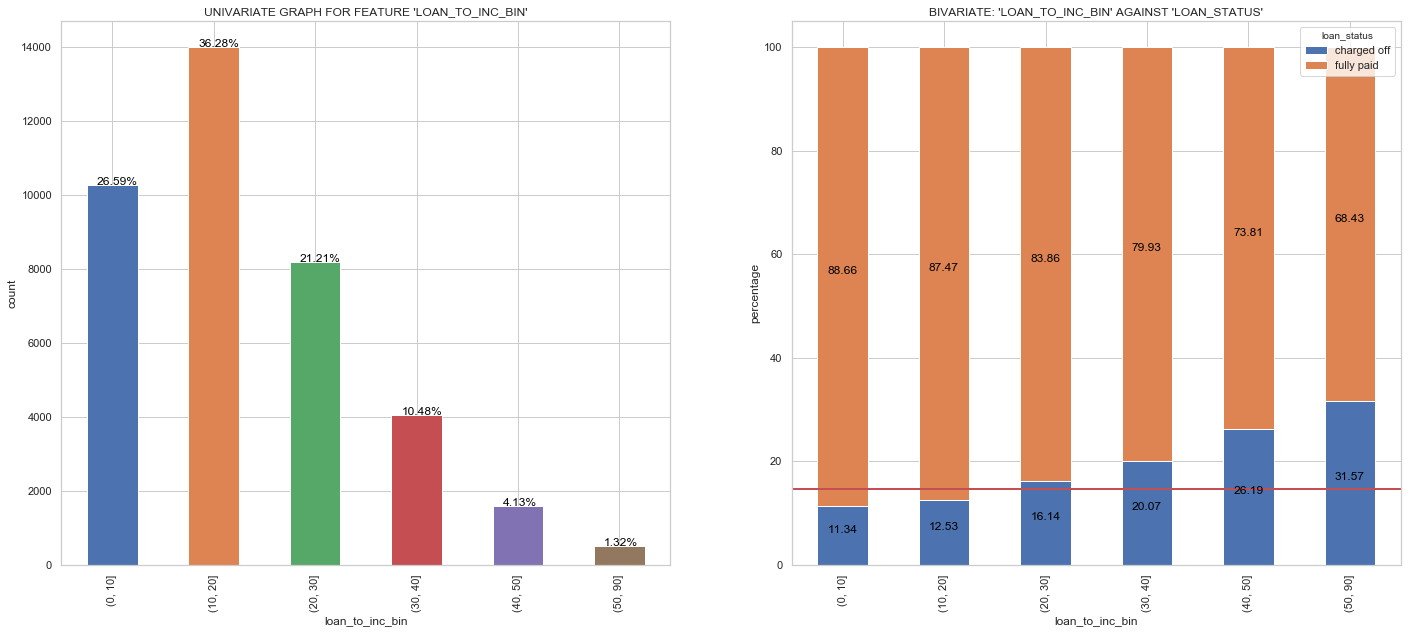

In [161]:
create_bin_and_plot(Loan_Data, 'loan_to_inc', [0, 10, 20, 30, 40, 50, 90])

**Observation** - If the loan amount to annual income ratio is greater than 30 then there is higher chance for charge off. So this can be considered as one of the potential feature.

<h3> Derived feature2: installment to monthly income</h3>

Though "loan_amount to annual income" and "installment to monthly income" may look similar, but this can give altogether differnt detail as installment can be high or low based on interst rate, term etc

In [162]:
Loan_Data['installment_to_inc'] = (Loan_Data['installment']/(Loan_Data['annual_inc']/12))*100

UNIVARIATE MATRICES FOR THE FEATURE 'INSTALLMENT_TO_INC'
-----------------------------------------------------------
count   38577.00
mean        6.56
std         4.01
min         0.03
25%         3.50
50%         5.77
75%         8.81
max        32.03
Name: installment_to_inc, dtype: float64


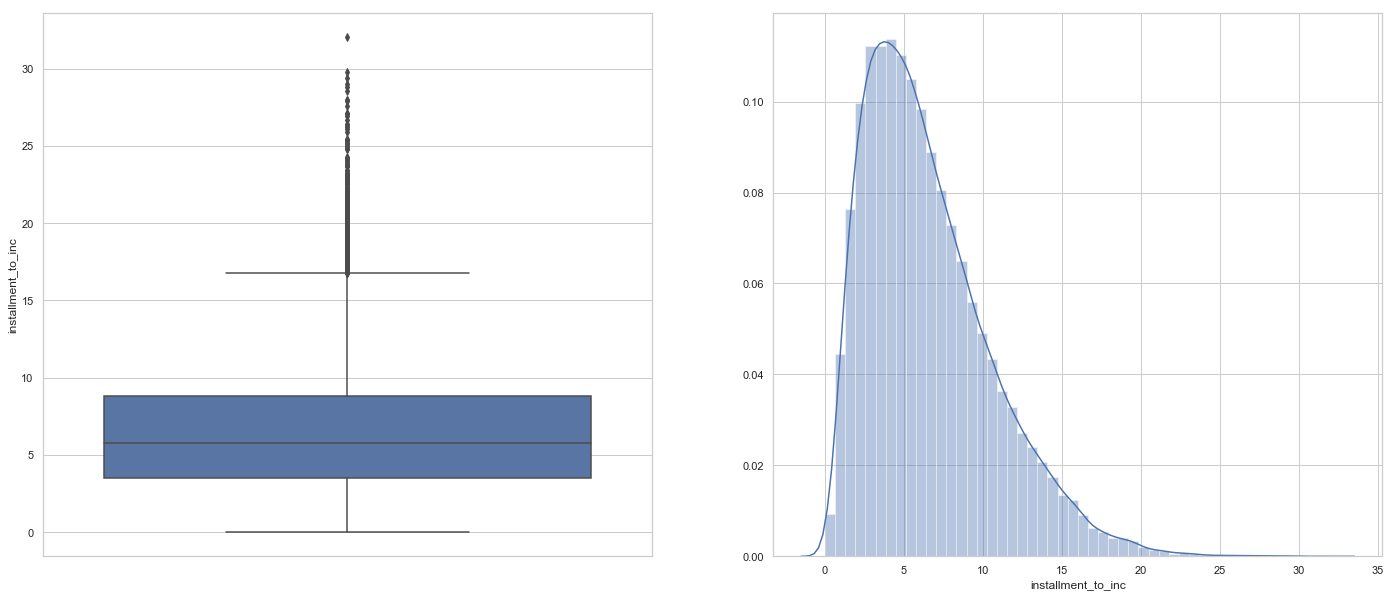

In [163]:
perform_continuous_univariate_and_plot(Loan_Data, 'installment_to_inc')



SEGMENTED UNIVARIATE MATRICES FOR FEATURE 'INSTALLMENT_TO_INC'
-----------------------------------------------------------
               count  mean  std  min  25%  50%   75%   max
loan_status                                               
charged off  5627.00  7.37 4.30 0.17 4.00 6.63 10.05 29.76
fully paid  32950.00  6.42 3.94 0.03 3.43 5.63  8.62 32.03


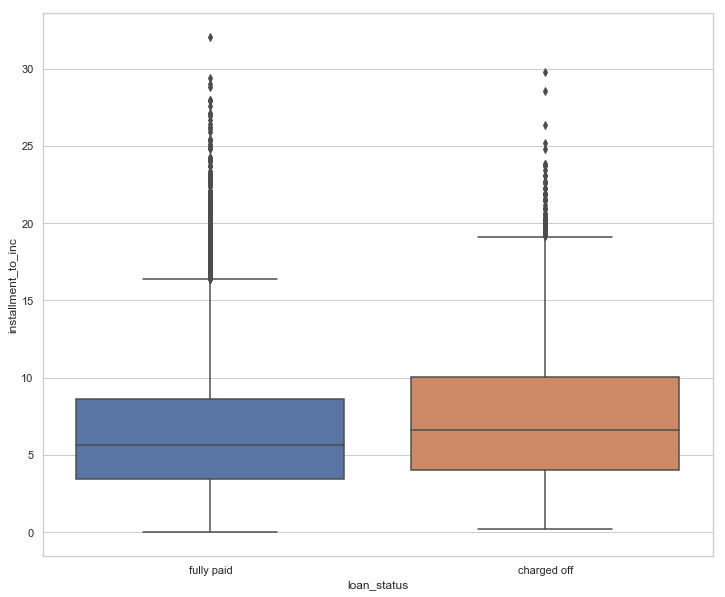

In [164]:
create_segmented_univariate_plot(Loan_Data, 'installment_to_inc', 'loan_status')

We will consider all the loans with this feature value beyond 20 in a seperate bin (please see distribution plot above)


UNIVARIATE ANALYSIS FOR FEATURE 'INSTALLMENT_TO_INC_BIN', FREQUENCY IN COUNT AND %
------------------------------------------------------------------------------
loan_status             Count  Percentage
installment_to_inc_bin                   
(0, 5]                  16124       41.80
(5, 10]                 15332       39.74
(10, 15]                 5629       14.59
(15, 20]                 1307        3.39
(20, 40]                  185        0.48


BIVARIATE ANALYSIS FOR FEATURE 'INSTALLMENT_TO_INC_BIN' WITH RESPECT TO 'LOAN_STATUS' IN COUNT AND %
------------------------------------------------------------------------------
                        charged off  fully paid  charged off %  fully paid %
installment_to_inc_bin                                                      
(0, 5]                         1935       14189          12.00         88.00
(5, 10]                        2268       13064          14.79         85.21
(10, 15]                       1099        4530      

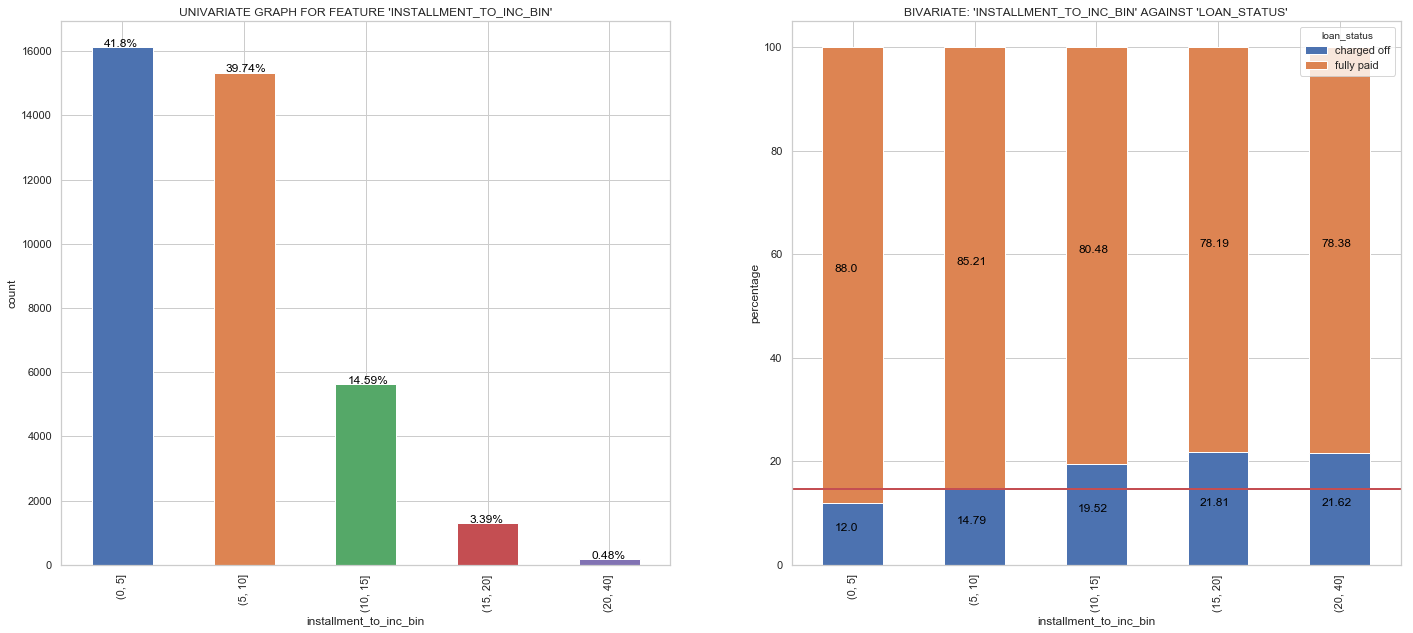

In [165]:
create_bin_and_plot(Loan_Data, 'installment_to_inc', [0, 5, 10, 15, 20, 40])

**Observation** - We can clearly see that as installment to monthly income increases the default rate also increasing

<h3> Let us now create an adjusted dti by considering details of this new loans also</h3>

In [166]:
Loan_Data['adjusted_dti'] = (Loan_Data.installment_to_inc) + Loan_Data.dti

UNIVARIATE MATRICES FOR THE FEATURE 'ADJUSTED_DTI'
-----------------------------------------------------------
count   38577.00
mean       19.84
std         8.22
min         0.04
25%        13.67
50%        19.78
75%        25.81
max        42.96
Name: adjusted_dti, dtype: float64


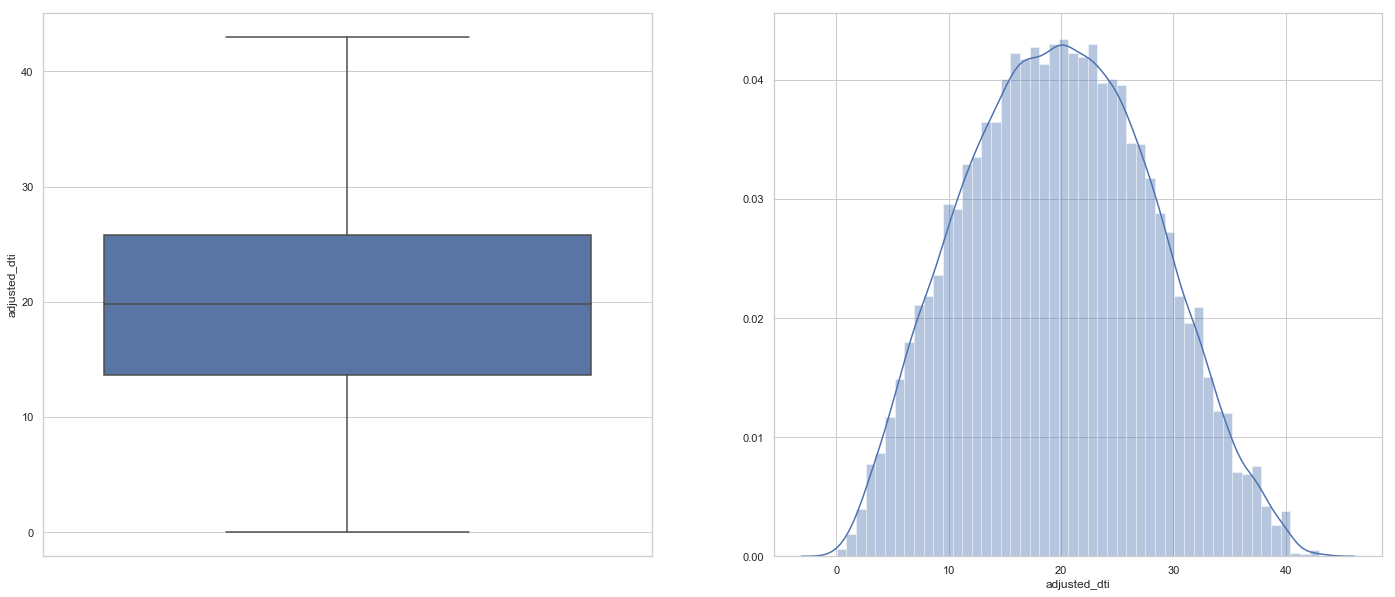

In [167]:
perform_continuous_univariate_and_plot(Loan_Data, 'adjusted_dti')



SEGMENTED UNIVARIATE MATRICES FOR FEATURE 'ADJUSTED_DTI'
-----------------------------------------------------------
               count  mean  std  min   25%   50%   75%   max
loan_status                                                 
charged off  5627.00 21.37 8.11 0.17 15.57 21.57 27.29 42.79
fully paid  32950.00 19.57 8.21 0.04 13.39 19.48 25.56 42.96


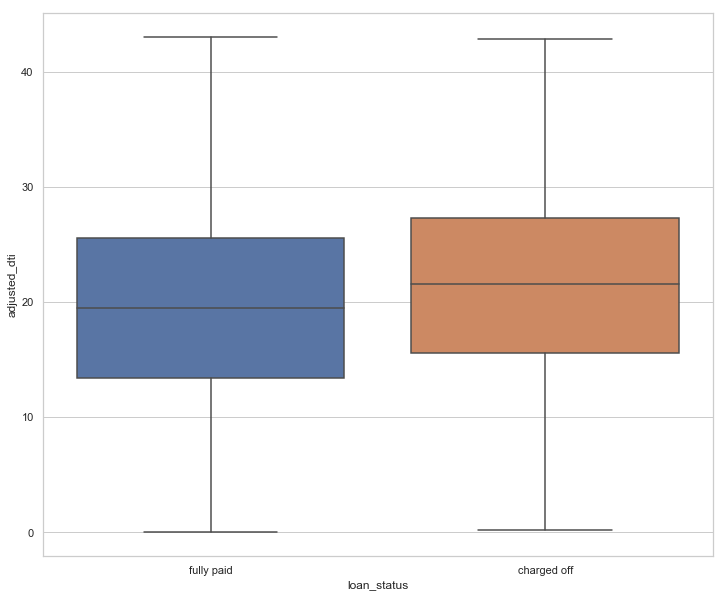

In [168]:
create_segmented_univariate_plot(Loan_Data, 'adjusted_dti', 'loan_status')


UNIVARIATE ANALYSIS FOR FEATURE 'ADJUSTED_DTI_BIN', FREQUENCY IN COUNT AND %
------------------------------------------------------------------------------
loan_status       Count  Percentage
adjusted_dti_bin                   
(-1, 10]           5008       12.98
(10, 20]          14655       37.99
(20, 30]          14372       37.26
(30, 50]           4542       11.77


BIVARIATE ANALYSIS FOR FEATURE 'ADJUSTED_DTI_BIN' WITH RESPECT TO 'LOAN_STATUS' IN COUNT AND %
------------------------------------------------------------------------------
                  charged off  fully paid  charged off %  fully paid %
adjusted_dti_bin                                                      
(-1, 10]                  547        4461          10.92         89.08
(10, 20]                 1867       12788          12.74         87.26
(20, 30]                 2343       12029          16.30         83.70
(30, 50]                  870        3672          19.15         80.85


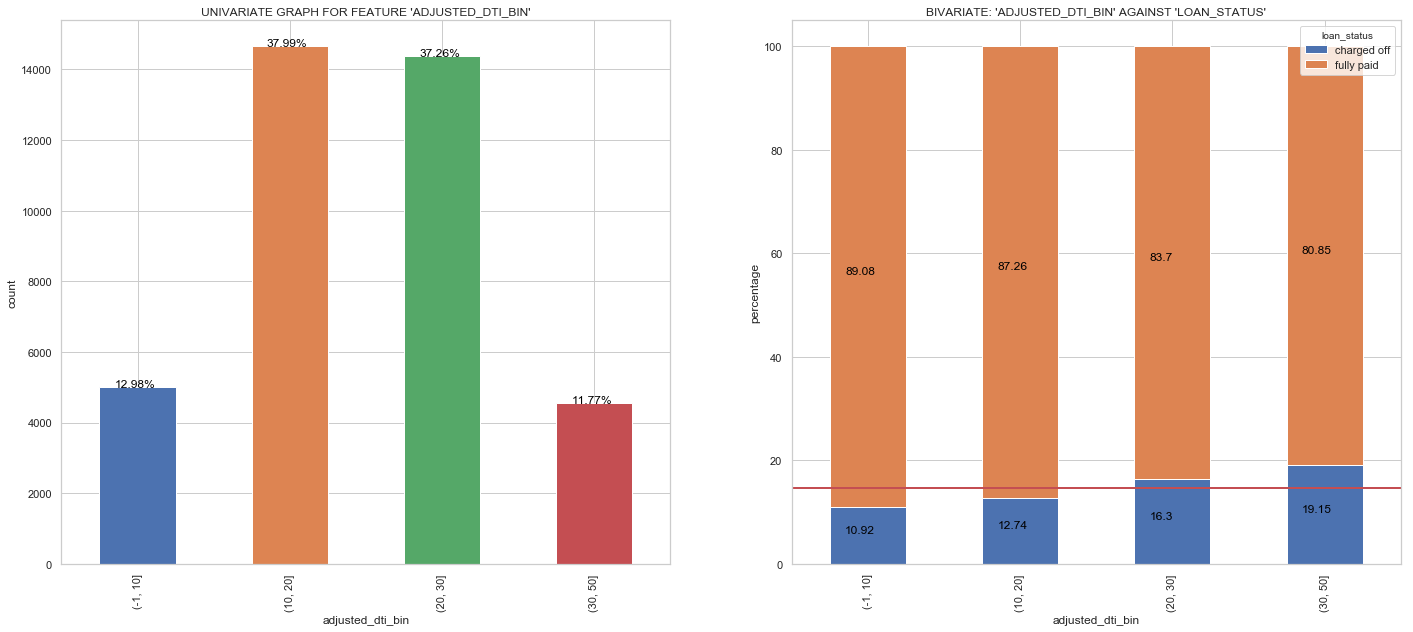

In [169]:
create_bin_and_plot(Loan_Data, 'adjusted_dti', [-1, 10, 20, 30, 50])

**Will see how continuous variables are correlated each other**

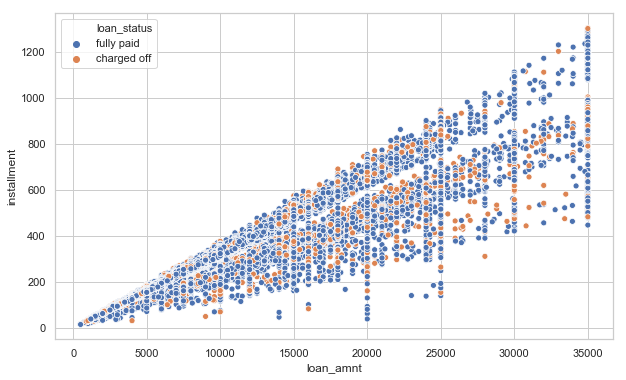

In [170]:
plt.figure(figsize = (10,6))
ax = sns.scatterplot(x="loan_amnt", y="installment", hue="loan_status",
                     data=Loan_Data)

As expected there is kind of positive linear relation between loan_amnt and installment

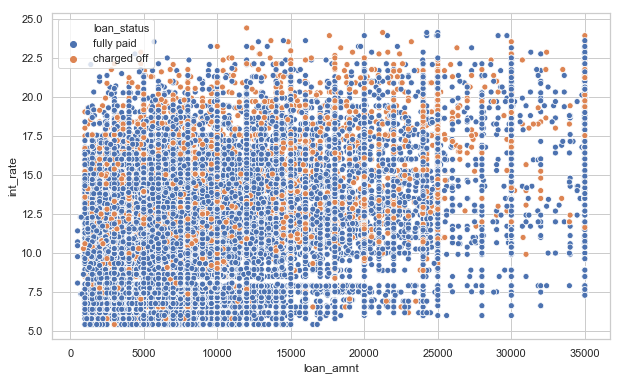

In [171]:
plt.figure(figsize = (10,6))
ax = sns.scatterplot(x="loan_amnt", y="int_rate", hue="loan_status", data=Loan_Data)

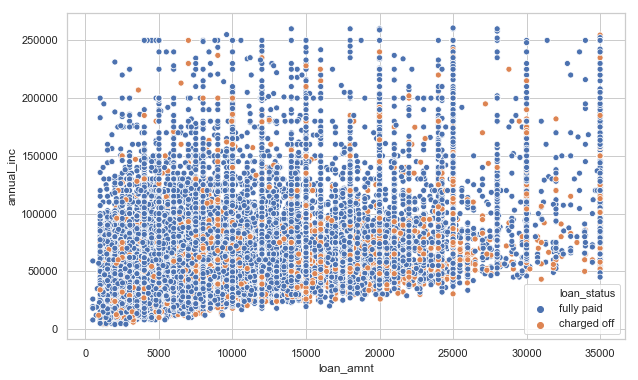

In [172]:
Loan_Data
plt.figure(figsize = (10,6))
ax = sns.scatterplot(x="loan_amnt", y="annual_inc", hue="loan_status", data=Loan_data_cleaned)

Though its less, we can still see LC approves high amount loan to people with income less that 50000 also

<h3>CORRELATION BETWEEN CATEGORICAL VARIABLES USING CRAMER'S V STATISTICS</h3>

For details on various correlation techniques based on variable type, please see https://medium.com/@outside2SDs/an-overview-of-correlation-measures-between-categorical-and-continuous-variables-4c7f85610365
    
Also please note that the correlation value using Cramer's V statistics will be between [0, 1]    

In [173]:
correlation = {}

In [174]:
correlation['loan_amnt_bin'] = cramers_v(Loan_Data["loan_amnt_bin"], Loan_Data["loan_status"])
correlation['loan_amnt_bin']

0.06513331311179017

In [175]:
correlation['term'] = cramers_v(Loan_Data["term"], Loan_Data["loan_status"])
correlation['term']

0.17332887194930693

In [176]:
correlation['int_rate_bin'] = cramers_v(Loan_Data["int_rate_bin"], Loan_Data["loan_status"])
correlation['int_rate_bin']

0.2015132582549414

In [177]:
correlation['installment_bin'] = cramers_v(Loan_Data["installment_bin"], Loan_Data["loan_status"])
correlation['installment_bin']

0.02820344944516739

In [178]:
correlation['grade'] = cramers_v(Loan_Data["grade"], Loan_Data["loan_status"])
correlation['grade']

0.20207271604984764

In [179]:
correlation['sub_grade'] = cramers_v(Loan_Data["sub_grade"], Loan_Data["loan_status"])
correlation['sub_grade']

0.20713304662763649

In [180]:
correlation['emp_length'] = cramers_v(Loan_Data["emp_length"], Loan_Data["loan_status"])
correlation['emp_length']

0.03897018680273808

In [181]:
correlation['home_ownership'] = cramers_v(Loan_Data["home_ownership"], Loan_Data["loan_status"])
correlation['home_ownership']

0.02186636423819129

In [182]:
correlation['annual_inc_bin'] = cramers_v(Loan_Data["annual_inc_bin"], Loan_Data["loan_status"])
correlation['annual_inc_bin']

0.0708527829894373

In [183]:
correlation['verification_status'] = cramers_v(Loan_Data["verification_status"], Loan_Data["loan_status"])
correlation['verification_status']

0.04772283341064406

In [184]:
correlation['purpose'] = cramers_v(Loan_Data["purpose"], Loan_Data["loan_status"])
correlation['purpose']

0.09739765238025856

In [185]:
correlation['revol_bal_bin'] = cramers_v(Loan_Data["revol_bal_bin"], Loan_Data["loan_status"])
correlation['revol_bal_bin']

0.0180850498736229

In [186]:
correlation['revol_util_bin'] = cramers_v(Loan_Data["revol_util_bin"], Loan_Data["loan_status"])
correlation['revol_util_bin']

0.09743689443913676

In [187]:
correlation['addr_state'] = cramers_v(Loan_Data["addr_state"], Loan_Data["loan_status"])
correlation['addr_state']

0.053499904702953266

In [188]:
correlation['dti_bin'] = cramers_v(Loan_Data["dti_bin"], Loan_Data["loan_status"])
correlation['dti_bin']

0.046938541472323875

In [189]:
correlation['delinq_2yrs_bin'] = cramers_v(Loan_Data["delinq_2yrs_bin"], Loan_Data["loan_status"])
correlation['delinq_2yrs_bin']

0.020581931266757225

In [190]:
correlation['earliest_cr_year_bin'] = cramers_v(Loan_Data["earliest_cr_year_bin"], Loan_Data["loan_status"])
correlation['earliest_cr_year_bin']

0.013025277651787856

In [191]:
correlation['inq_last_6mths_bin'] = cramers_v(Loan_Data["inq_last_6mths_bin"], Loan_Data["loan_status"])
correlation['inq_last_6mths_bin']

0.07433070299338172

In [192]:
correlation['open_acc_bin'] = cramers_v(Loan_Data["open_acc_bin"], Loan_Data["loan_status"])
correlation['open_acc_bin']

0.007378651688629256

In [193]:
correlation['pub_rec_bin'] = cramers_v(Loan_Data["pub_rec_bin"], Loan_Data["loan_status"])
correlation['pub_rec_bin']

0.05338956639949568

In [194]:
correlation['total_acc_bin'] = cramers_v(Loan_Data["total_acc_bin"], Loan_Data["loan_status"])
correlation['total_acc_bin']

0.027244548933400798

In [195]:
correlation['pub_rec_bankruptcies'] = cramers_v(Loan_Data["pub_rec_bankruptcies"], Loan_Data["loan_status"])
correlation['pub_rec_bankruptcies']

0.046535272860214895

In [196]:
correlation['loan_to_inc_bin'] = cramers_v(Loan_Data["loan_to_inc_bin"], Loan_Data["loan_status"])
correlation['loan_to_inc_bin']

0.11751952575630276

In [197]:
correlation['installment_to_inc_bin'] = cramers_v(Loan_Data["installment_to_inc_bin"], Loan_Data["loan_status"])
correlation['installment_to_inc_bin']

0.08133860500160438

In [198]:
correlation['adjusted_dti_bin'] = cramers_v(Loan_Data["adjusted_dti_bin"], Loan_Data["loan_status"])
correlation['adjusted_dti_bin']

0.07220639193955329

<h3> MOST SIGNIFICANT FEATURES IN SORTED ORDER </h3>

In [199]:
sorted_correlation = sorted(correlation.items(), key=lambda item: item[1], reverse = True)

In [200]:
sorted_correlation

[('sub_grade', 0.20713304662763649),
 ('grade', 0.20207271604984764),
 ('int_rate_bin', 0.2015132582549414),
 ('term', 0.17332887194930693),
 ('loan_to_inc_bin', 0.11751952575630276),
 ('revol_util_bin', 0.09743689443913676),
 ('purpose', 0.09739765238025856),
 ('installment_to_inc_bin', 0.08133860500160438),
 ('inq_last_6mths_bin', 0.07433070299338172),
 ('adjusted_dti_bin', 0.07220639193955329),
 ('annual_inc_bin', 0.0708527829894373),
 ('loan_amnt_bin', 0.06513331311179017),
 ('addr_state', 0.053499904702953266),
 ('pub_rec_bin', 0.05338956639949568),
 ('verification_status', 0.04772283341064406),
 ('dti_bin', 0.046938541472323875),
 ('pub_rec_bankruptcies', 0.046535272860214895),
 ('emp_length', 0.03897018680273808),
 ('installment_bin', 0.02820344944516739),
 ('total_acc_bin', 0.027244548933400798),
 ('home_ownership', 0.02186636423819129),
 ('delinq_2yrs_bin', 0.020581931266757225),
 ('revol_bal_bin', 0.0180850498736229),
 ('earliest_cr_year_bin', 0.013025277651787856),
 ('open_a

**CORRELATION MATRIX USING CRAMER'S V STATISTICS:**

NOTE: We are not using pandas corr(), as this method computes correlation between continuous variables. pandas corr() method accept callable as one parameter. Tried passing the cramers_v function as callable, still pandas invoke the correlation method only on continuous variable.

Hence to make use of Cramer's V Statistics, written the logic compute the correlation matrix (using utility method) between each feature pair.

In [201]:
column = ['loan_status'] + [correlation[0] for correlation in sorted_correlation]
#column = ['loan_status', 'loan_amnt_bin', 'term', 'int_rate_bin', 'installment_bin', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc_bin', 'verification_status', 'purpose', 'revol_bal_bin', 'revol_util_bin', 'addr_state', 'dti_bin', 'delinq_2yrs_bin', 'earliest_cr_year_bin', 'inq_last_6mths_bin', 'open_acc_bin', 'pub_rec_bin', 'total_acc_bin', 'pub_rec_bankruptcies', 'loan_to_inc_bin', 'installment_to_inc_bin', 'adjusted_dti_bin']

In [202]:
column 

['loan_status',
 'sub_grade',
 'grade',
 'int_rate_bin',
 'term',
 'loan_to_inc_bin',
 'revol_util_bin',
 'purpose',
 'installment_to_inc_bin',
 'inq_last_6mths_bin',
 'adjusted_dti_bin',
 'annual_inc_bin',
 'loan_amnt_bin',
 'addr_state',
 'pub_rec_bin',
 'verification_status',
 'dti_bin',
 'pub_rec_bankruptcies',
 'emp_length',
 'installment_bin',
 'total_acc_bin',
 'home_ownership',
 'delinq_2yrs_bin',
 'revol_bal_bin',
 'earliest_cr_year_bin',
 'open_acc_bin']

In [203]:
df_final = Loan_Data[column]

Let's convert all intervls to numeric, it will speed up the calculation as we need to compute the correlation across each variables

In [204]:
df_final.loan_amnt_bin.cat.rename_categories(range(df_final.loan_amnt_bin.nunique()), inplace = True)
df_final.int_rate_bin.cat.rename_categories(range(df_final.int_rate_bin.nunique()), inplace = True)
df_final.installment_bin.cat.rename_categories(range(df_final.installment_bin.nunique()), inplace = True)
df_final.annual_inc_bin.cat.rename_categories(range(df_final.annual_inc_bin.nunique()), inplace = True)
df_final.revol_bal_bin.cat.rename_categories(range(df_final.revol_bal_bin.nunique()), inplace = True)
df_final.revol_util_bin.cat.rename_categories(range(df_final.revol_util_bin.nunique()), inplace = True)
df_final.dti_bin.cat.rename_categories(range(df_final.dti_bin.nunique()), inplace = True)
df_final.delinq_2yrs_bin.cat.rename_categories(range(df_final.delinq_2yrs_bin.nunique()), inplace = True)
df_final.earliest_cr_year_bin.cat.rename_categories(range(df_final.earliest_cr_year_bin.nunique()), inplace = True)
df_final.inq_last_6mths_bin.cat.rename_categories(range(df_final.inq_last_6mths_bin.nunique()), inplace = True)
df_final.open_acc_bin.cat.rename_categories(range(df_final.open_acc_bin.nunique()), inplace = True)
df_final.pub_rec_bin.cat.rename_categories(range(df_final.pub_rec_bin.nunique()), inplace = True)
df_final.total_acc_bin.cat.rename_categories(range(df_final.total_acc_bin.nunique()), inplace = True)
df_final.loan_to_inc_bin.cat.rename_categories(range(df_final.loan_to_inc_bin.nunique()), inplace = True)
df_final.installment_to_inc_bin.cat.rename_categories(range(df_final.installment_to_inc_bin.nunique()), inplace = True)
df_final.adjusted_dti_bin.cat.rename_categories(range(df_final.adjusted_dti_bin.nunique()), inplace = True)

In [205]:
df_final.head()

loan_status sub_grade grade int_rate_bin        term loan_to_inc_bin  \
0   fully paid        B2     B            1   36 months               2   
1  charged off        C4     C            2   60 months               0   
2   fully paid        C5     C            2   36 months               1   
3   fully paid        C1     C            1   36 months               2   
5   fully paid        A4     A            0   36 months               1   

  revol_util_bin         purpose installment_to_inc_bin inq_last_6mths_bin  \
0              4     credit_card                      1                  1   
1              0             car                      0                  4   
2              4  small_business                      1                  2   
3              1           other                      1                  1   
5              1         wedding                      1                  3   

      ...      dti_bin pub_rec_bankruptcies emp_length installment_bin  \
0     ...            4                 0.00         10               0   
1     ...            0                 0.00          0               0   
2     ...            1                 0.00         10               0   
3     ...            3                 0.00         10               2   
5     ...            1                 0.00          3               0   

  total_acc_bin home_ownership delinq_2yrs_bin  revol_bal_bin  \
0             0           RENT               0              2   
1             0           RENT               0              0   
2             0           RENT               0              0   
3             3           RENT               0              1   
5             1           RENT               0              1   

   earliest_cr_year_bin open_acc_bin  
0                     1            0  
1                     2            0  
2                     3            0  
3                     2            0  
5                     3            0  

[5 rows x 26 columns]

The below cell may take a few minutes to complete as it is finding correlation for every pairs of feature

In [206]:
paired_factor = [(i,j) for i in df_final.columns.values for j in df_final.columns.values] 

corr =[]

for columns in paired_factor:
    if columns[0] != columns[1]:
        col1 = columns[0]
        col2 = columns[1]
        value = cramers_v(df_final[col1], df_final[col2])  
        corr.append(value)
    else:
        corr.append(1)

corr = np.array(corr).reshape((df_final.shape[1],df_final.shape[1]))
corr = pd.DataFrame(corr, index=df_final.columns.values, columns=df_final.columns.values)

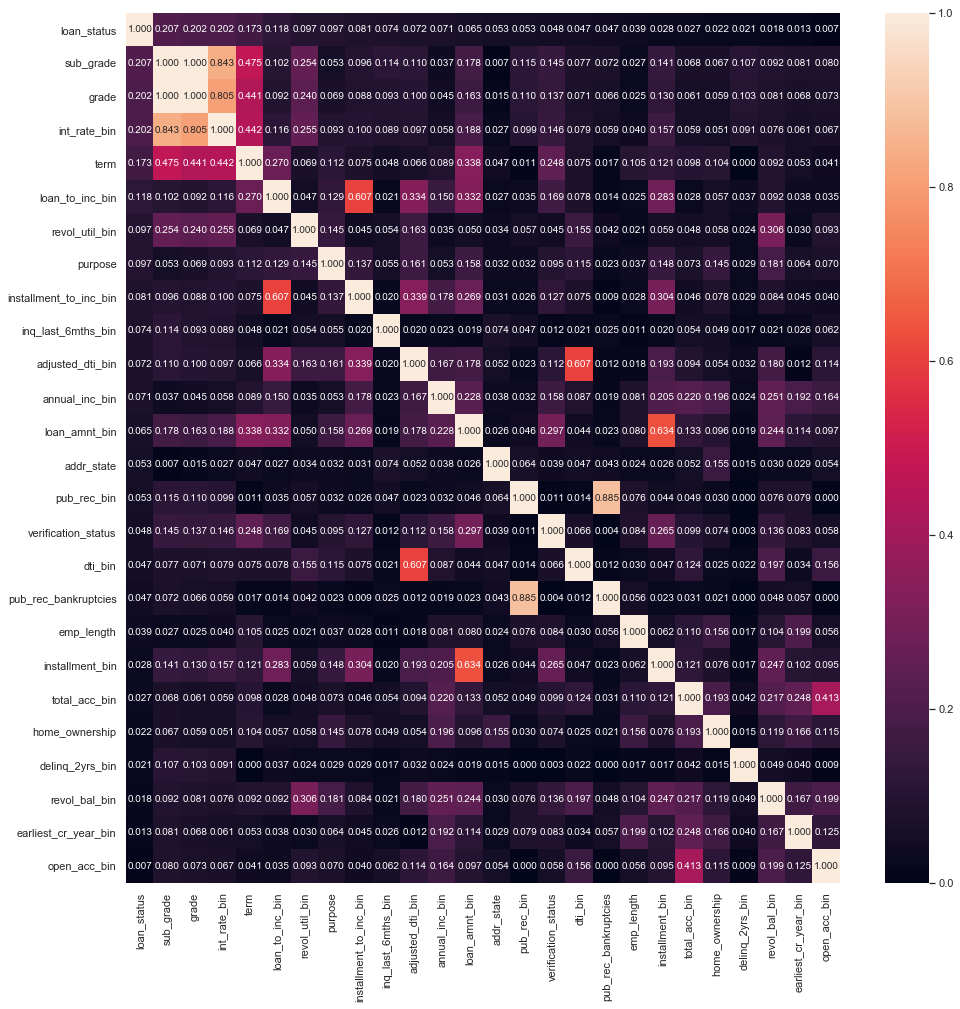

In [207]:
plt.figure(figsize = (16, 16))
ax = sns.heatmap(corr, annot=True, fmt="0.3f")

**Let's just plot top 12 features and a heatmap corresponding to that**

In [208]:
corr.columns

Index(['loan_status', 'sub_grade', 'grade', 'int_rate_bin', 'term',
       'loan_to_inc_bin', 'revol_util_bin', 'purpose',
       'installment_to_inc_bin', 'inq_last_6mths_bin', 'adjusted_dti_bin',
       'annual_inc_bin', 'loan_amnt_bin', 'addr_state', 'pub_rec_bin',
       'verification_status', 'dti_bin', 'pub_rec_bankruptcies', 'emp_length',
       'installment_bin', 'total_acc_bin', 'home_ownership', 'delinq_2yrs_bin',
       'revol_bal_bin', 'earliest_cr_year_bin', 'open_acc_bin'],
      dtype='object')

In [209]:
new_columns = column[:13]
new_columns

['loan_status',
 'sub_grade',
 'grade',
 'int_rate_bin',
 'term',
 'loan_to_inc_bin',
 'revol_util_bin',
 'purpose',
 'installment_to_inc_bin',
 'inq_last_6mths_bin',
 'adjusted_dti_bin',
 'annual_inc_bin',
 'loan_amnt_bin']

In [210]:
corr_trimmed = corr.iloc[:13, :13]
corr_trimmed

loan_status  sub_grade  grade  int_rate_bin  term  \
loan_status                    1.00       0.21   0.20          0.20  0.17   
sub_grade                      0.21       1.00   1.00          0.84  0.48   
grade                          0.20       1.00   1.00          0.80  0.44   
int_rate_bin                   0.20       0.84   0.80          1.00  0.44   
term                           0.17       0.48   0.44          0.44  1.00   
loan_to_inc_bin                0.12       0.10   0.09          0.12  0.27   
revol_util_bin                 0.10       0.25   0.24          0.26  0.07   
purpose                        0.10       0.05   0.07          0.09  0.11   
installment_to_inc_bin         0.08       0.10   0.09          0.10  0.07   
inq_last_6mths_bin             0.07       0.11   0.09          0.09  0.05   
adjusted_dti_bin               0.07       0.11   0.10          0.10  0.07   
annual_inc_bin                 0.07       0.04   0.04          0.06  0.09   
loan_amnt_bin                  0.07       0.18   0.16          0.19  0.34   

                        loan_to_inc_bin  revol_util_bin  purpose  \
loan_status                        0.12            0.10     0.10   
sub_grade                          0.10            0.25     0.05   
grade                              0.09            0.24     0.07   
int_rate_bin                       0.12            0.26     0.09   
term                               0.27            0.07     0.11   
loan_to_inc_bin                    1.00            0.05     0.13   
revol_util_bin                     0.05            1.00     0.15   
purpose                            0.13            0.15     1.00   
installment_to_inc_bin             0.61            0.05     0.14   
inq_last_6mths_bin                 0.02            0.05     0.06   
adjusted_dti_bin                   0.33            0.16     0.16   
annual_inc_bin                     0.15            0.03     0.05   
loan_amnt_bin                      0.33            0.05     0.16   

                        installment_to_inc_bin  inq_last_6mths_bin  \
loan_status                               0.08                0.07   
sub_grade                                 0.10                0.11   
grade                                     0.09                0.09   
int_rate_bin                              0.10                0.09   
term                                      0.07                0.05   
loan_to_inc_bin                           0.61                0.02   
revol_util_bin                            0.05                0.05   
purpose                                   0.14                0.06   
installment_to_inc_bin                    1.00                0.02   
inq_last_6mths_bin                        0.02                1.00   
adjusted_dti_bin                          0.34                0.02   
annual_inc_bin                            0.18                0.02   
loan_amnt_bin                             0.27                0.02   

                        adjusted_dti_bin  annual_inc_bin  loan_amnt_bin  
loan_status                         0.07            0.07           0.07  
sub_grade                           0.11            0.04           0.18  
grade                               0.10            0.04           0.16  
int_rate_bin                        0.10            0.06           0.19  
term                                0.07            0.09           0.34  
loan_to_inc_bin                     0.33            0.15           0.33  
revol_util_bin                      0.16            0.03           0.05  
purpose                             0.16            0.05           0.16  
installment_to_inc_bin              0.34            0.18           0.27  
inq_last_6mths_bin                  0.02            0.02           0.02  
adjusted_dti_bin                    1.00            0.17           0.18  
annual_inc_bin                      0.17            1.00           0.23  
loan_amnt_bin                       0.18         

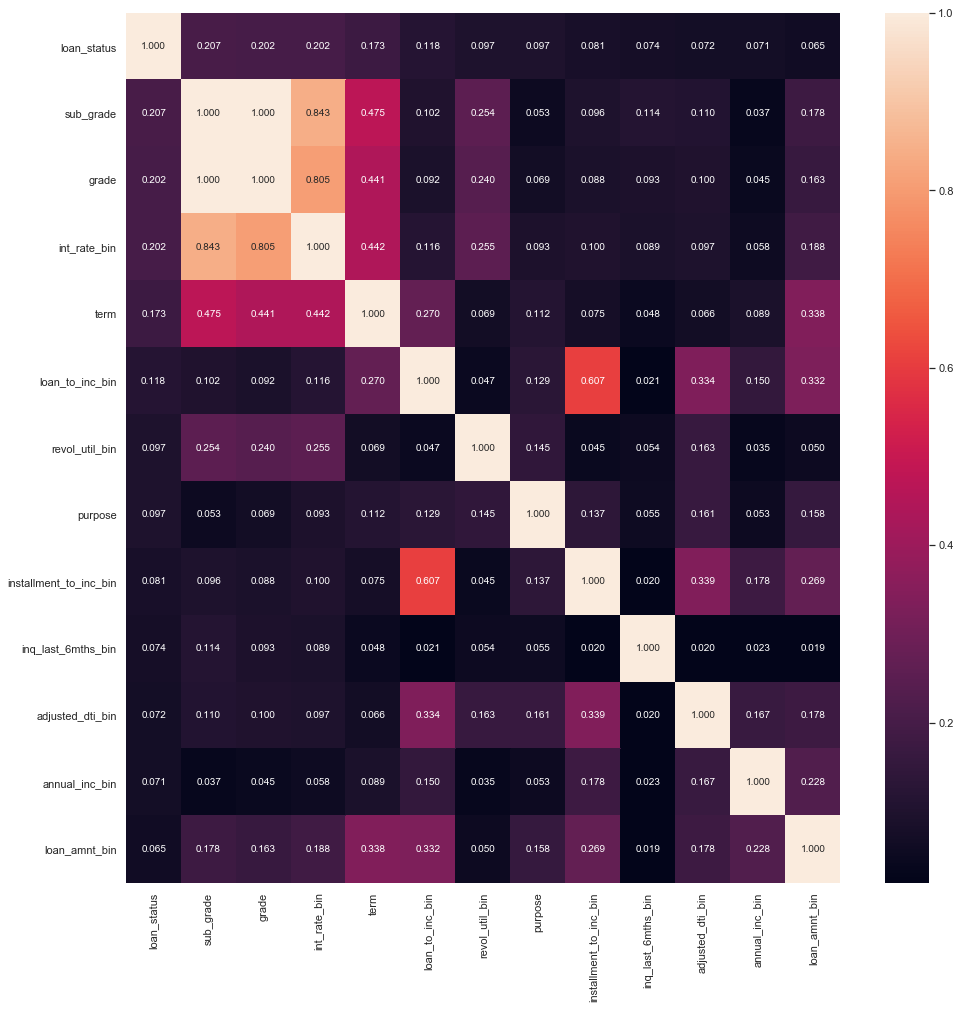

In [211]:
plt.figure(figsize = (16, 16))
ax = sns.heatmap(corr_trimmed, annot=True, fmt="0.3f")

As correleation matrix indicates, GRADE and SUB GRADE are highly correlated hence we can consider it as one param.

**TOP 10 DRIVING FEATURES**

As per the UNIVARIATE/BIVARIATE Analysis and from correlation we can observe that following are the top 10 driving features:

1. sub_grade
2. grade
3. int_rate
4. term
5. loan_to_inc
6. revol_util
7. purpose
8. installment_to_inc
9. inq_last_6mths
10. adjusted_dti

As correleation matrix indicates, GRADE and SUB GRADE are highly correlated hence LC can consider either of them.

<h3> MOST SIGNIFOCANT FEATURE FOR TOP 3 LOAN CATEGORY</h3>

**Based on the number of loans 'debt consolidation', 'credit card' and 'other' are top 3 loan categories**

In [212]:
def compute_paired_correl(data_frame):
    paired_factor = [(i,'loan_status') for i in data_frame.columns.values] 

    corr =[]
    for columns in paired_factor:
        col1 = columns[0]
        col2 = columns[1]
        df_debt_consolidation[col1]
        df_debt_consolidation[col2]
        value = cramers_v(data_frame[col1], data_frame[col2])  
        corr.append(value)
    df_plot = pd.DataFrame(corr , index = column, columns = ['correl'])
    df_plot.dropna(inplace = True)
    df_plot = df_plot[1:]
    df_plot = df_plot.sort_values(by ='correl', ascending  = False)
    print(df_plot.head(10))
    ax1 = df_plot.plot.bar(figsize = (16, 8))
    corr = df_plot.correl.tolist()
    kx=-0.15
    ky= 0.5
    plt.ylabel("CRAMER'S V CORRELATION")
    plt.title("DRIVING FACTORS BASED ON CRAMER'S V CORRELATION")
    for i,rec in enumerate(ax1.patches):
        ax1.text(rec.get_xy()[0]+rec.get_width()/2,rec.get_xy()[1]+rec.get_height(), round(corr[i], 3),fontsize=12, color='black')

**DEBT CONSOLIDATION - DRIVING FACTORS**

                        correl
sub_grade                 0.21
grade                     0.21
int_rate_bin              0.21
term                      0.19
loan_to_inc_bin           0.12
revol_util_bin            0.09
inq_last_6mths_bin        0.08
installment_to_inc_bin    0.07
adjusted_dti_bin          0.07
loan_amnt_bin             0.07


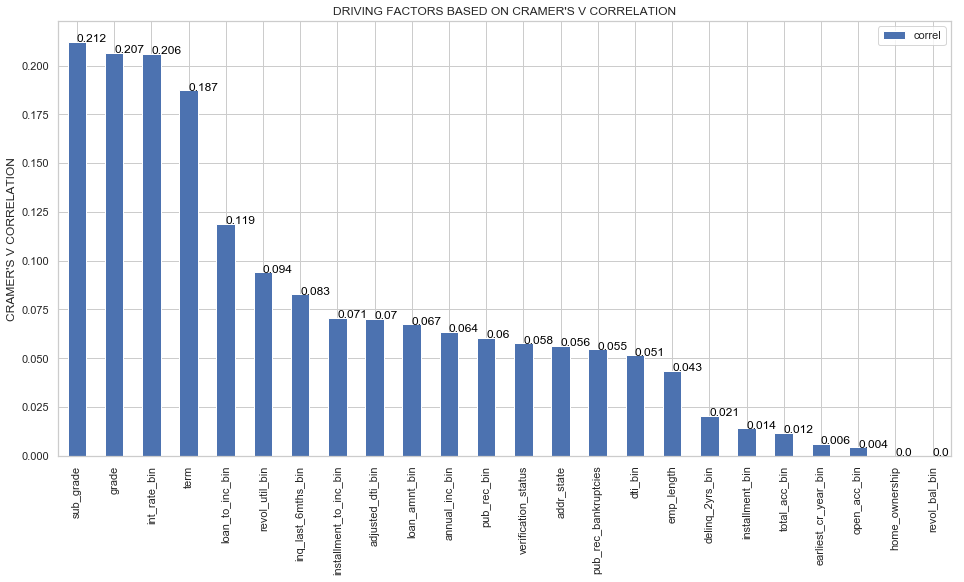

In [213]:
df_debt_consolidation = df_final[df_final.purpose == 'debt_consolidation']
compute_paired_correl(df_debt_consolidation)

**CREDIT CARD -  DRIVING FACTORS**

                        correl
term                      0.20
sub_grade                 0.19
grade                     0.18
int_rate_bin              0.16
loan_to_inc_bin           0.11
revol_util_bin            0.08
emp_length                0.08
installment_to_inc_bin    0.07
loan_amnt_bin             0.07
adjusted_dti_bin          0.07


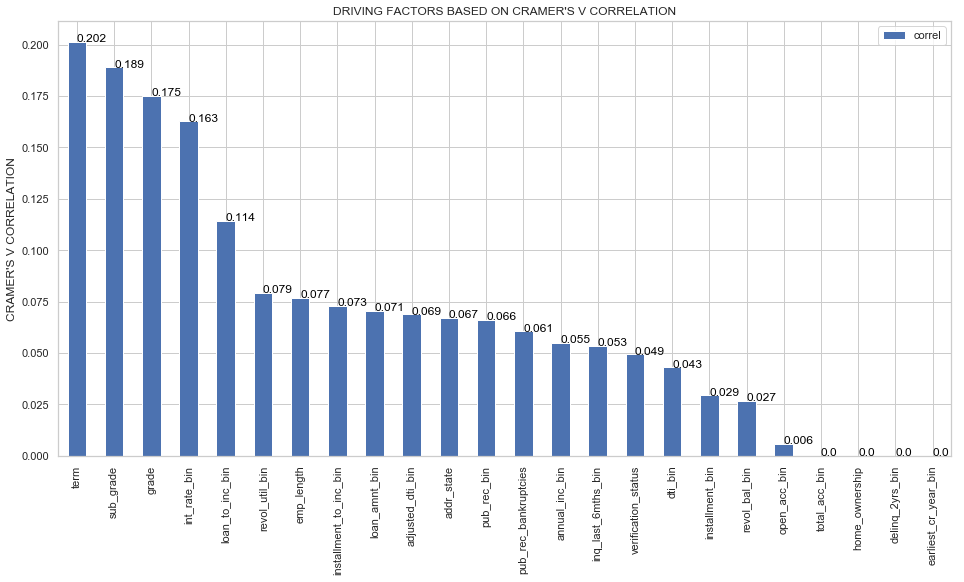

In [214]:
df_credit_card = df_final[df_final.purpose == 'credit_card']
compute_paired_correl(df_credit_card)

**OTHER - DRIVING FACTORS**

                    correl
sub_grade             0.20
int_rate_bin          0.20
grade                 0.20
term                  0.18
revol_util_bin        0.10
annual_inc_bin        0.08
inq_last_6mths_bin    0.07
adjusted_dti_bin      0.07
loan_to_inc_bin       0.06
addr_state            0.06


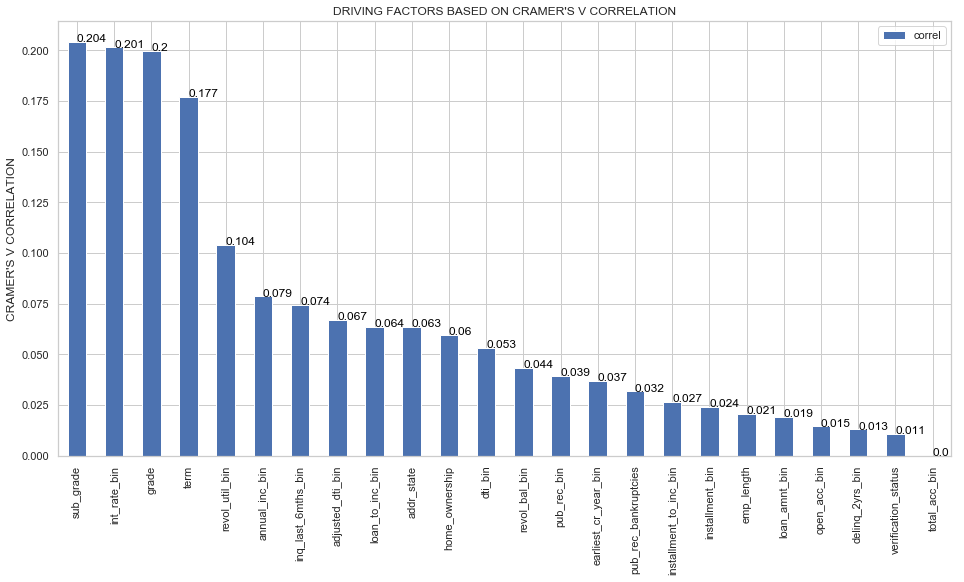

In [215]:
df_other = df_final[df_final.purpose == 'other']
compute_paired_correl(df_other)